<center> <font color='black'> <b>Trabajo dos</b> </font> </center>

<center> <font color='black'> <b>Reducción de dimensionalidad e ingeniería de características</b> </font> </center>
<center> <font color='black'> <b>Katerin Gómez Castrillón</b> </font> </center>
<center> <font color='black'> <b>Juan David Garcia Zapata </b> </font> </center>
<center> <font color='black'> <b>Juan Diego Espinosa Hernandez</b> </font> </center>
<center> <font color='black'> <b>Juan Esteban Restrepo Jaramillo</b> </font> </center>
<center> <font color='black'> <b>Grupo 1</b> </font> </center>

<center> <font color='black'> <b>Introducción</b> </font> </center>

<div style="text-align: justify;">
    El presente trabajo aborda la aplicación de técnicas de reducción de dimensionalidad e ingeniería de características a dos bases de datos distintas. Estas metodologías, fundamentales en el campo del aprendizaje automático y la minería de datos, permiten optimizar la representación de la información, facilitando así el análisis y la interpretación de conjuntos de datos complejos. A lo largo de este estudio, se explorarán diversas estrategias para identificar y extraer las características más relevantes, así como para reducir la dimensionalidad de los datos sin comprometer su integridad informativa. El objetivo principal es demostrar cómo estas técnicas pueden mejorar significativamente la eficiencia y eficacia de los modelos predictivos y descriptivos en diferentes contextos de aplicación.
</div>


In [72]:
# Librerias que vamos a utilizar en el desarrollo del presenten trabajo.

import pandas as pd

import io

from tabulate import tabulate

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

from sklearn.decomposition import PCA

import numpy as np

import missingno as msno

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, KBinsDiscretizer

from sklearn.feature_selection import chi2, SelectKBest

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

import itertools

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier

In [3]:
# Directorio de los datos.

import os

os.chdir("C:/Users/Asus/Desktop/Trabajo mineria 2")

import warnings

warnings.filterwarnings('ignore')

**Nota**

<div style="text-align: justify;"> 
Durante el trabajo, se generarán varias copias del conjunto de datos original para aplicar distintas normalizaciones según los análisis requeridos. Este enfoque preserva la integridad de los datos iniciales, evita errores acumulativos y garantiza que cada análisis se realice bajo condiciones óptimas, asegurando resultados precisos en cada etapa del proceso.
 </div>

<center> <font color='black'> <b>Punto uno</b> </font> </center>                      

**a. Cargue y explore el dataset explicando en qué consiste y las características que
posee el mismo.**          

In [4]:
# Lectura de la base de datos uno.

ruta = 'auto-mpg.data-original.txt'

col_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

data = pd.read_csv(ruta, delim_whitespace=True, names=col_names, na_values='NA')

In [5]:
# Dimensión de la base.

print(data.shape)

(406, 9)


El conjunto de datos analizado consta de 406 registros, distribuidos en 9 columnas que representan diferentes características de automóviles

In [6]:
# Visualizando  las primeras filas.

data.head(n=5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [7]:
buffer = io.StringIO()

data.info(buf=buffer)

info = buffer.getvalue()

info_list = [line.split(maxsplit=3) for line in info.split('\n')[5:-3]]

print(tabulate(info_list, headers=["#", "Varible", "Cantidad no nulos", "Tipo"]))

  #  Varible         Cantidad no nulos  Tipo
---  ------------  -------------------  -------------------
  0  mpg                           398  non-null    float64
  1  cylinders                     406  non-null    float64
  2  displacement                  406  non-null    float64
  3  horsepower                    400  non-null    float64
  4  weight                        406  non-null    float64
  5  acceleration                  406  non-null    float64
  6  model_year                    406  non-null    float64
  7  origin                        406  non-null    float64
  8  car_name                      406  non-null    object


<div style="text-align: justify;">
El conjunto de datos utiliza el tipo float64 en su gran mayoria las variables, reflejando su naturaleza cuantitativa y el la variable car name como una variable categórica.
 </div>

Es necesario ajustar el tipo de datos para reflejar adecuadamente la naturaleza de las variables, de acuerdo a la descripcion del sitio donde se encontraba alojada el dataset

In [8]:
data['cylinders'] = data['cylinders'].astype('category')

data['model_year'] = data['model_year'].astype('category')

data['origin'] = data['origin'].astype('category')

data['car_name'] = data['car_name'].astype('category')

In [9]:
buffer = io.StringIO()

data.info(buf=buffer)

info = buffer.getvalue()

info_list = [line.split(maxsplit=3) for line in info.split('\n')[5:-3]]

print(tabulate(info_list, headers=["#", "Varible", "Cantidad no nulos", "Tipo"]))

  #  Varible         Cantidad no nulos  Tipo
---  ------------  -------------------  --------------------
  0  mpg                           398  non-null    float64
  1  cylinders                     406  non-null    category
  2  displacement                  406  non-null    float64
  3  horsepower                    400  non-null    float64
  4  weight                        406  non-null    float64
  5  acceleration                  406  non-null    float64
  6  model_year                    406  non-null    category
  7  origin                        406  non-null    category
  8  car_name                      406  non-null    category


<div style="text-align: justify;">
Este conjunto de datos es una compilación de especificaciones y mediciones de rendimiento para vehículos de diferentes marcas y modelos. Se centra principalmente en la eficiencia de combustible, representada por las millas recorridas por galón de combustible, y cómo esta se relaciona con otras características del vehículo, como el tamaño del motor, la potencia, el peso y la aceleración. La variedad de variables incluidas ofrece una vista detallada de los factores que pueden influir en el consumo de combustible de un vehículo, proporcionando insights valiosos sobre la relación entre la eficiencia de combustible y las características mecánicas y físicas de los vehículos.
</div>

<div style="text-align: justify;">
    
**Características de la base de datos**

**mpg:** La variable objetivo que se desea predecir. Representa la eficiencia de combustible del vehículo, indicando cuántas millas puede recorrer el vehículo por cada galón de combustible.

**cylinders:** El número de cilindros en el motor del vehículo. Es un indicador del tamaño y potencia del motor.
displacement: El volumen total de los cilindros del motor, medido en pulgadas cúbicas. Un mayor desplazamiento suele indicar un motor más grande y potente.

**horsepower:** La potencia del motor en caballos de fuerza. Esta medida indica la capacidad del motor para realizar trabajo.
weight: El peso del vehículo en libras. Vehículos más pesados tienden a tener menor eficiencia de combustible.
acceleration: El tiempo, en segundos, que el vehículo tarda en acelerar de 0 a 60 millas por hora. Una medida de qué tan rápidamente un vehículo puede aumentar su velocidad.

**model year:** El año del modelo del vehículo. Este conjunto de datos incluye vehículos de finales de la década de 1970 y principios de la de 1980.

**origin:** Un código que indica el país de origen del vehículo.

**car name:** El nombre del modelo del vehículo. Esta variable es nominal y proporciona información específica del modelo para cada entrada en el conjunto de datos.

</div>

Revisemos que nuestra base de datos no tenga datos faltantes.

In [10]:
faltantes = data.isna().sum()

resultados = pd.DataFrame({
    
    'Variable': faltantes.index,
    
    'Cantidad': faltantes.values
    
})

print(resultados)

sum(data.isna().sum())

       Variable  Cantidad
0           mpg         8
1     cylinders         0
2  displacement         0
3    horsepower         6
4        weight         0
5  acceleration         0
6    model_year         0
7        origin         0
8      car_name         0


14

Las variables **mpg** y **horsepower**, que tienen 8 y 6 datos faltantes respectivamente, es crucial implementar estrategias de manejo de datos faltantes cuidadosas para evitar sesgos en el análisis.

Detección las variables con valor cero en la base de datos.

In [11]:
# Hago el conteo de columnas cuya fila sea igual a cero

cols = data[data == 0].count(axis=0)

# Reviso cuántas columnas tienen filas con valores en cero

cols[cols > 0]

Series([], dtype: int64)

Se evidencia que en el conjunto de datos, se ha determinado que ninguna de las variables presenta valores iguales a cero. 

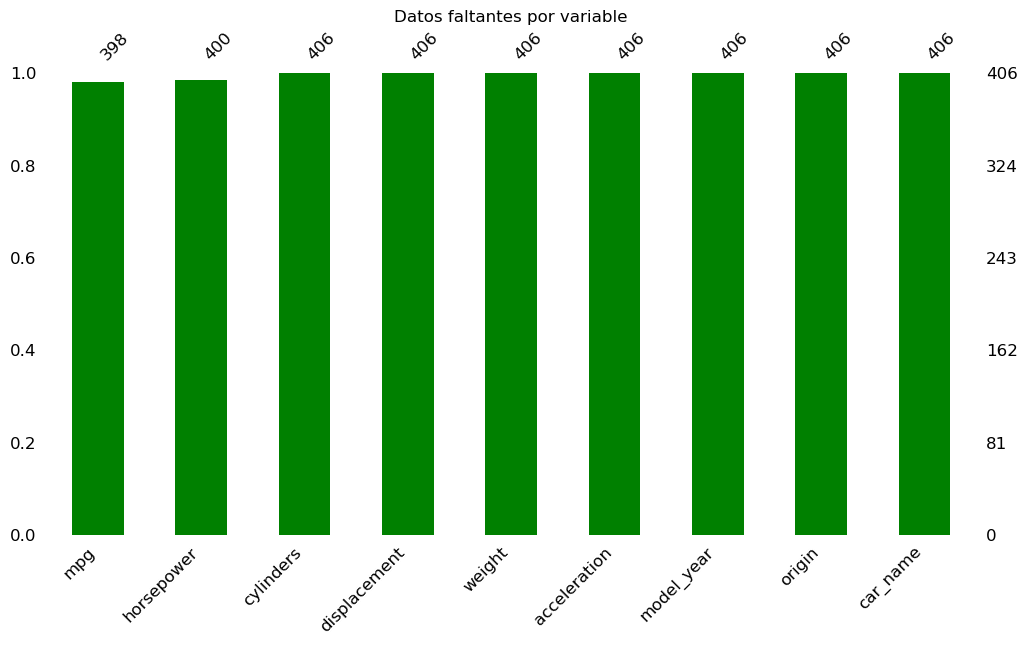

In [12]:
ax = msno.bar(data, figsize=(12, 6), sort="ascending", fontsize=12, color='green')

plt.title('Datos faltantes por variable')

plt.show()

In [13]:
print(f'''Proporción de datos faltantes: {round(sum(data.isna().sum())/406*100, 2)}%

Proporción en variable mpg: {round(data.isna().sum().mpg/406*100, 2)}%

Proporción en variable horsepower: {round(data.isna().sum().horsepower/406*100, 2)}%''')

Proporción de datos faltantes: 3.45%

Proporción en variable mpg: 1.97%

Proporción en variable horsepower: 1.48%


**Proporción general de datos faltantes**
  
Un 3.45% de datos faltantes en el conjunto de datos sugiere una pequeña proporción de información no disponible. Aunque es un porcentaje manejable, la preocupación principal es si estos datos faltantes son aleatorios o si siguen un patrón que podría introducir un sesgo en el análisis.

**Proporción en la variable mpg 1.97%**

Un pequeño porcentaje de datos faltantes en una variable crucial como mpg, que indica la eficiencia del combustible, puede afectar análisis relacionados con el consumo de combustible.

**Proporción en la variable horsepower 1.48%**

Aunque es la menor de las proporciones, cualquier dato faltante en horsepower puede influir en análisis relacionados con el rendimiento del vehículo.


<div style="text-align: justify;">
En nuestro estudio, se ha determinado que la proporción de datos faltantes en la base de datos asciende al 3.45%, un porcentaje relativamente bajo que no compromete significativamente la representatividad de la muestra. Ante esta situación, se ha optado por la eliminación de los registros incompletos, una decisión metodológica que se justifica por la escasa magnitud de la pérdida de información y por el beneficio de trabajar con un conjunto de datos completo.
    </div>

<Axes: >

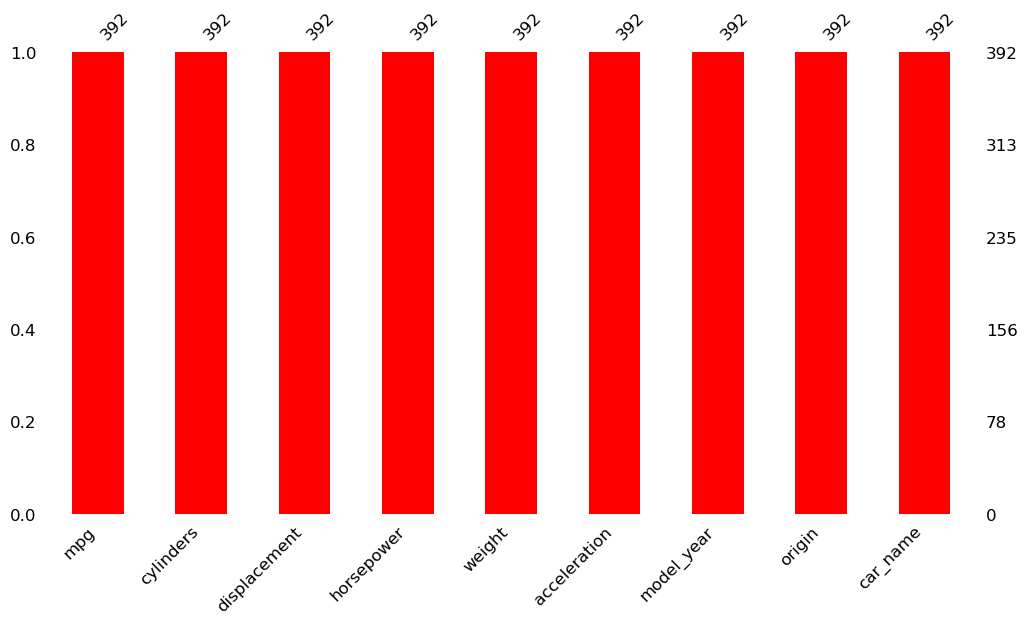

In [14]:
data.dropna(subset=['horsepower'],how='any',inplace=True)

data.dropna(subset=['mpg'],how='any',inplace=True)

msno.bar(data,figsize=(12, 6), fontsize=12, color='red')

Después de haber realizado el análisis de nuestra base de datos y efectuado las correcciones correspondientes, procedemos a continuar con el objetivo de nuestro trabajo.

**b. Indague sobre la varianza de cada uno de los atributos que conforman el dataset. ¿Existen atributos que podrían ser eliminados de acuerdo con la técnica de Low
Variance Factor?**

El objetivo de este punto es aplicar el método Low Variance Factor. Sin embargo, dado que en clase hemos estudiado el Low Variance Filter, utilizaremos este último. Antes de aplicar el Low Variance Filter, es esencial normalizar los rangos de cada columna para que las varianzas sean independientes del rango de los valores de cada característica. Existen varias opciones para la normalización, entre ellas: Min-Max Scaling, Z-Score (Estandarización) y Decimal Scaling.

En nuestro caso, emplearemos la normalización mediante Min-Max Scaling. Esta elección se debe a que la estandarización mediante Z-Score puede afectar negativamente tanto al método de Low Variance Factor como al de Low Variance Filter, ya que este proceso ajusta todas las varianzas a 1. Si todas las características tuvieran la misma varianza, el uso de estos métodos perdería sentido, pues no habría variación significativa que eliminar o reducir.

El método Min-Max ajusta los datos para que todos los valores se encuentren en un rango entre 0 y 1. Hemos definido un umbral de 0.3 para filtrar las variables en el análisis, lo que nos permite centrarnos en aquellas características que exhiben mayor variabilidad y, por lo tanto, podrían ser más informativas para nuestros modelos predictivos.

In [15]:
# Se genera copia de la base de datos

data1 = data.copy()

# Seleccionar solo las variables numéricas

numeric_cols = data1.select_dtypes(include=['float']).columns

# Creamos un objeto MinMaxScaler

scaler = MinMaxScaler()

# Transformamos las variables numéricas

data1[numeric_cols] = scaler.fit_transform(data1[numeric_cols])

# Calculamos la varianza de cada variable.

variances = data1[numeric_cols].var()

# Ordenamos las varianzas de menor a mayor

variances_sorted = variances.sort_values()

print("Varianza de cada variable:")

print(variances_sorted)

# Definimos nuestro umbral

threshold = 0.03

# Realizamos el filtro  de las varianzas por debajo del umbral

low_variance_features = variances_sorted[variances_sorted < threshold]

print(f"\nCaracterísticas con varianza menor a {threshold}:")

print(low_variance_features)


Varianza de cada variable:
acceleration    0.026968
mpg             0.043089
horsepower      0.043761
weight          0.057998
displacement    0.073115
dtype: float64

Características con varianza menor a 0.03:
acceleration    0.026968
dtype: float64


Como se estableció anteriomente tenemos un umbral de varianza de 0.03 como criterio de selección. Bajo este parámetro, la variable **acceleration** sería excluida del conjunto de datos, dado que su varianza calculada de 0.026968 es inferior al umbral definido. Esta baja varianza indica que **acceleration** presenta una dispersión de valores significativamente menor en comparación con otras variables del conjunto. La decisión de eliminar esta característica se fundamenta en el principio estadístico de que variables con varianza reducida tienden a aportar información limitada al modelo predictivo. La exclusión de **acceleration** contribuye a la parsimonia del modelo, optimizando su eficiencia computacional sin comprometer sustancialmente su poder predictivo. Esta metodología de filtrado permite focalizar el análisis en variables con mayor variabilidad, las cuales, en teoría, poseen un potencial explicativo y predictivo más robusto para el fenómeno bajo estudio.

Esta técnica fundamental en el preprocesamiento de datos para modelos de aprendizaje automático. Su principal función es mejorar la eficiencia computacional y la precisión del modelo al eliminar variables con poca variación, que aportan escasa información relevante. Esto reduce la complejidad del modelo, evita el uso innecesario de recursos y minimiza el riesgo de sobreajuste, facilitando una mejor generalización a nuevos datos. Al simplificar el conjunto de datos, el filtro permite concentrarse en las variables más influyentes, optimizando así el análisis y la toma de decisiones.

**c. Evalúe la relación entre atributos a partir del coeficiente de correlación de Pearson y un análisis gráfico de heatmap para estudiar la posibilidad de eliminar
redundancia en el dataset. En caso de corresponder, aplique las técnicas de Reducing Highly Correlated Columns trabajadas en clase.**

**Variables numéricas**

Para aplicar la correlación de Pearson, es fundamental verificar previamente la existencia de una relación lineal entre las variables de interés, puesto que esta medida estadística solo es apropiada para analizar asociaciones lineales. Con el fin de examinar dicha relación, recurriremos a un gráfico de dispersión (scatterplot), herramienta visual que nos permitirá observar si las variables exhiben una tendencia lineal. Este paso es crucial, ya que justifica el empleo de la correlación de Pearson y proporciona una base sólida para interpretar los resultados obtenidos posteriormente. La visualización de los datos mediante el scatterplot no solo facilita la identificación de patrones lineales, sino que también puede revelar otros tipos de relaciones no lineales que requerirían métodos alternativos de análisis.

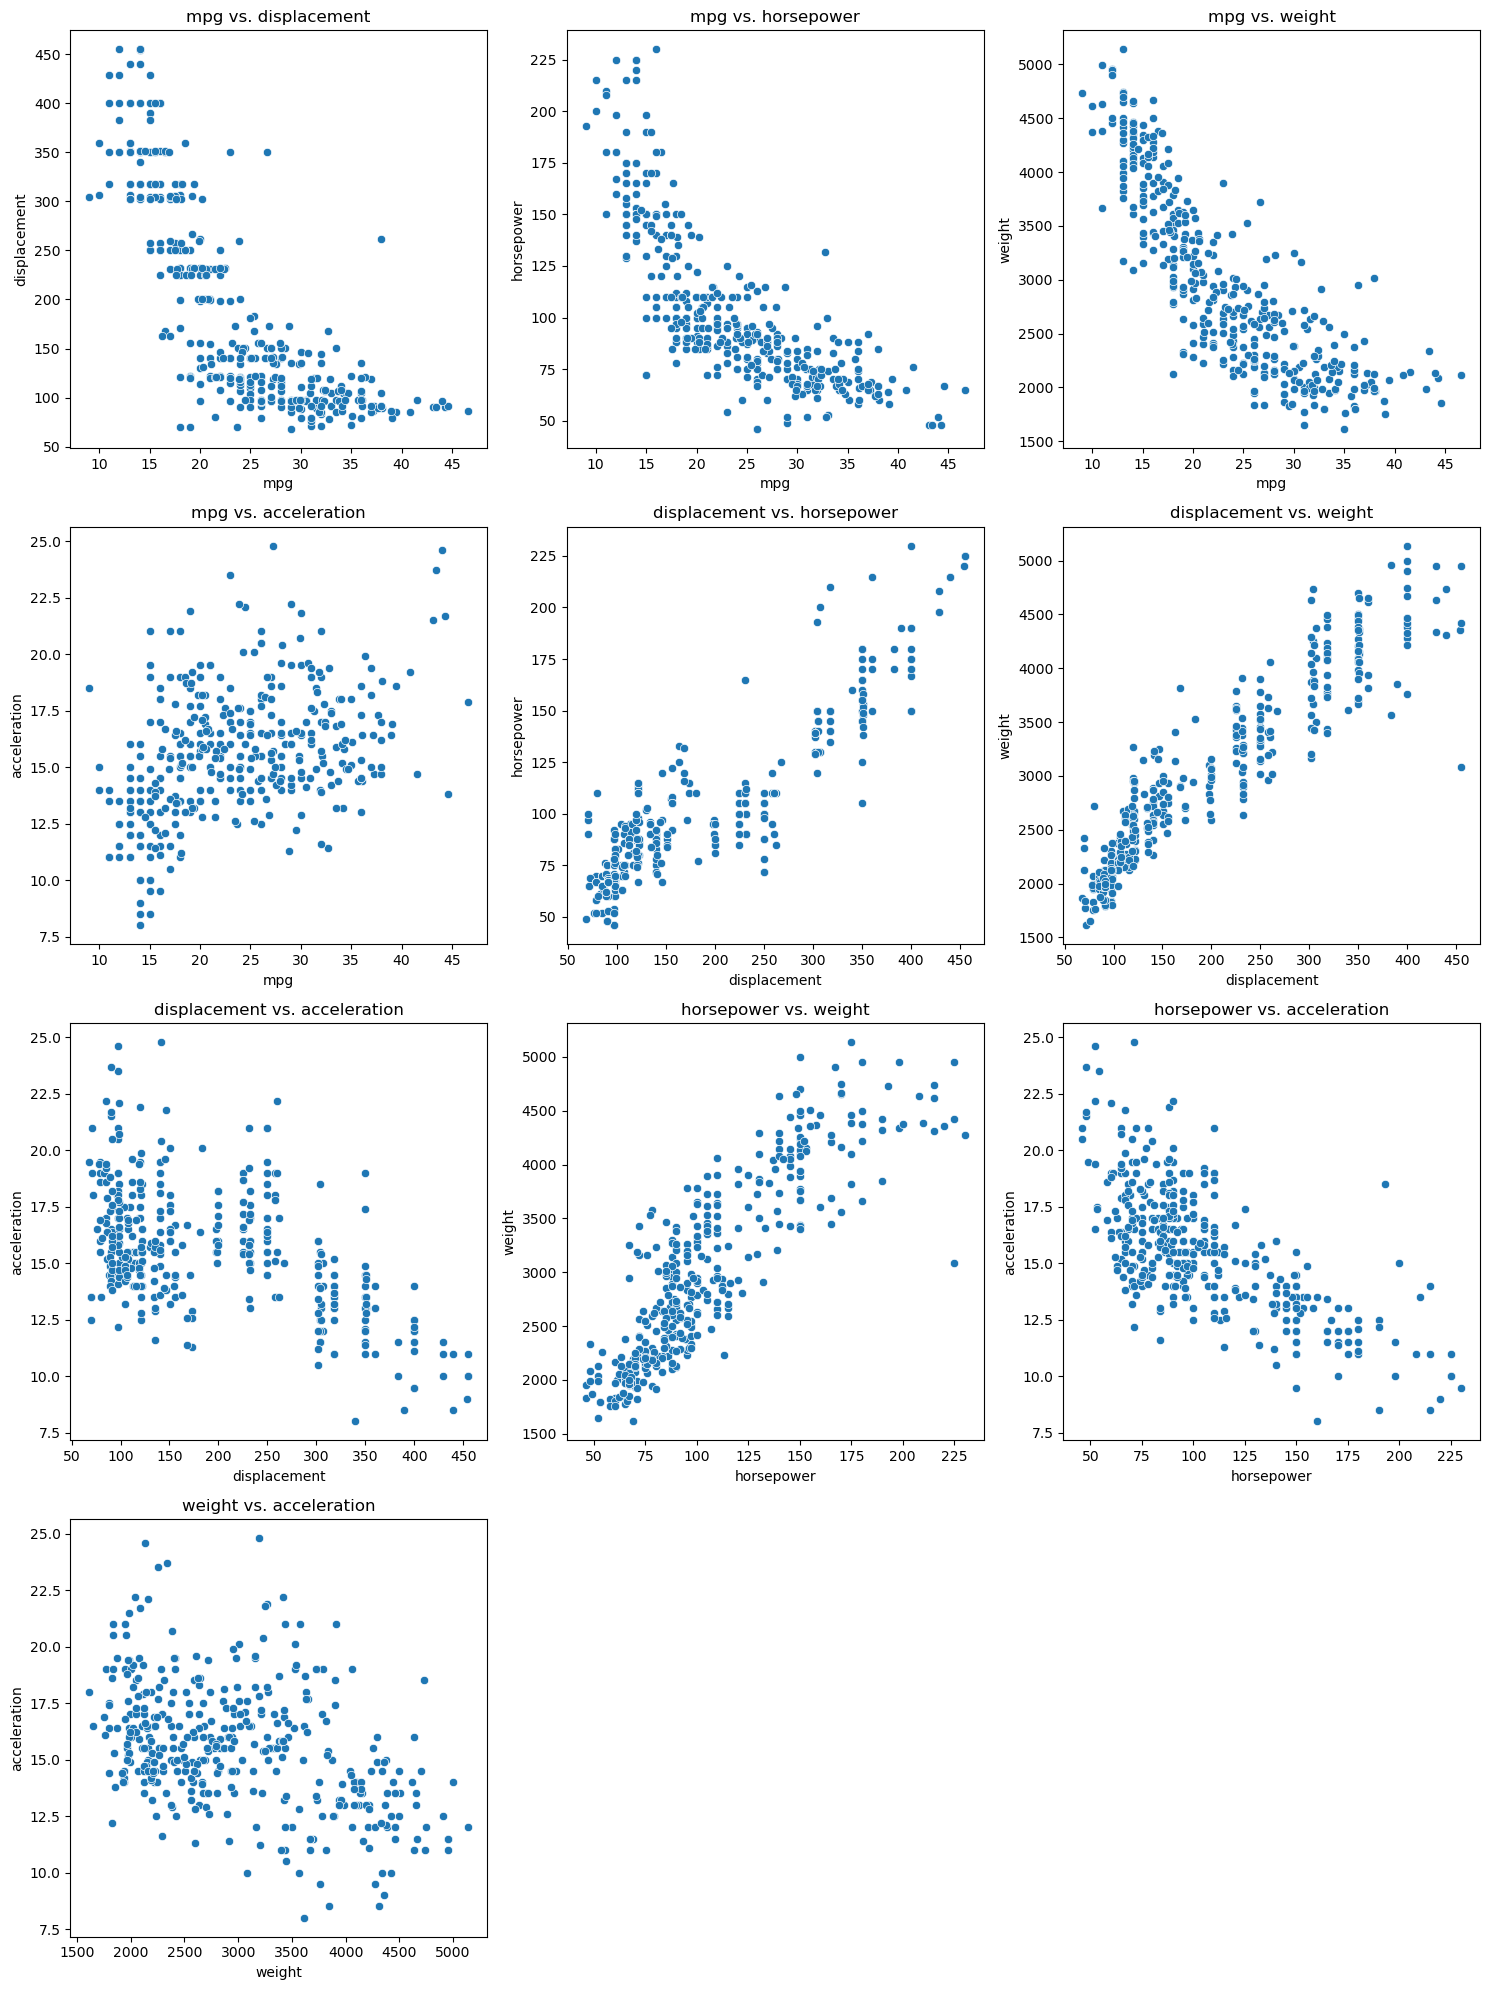

In [17]:
numeric_cols = data.select_dtypes(include=['float', 'int']).columns

combinations = list(itertools.combinations(numeric_cols, 2))

num_plots = len(combinations)

cols = 3

rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))

for i, (x_col, y_col) in enumerate(combinations):
    
    ax = axes.flatten()[i]
    
    sns.scatterplot(x=x_col, y=y_col, data=data, ax=ax)
    
    ax.set_title(f'{x_col} vs. {y_col}')


for j in range(i + 1, rows * cols):
    
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()

plt.show()


Los gráficos muestran una evidente relación lineal entre la mayoría de las variables analizadas, lo que sugiere una asociación consistente y predecible. Esta clara tendencia lineal respalda el uso del coeficiente de correlación de Pearson como la herramienta estadística más adecuada para cuantificar tanto la intensidad como la dirección de dicha relación. Al aplicar este método, se obtendrá un valor numérico preciso, que variará entre -1 y +1, proporcionando una medida objetiva de la fuerza del vínculo entre las variables y determinando si esta asociación es positiva o negativa. Este análisis no solo confirmará la impresión visual inicial, sino que también aportará una base estadística sólida para futuras inferencias y modelizaciones basadas en estos datos.









**Correlación de Pearson y análisis gráfico de heatmap**

La matriz de correlación es una herramienta estadística fundamental para el análisis de datos y la construcción de modelos predictivos. Su principal función radica en revelar las relaciones lineales entre las variables de un conjunto de datos, permitiendo identificar aquellas que presentan una mayor interconexión. Esta información es crucial, ya que la presencia de variables altamente correlacionadas puede introducir multicolinealidad en un modelo estadístico, un fenómeno que compromete la estabilidad de los coeficientes y dificulta su interpretación. Al examinar detenidamente esta matriz, los analistas pueden tomar decisiones informadas sobre la selección de variables, optando por eliminar aquellas que muestren una correlación excesiva con otras. Este proceso de depuración no solo simplifica el modelo, sino que también reduce la redundancia informativa, lo que en última instancia conduce a una mejora significativa en el rendimiento y la robustez del modelo resultante.

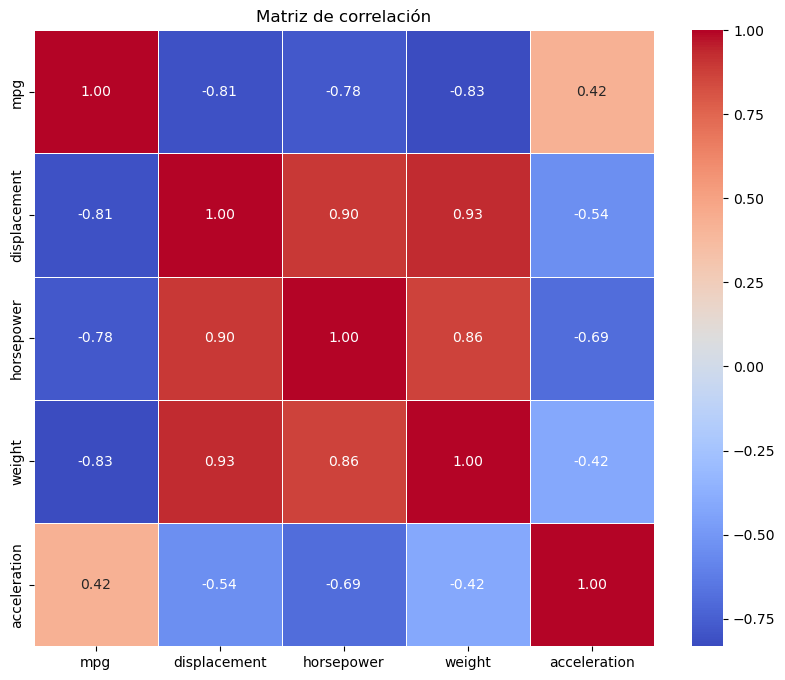

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.805127,-0.778427,-0.832244,0.423329
displacement,-0.805127,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.543800,-0.689196,-0.416839,1.000000


In [18]:
# Calcular los coeficientes de correlación.

pearsonma = data.corr(numeric_only=True, method='pearson')

plt.figure(figsize=(10, 8))

sns.heatmap(pearsonma, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title("Matriz de correlación")

plt.show()

pearsonma

**mpg y displacement** Presenta una correlación de -0.80, subrayando otra fuerte relación negativa. Esto muestra que vehículos con un mayor displacement en el motor suelen tener una menor eficiencia de combustible. El alto desplazamiento implica un mayor volumen de combustible consumido por ciclo del motor, lo que reduce el mpg.

**mpg y horsepower** La correlación de -0.78 refleja una fuerte relación negativa, indicando que vehículos con mayor horsepower tienden a ser menos eficientes en términos de consumo de combustible. Esto se debe a que un mayor horsepower generalmente requiere un mayor consumo de combustible para generar esa potencia.

**mpg y weight** Con una correlación de -0.83, esta es una de las relaciones más fuertes en el conjunto de datos, demostrando que el peso del vehículo afecta negativamente su eficiencia de combustible. Vehículos más pesados demandan más energía para moverse, lo que se traduce en un menor mpg.


**Interacciones entre otras variables**

**horsepower y displacement** La correlación es 0.90, mostrando una fuerte relación positiva. Esto sugiere que los motores más grandes no solo tienen un mayor desplazamiento, sino que también tienden a ser más potentes. Un mayor displacement permite a los motores generar más fuerza, reflejada en un mayor horsepower.

**weight y displacement** Con una correlación de 0.93, esta relación fuertemente positiva indica que vehículos con motores de mayor desplazamiento son también más pesados. Esto es coherente con la noción de que componentes más grandes y más potentes en el motor contribuyen al peso general del vehículo.

**Reducir variables altamente correlacionadas**

La reducción de dimensionalidad se lleva a cabo mediante el análisis de correlación de Pearson, estableciendo un umbral de 0.7 para identificar y eliminar variables altamente correlacionadas. Este enfoque permite optimizar la base de datos al reducir la redundancia, mejorando así la eficiencia y la interpretabilidad del modelo. El proceso se apoya en la visualización de un heatmap para facilitar la identificación de las variables más correlacionadas. El criterio de eliminación consiste en conservar aquella variable que, en promedio, presente menor correlación con el resto de las variables. Es crucial considerar tanto las correlaciones positivas como las negativas, ya que ambas revelan relaciones lineales fuertes entre variables. Este método integral asegura la eliminación de variables que no aportan información adicional significativa, evitando la multicolinealidad y simplificando el modelo sin comprometer su capacidad predictiva. Como resultado, se obtiene un conjunto de datos más manejable y un modelo más robusto y fácil de interpretar.

In [19]:
# Calcular la matriz de correlación

correlacion = data.corr(numeric_only=True)

# Identificar las parejas de variables con correlación absoluta mayor a 0.7

high_corr_pairs = []

seen_pairs = set()

for var1 in correlacion.columns:

    for var2 in correlacion.columns:

        if var1 != var2 and np.abs(correlacion.loc[var1, var2]) > 0.7:

            pair = tuple(sorted((var1, var2)))

            if pair not in seen_pairs:

                high_corr_pairs.append(pair)

                seen_pairs.add(pair)

# Iterar sobre cada pareja para calcular el promedio de correlaciones con las demás variables

for var1, var2 in high_corr_pairs:

    # Crear una máscara para excluir la diagonal y la otra variable de la pareja

    other_vars = correlacion.columns.difference([var1, var2])

    # Calcular el promedio de las correlaciones absolutas relevantes excluyendo la diagonal y la pareja

    mean_corr_var1 = correlacion.loc[other_vars, var1].abs().sum() / len(other_vars)

    mean_corr_var2 = correlacion.loc[other_vars, var2].abs().sum() / len(other_vars)

    # Mostrar los promedios
    print(f"Pareja: {var1} y {var2}")

    print(f"Promedio de {var1}: {mean_corr_var1:.2f}")

    print(f"Promedio de {var2}: {mean_corr_var2:.2f}")

    # Decidir cuál variable conservar (la de menor promedio)

    if mean_corr_var1 < mean_corr_var2:

        conservar = var1

        promedio_conservar = mean_corr_var1

        eliminar = var2

    else:

        conservar = var2

        promedio_conservar = mean_corr_var2

        eliminar = var1



    print(f"Conservar: {conservar} (Promedio de correlación: {promedio_conservar:.2f}) - Eliminar: {eliminar}\n")


Pareja: displacement y mpg
Promedio de displacement: 0.79
Promedio de mpg: 0.68
Conservar: mpg (Promedio de correlación: 0.68) - Eliminar: displacement

Pareja: horsepower y mpg
Promedio de horsepower: 0.82
Promedio de mpg: 0.69
Conservar: mpg (Promedio de correlación: 0.69) - Eliminar: horsepower

Pareja: mpg y weight
Promedio de mpg: 0.67
Promedio de weight: 0.74
Conservar: mpg (Promedio de correlación: 0.67) - Eliminar: weight

Pareja: displacement y horsepower
Promedio de displacement: 0.76
Promedio de horsepower: 0.78
Conservar: displacement (Promedio de correlación: 0.76) - Eliminar: horsepower

Pareja: displacement y weight
Promedio de displacement: 0.75
Promedio de weight: 0.70
Conservar: weight (Promedio de correlación: 0.70) - Eliminar: displacement

Pareja: horsepower y weight
Promedio de horsepower: 0.79
Promedio de weight: 0.73
Conservar: weight (Promedio de correlación: 0.73) - Eliminar: horsepower



En el proceso de reducción de dimensionalidad, se llevó a cabo un minucioso análisis de las correlaciones entre pares de variables, con el objetivo de determinar cuáles conservar y cuáles eliminar. La prioridad se otorgó a aquellas variables con mayor correlación, buscando mantener la información más relevante del conjunto de datos. En este contexto, se tomaron decisiones específicas para cada par de variables evaluado: entre **displacement** y **mpg**, se optó por conservar **mpg** debido su menor promedio. De manera similar, en la comparación entre **horsepower** y **mpg**, así como entre **mpg** y **weight**, se decidió mantener **mpg** en ambos casos. Por otro lado, al analizar **displacement** y **horsepower**, se eligió preservar **displacement**. En la evaluación de **displacement** frente a **weight**, se optó por conservar weight. Finalmente, en la comparación entre **horsepower** y **weight**, la decisión fue mantener **weight**. Este proceso meticuloso de selección permitió simplificar significativamente la base de datos, reteniendo las variables más representativas y mejorando la estructura del conjunto de datos para facilitar análisis futuros más eficientes y precisos.

**Nota**: Al aplicar el método de reducción de variables altamente correlacionadas, se identificaron las variables **displacement**, **horsepower**, y **weight** como candidatas para ser eliminadas. De estas, **displacement** fue la que se seleccionó con mayor frecuencia para ser eliminada, seguida de **horsepower**. Por otro lado, **weight** mostró una frecuencia de eliminación mucho menor, solo en una ocasión. Sin embargo, es importante destacar que este enfoque es una guía inicial para decidir cuál variable eliminar en un par correlacionado. También es recomendable probar diferentes combinaciones de variables en el proceso de modelado para evaluar cómo afectan el rendimiento del modelo. Este enfoque iterativo puede ayudar a identificar la combinación óptima de variables, garantizando que las decisiones de eliminación mejoren la precisión y la interpretabilidad del modelo.

**Análisis de Componentes Principales (PCA)**

Este método transforma las variables altamente correlacionadas en un conjunto de nuevas variables, llamadas componentes principales, que son combinaciones lineales de las variables originales. Estas componentes principales son ortogonales entre sí, es decir, no están correlacionadas. Sin embargo, una de las principales desventajas del PCA es que las nuevas variables generadas son variables latentes, lo que puede hacer que su interpretación sea menos intuitiva y más compleja. Dado que los componentes principales no corresponden directamente a las variables originales, su significado puede no ser evidente. Por lo tanto, para interpretar correctamente estos componentes y su impacto en el análisis, es recomendable contar con la ayuda de un experto en el dominio del problema. Este enfoque ofrece una forma poderosa de reducir la dimensionalidad de los datos, pero debe aplicarse con cuidado para asegurar que los resultados sean interpretados correctamente.

Para aplicar el PCA, necesitamos normalizar los datos utilizando el Z-score, ya que esto asegura que las variables tengan una media de 0 y una varianza de 1, permitiendo que todas las variables contribuyan equitativamente al análisis. Sin embargo, antes de proceder con la normalización, es fundamental verificar si las variables contienen datos atípicos. Si se detectan valores atípicos, es preferible utilizar el Z-score modificado, que es más robusto frente a estos valores extremos, garantizando que el análisis no se vea distorsionado por ellos.

**Revisión de datos atípicos**

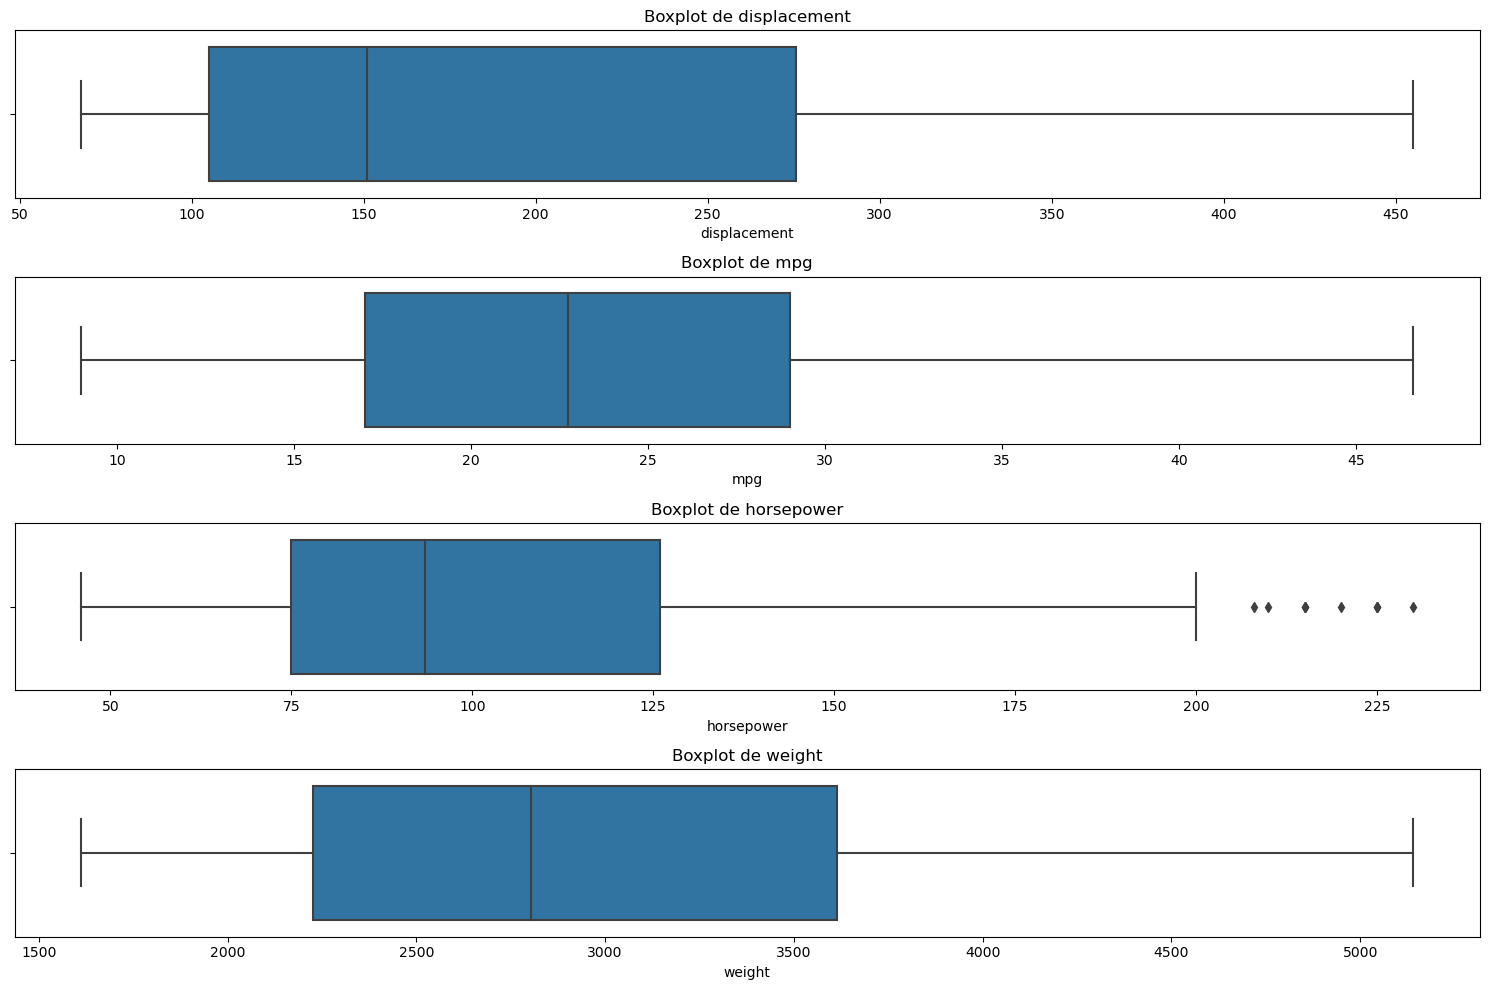

In [21]:
# Seleccionar solo las columnas numéricas del dataframe

numeric_cols = ['displacement', 'mpg', 'horsepower', 'weight']

plt.figure(figsize=(15, 10))  

for i, col in enumerate(numeric_cols, 1):
    
    plt.subplot(len(numeric_cols), 1, i)
    
    sns.boxplot(x=data[col])
    
    plt.title(f'Boxplot de {col}')

plt.tight_layout()

plt.show()


Podemos evidenciar en los boxplots muestra que existen algunos valores atípicos en las variables, especialmente en **horsepower**, pero son relativamente pocos. Dado que estos outliers pueden representar casos legítimos dentro de la variabilidad natural de los datos, no es estrictamente necesario utilizar un Z-score robusto para la normalización. En este contexto, los valores atípicos pueden proporcionar información valiosa y, al aplicar un Z-score estándar, no se corre el riesgo de perder detalles importantes. Por lo tanto, puedes proceder con la normalización estándar, considerando que los outliers detectados no son suficientes para justificar un enfoque más robusto.

In [23]:
data2 = data.copy()

selected_columns = data2[['displacement', 'mpg', 'horsepower', 'weight']]

# Inicializar el StandardScaler

scaler = StandardScaler()

imputer = SimpleImputer(strategy='median')  # Reemplazar valores con la mediana

selected_columns = imputer.fit_transform(selected_columns)

# Aplicar el escalador a las columnas seleccionadas

normalized_data = scaler.fit_transform(selected_columns)

# Aplicamos PCA

pca = PCA(n_components=4)  # Calcular todas las componentes principales

principal_components = pca.fit_transform(normalized_data)

# Creamos un DataFrame los resultados del PCA

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])

pca_df.head()


,PC1,PC2,PC3,PC4
0,1.533481,0.061677,-0.074369,0.337477
1,2.495457,0.255217,0.408326,0.348823
2,1.805448,0.301213,0.321148,0.357493
3,1.857948,0.041555,0.411129,0.283251
4,1.666835,0.039357,0.191941,0.299852


Mediante análisis de componentes principales nos permitió reducir las variables **displacement**, **mpg**, **horsepower** y **weight** a cuatro componentes principales (PC1, PC2, PC3 y PC4), que capturan la mayor parte de la variabilidad original. Esto facilita la visualización, reduce la complejidad y mejora la eficiencia de futuros análisis y modelos, al eliminar la multicolinealidad y reducir el ruido en los datos.

**Procedemos a calcular los valores propios y los vectores propios.**

In [24]:
# Obtener los valores propios (autovalores)

eigenvalues = pca.explained_variance_

print("Valores propios (autovalores):")

print(eigenvalues)

# Obtener los vectores propios (autovectores)

eigenvectors = pca.components_

print("\nVectores propios (autovectores):")

print(eigenvectors)

Valores propios (autovalores):
[3.56675672 0.24647052 0.13661701 0.06038592]

Vectores propios (autovectores):
[[ 0.51174024 -0.47884183  0.49791867  0.51079295]
 [ 0.30060366  0.85376234  0.41428959  0.09534903]
 [-0.3055056  -0.18320701  0.73268439 -0.57989232]
 [ 0.74459768 -0.09074998 -0.20884137 -0.62747432]]


La varianza explicada por cada componente principal, lo que nos permitirá comprender la importancia relativa de cada una en la representación de los datos.

In [25]:
# Explicación de la varianza

explained_variance = pca.explained_variance_ratio_

print(f'Varianza explicada por el primer componente: {explained_variance[0]:.2f}')

print(f'Varianza explicada por el segundo componente: {explained_variance[1]:.2f}')

print(f'Varianza explicada por el tercer componente: {explained_variance[2]:.2f}')

print(f'Varianza explicada por el cuaro componente: {explained_variance[3]:.2f}')

Varianza explicada por el primer componente: 0.89
Varianza explicada por el segundo componente: 0.06
Varianza explicada por el tercer componente: 0.03
Varianza explicada por el cuaro componente: 0.02


El análisis de componentes principales revela que el primer componente principal captura el 89% de la varianza en los datos, lo que indica que gran parte de la información relevante está concentrada en este componente. El segundo, tercer y cuarto componentes explican conjuntamente solo el 11% restante de la varianza, con contribuciones del 6%, 3% y 2% respectivamente. Esto sugiere que, aunque los primeros dos componentes pueden ser útiles para representar los datos de manera efectiva, el primer componente es el más significativo. La alta varianza explicada por el primer componente indica que este podría ser suficiente para la mayoría de los análisis, simplificando el modelo sin perder información crítica.

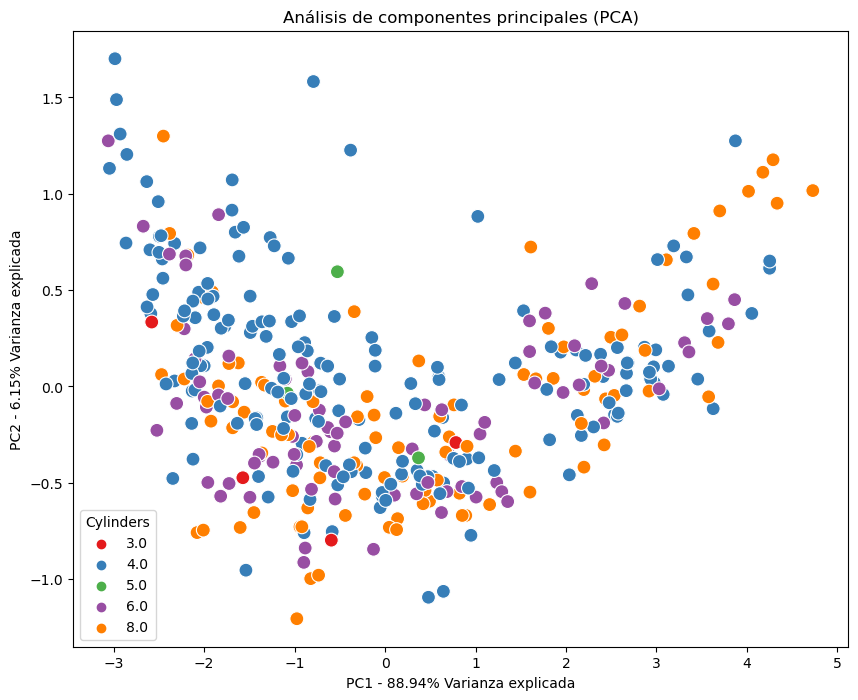

In [27]:
# Gráfico de los componentes principales

plt.figure(figsize=(10, 8))

sns.scatterplot(x='PC1', y='PC2', hue=data1['cylinders'], data=pca_df, palette='Set1', s=100)

plt.title('Análisis de componentes principales (PCA)')

plt.xlabel(f'PC1 - {explained_variance[0]:.2%} Varianza explicada')

plt.ylabel(f'PC2 - {explained_variance[1]:.2%} Varianza explicada')

plt.legend(title='Cylinders', loc='best')

plt.show()


El análisis de componentes principales (PCA) muestra que las dos primeras componentes principales explican el 95.12% de la varianza total, con la primera componente capturando la mayor parte (88.78%). Sin embargo, no se observa una clara separación de los vehículos basada en el número de cilindros en el gráfico de dispersión, ya que los puntos correspondientes a diferentes grupos de cilindros se superponen considerablemente. Esto sugiere que, aunque el PCA ha reducido la dimensionalidad de los datos, no es suficiente para distinguir de manera efectiva entre los vehículos según el número de cilindros utilizando solo estas dos componentes principales.

**Variables categóricas**

En esta etapa del análisis, dirigiremos nuestra atención hacia las variables categóricas del conjunto de datos, específicamente **cylinders**, **model_year**, **origin** y **car_name**. Para evaluar la relación entre estas variables y nuestra variable objetivo, emplearemos el test chi-cuadrado. Esta prueba estadística nos permitirá determinar si existe una asociación significativa entre las variables categóricas mencionadas y el resultado de interés, proporcionándonos valiosa información sobre la estructura y las dependencias presentes en nuestros datos.

In [28]:
# Copia de la base original

data3 = data.copy()

# Seleccionar las variables

selected_columns = data3[['cylinders', 'model_year', 'origin',"car_name"]]

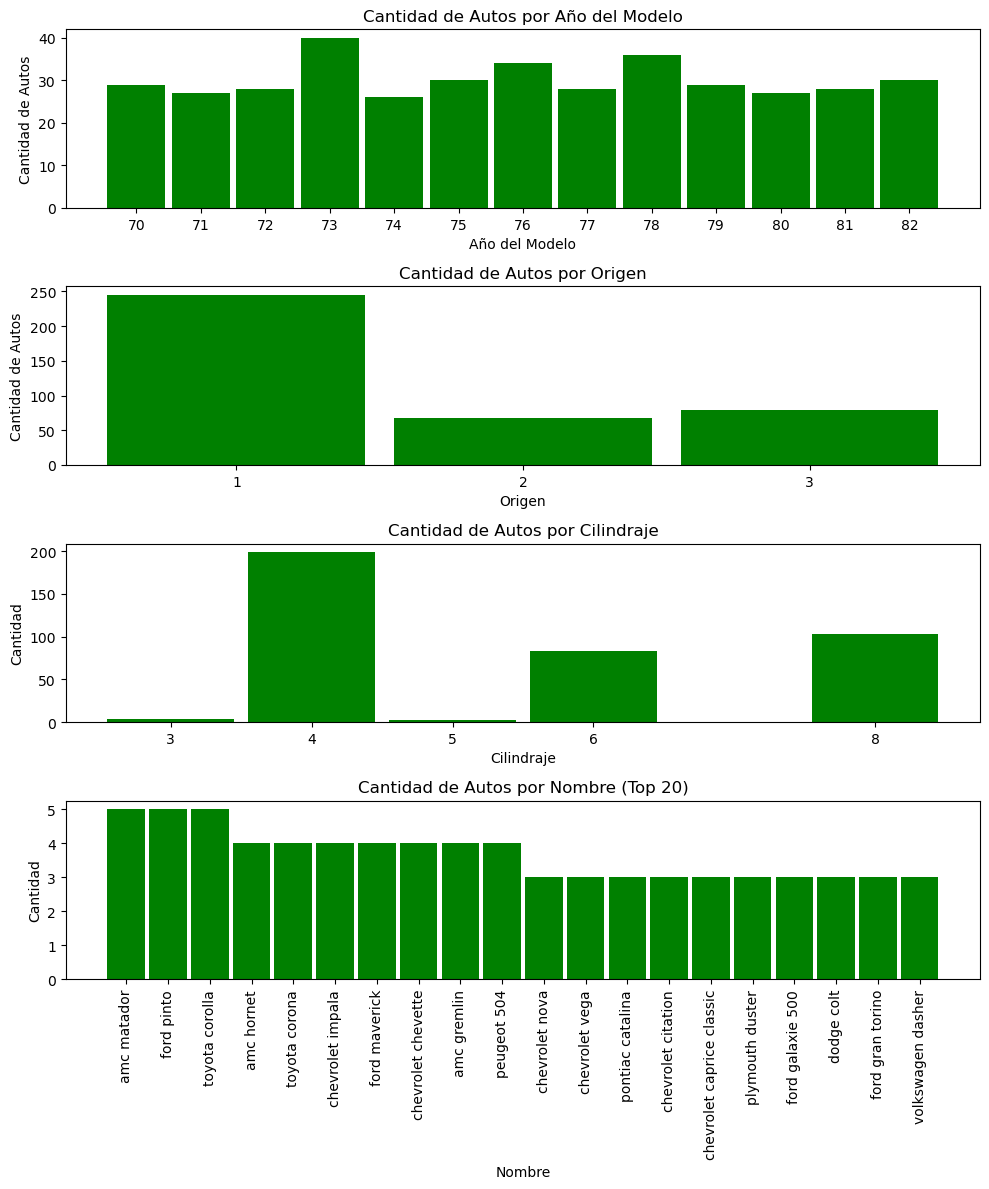

In [29]:
count_by_year = data3['model_year'].value_counts()

count_by_origin = data3['origin'].value_counts()

count_by_cylinders = data3['cylinders'].value_counts()

count_by_name = data3['car_name'].value_counts()


fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))

# Model_year

ax[0].bar(count_by_year.index, count_by_year.values, width=0.9, color='green')

ax[0].set_title('Cantidad de Autos por Año del Modelo')

ax[0].set_xlabel('Año del Modelo')

ax[0].set_ylabel('Cantidad de Autos')

ax[0].set_xticks(count_by_year.index)

# Origin

ax[1].bar(count_by_origin.index, count_by_origin.values, width=0.9, color='green')

ax[1].set_title('Cantidad de Autos por Origen')

ax[1].set_xlabel('Origen')

ax[1].set_ylabel('Cantidad de Autos')

ax[1].set_xticks(count_by_origin.index)

# Cylinders

ax[2].bar(count_by_cylinders.index, count_by_cylinders.values, width=0.9, color='green')

ax[2].set_title('Cantidad de Autos por Cilindraje')

ax[2].set_xlabel('Cilindraje')

ax[2].set_ylabel('Cantidad')

ax[2].set_xticks(count_by_cylinders.index)

# Car_name

ax[3].bar(count_by_name.index[:20], count_by_name.values[:20], width=0.9, color='green')  

ax[3].set_title('Cantidad de Autos por Nombre (Top 20)')

ax[3].set_xlabel('Nombre')

ax[3].set_ylabel('Cantidad')

ax[3].set_xticklabels(count_by_name.index[:20], rotation=90)  

plt.tight_layout()

plt.show()

La primera gráfica muestra la cantidad de autos registrados en el estudio por año del modelo. Es notorio que el año con más autos registrados es 1974, seguido de cerca por los años 1970, 1976 y 1978. Los demás años presentados  tales como 1972, 1980 y 1982 entre otros, exhiben cantidades similares entre sí, pero menores en comparación con los picos mencionados anteriormente. Esto podría indicar variaciones de ciertos modelos de autos durante esos años específicos.

El pais 1 tiene una representación mucho mayor en el estudio en comparación con los países 2 y 3. Esto sugiere una preponderancia de datos del país 1, que podría interpretarse como una mayor cuota de mercado de vehículos en este estudio o una mayor disponibilidad de datos de ese país en particular.

La mayoría de los automóviles tienen motores de 4 cilindros, lo que refleja una preferencia por vehículos con motores más eficientes en consumo de combustible. Los motores de 6 y 8 cilindros también están presentes en menor cantidad, lo que indica su nicho en vehículos de mayor potencia. Las categorías de 3 y 5 cilindros son marginales, sugiriendo una baja demanda o producción limitada. En conjunto, la distribución evidencia una segmentación clara del mercado automotriz según las características del motor y las necesidades del consumidor.

En la última gráfica muestra la alta variabilidad en los nombres de los carros, lo que podría justificar su eliminación como característica. Dado que existen numerosos niveles diferentes y solo se han representado los primeros 20, esta variable puede no ser útil para el análisis, ya que su dispersión y diversidad limitan su capacidad para contribuir de manera significativa a los modelos predictivos o análisis posteriores, aunque esto es una apreciación para decidir algo debemos de realizar una prueba estadistica.

**Test Chi-cuadrado**

El test chi cuadrado es una prueba estadística utilizada para evaluar si existe una relación significativa entre dos variables categóricas. Se basa en comparar las frecuencias observadas en los datos con las frecuencias esperadas, asumiendo que no hay relación entre las variables. Si la diferencia entre las frecuencias observadas y esperadas es grande, se rechaza la hipótesis nula, lo que indica una posible asociación entre las variables. Para este caso utilizaremos la variables cylinders como variable a predecir, tomando encuenta que esta misma variable es la que se utilizara en el siguiente item.

In [30]:
data4 = data.copy()

selected_columns = data4[['model_year', 'origin', "car_name"]]

y = data4['cylinders']

X = selected_columns.apply(LabelEncoder().fit_transform)

In [31]:
# Calcular los puntajes chi-cuadrado

chi2_scores, p_values = chi2(X, y)

# Crear un DataFrame con los resultados para una mejor visualización

chi2_results = pd.DataFrame({"Feature": X.columns, "Chi2 Score": chi2_scores, "p-value": p_values})

# Mostrar los resultados

print(chi2_results)

      Feature   Chi2 Score       p-value
0  model_year   115.757280  4.301143e-24
1      origin   157.473718  5.089508e-33
2    car_name  2046.052400  0.000000e+00


**Mejores caracteristicas**

Procedemos a observar las mejores características analizando cuidadosamente cada variable y su impacto en el resultado final. Este proceso implica identificar los atributos más relevantes y significativos, que aporten valor al análisis y ayuden a simplificar los modelos, mejorando así su precisión y eficiencia. A través de técnicas de selección y evaluación, podemos filtrar las características que no aportan información relevante, optimizando el rendimiento del modelo y facilitando una interpretación más clara y coherente de los datos. Esta observación detallada es clave para obtener resultados más robustos y fiables.

In [33]:
selected_columns = data3[['model_year', 'origin', 'car_name']]

y = data3['cylinders']

# Si las características son categóricas, es necesario codificarlas como números

X = selected_columns.apply(LabelEncoder().fit_transform)

# Seleccionar las 2 mejores características

k_best = SelectKBest(chi2, k=2)

X_k_best = k_best.fit_transform(X, y)

# Ver cuáles fueron seleccionadas

selected_features = X.columns[k_best.get_support()]

# Imprimir las características seleccionadas y cuál fue eliminada

print("Mejores características seleccionadas:")

for feature in selected_features:
    
    print(feature)

# Imprimir la variable eliminada

eliminated_feature = set(X.columns) - set(selected_features)

print("\nCaracterística eliminada:")

for feature in eliminated_feature:
    
    print(feature)

Mejores características seleccionadas:
origin
car_name

Característica eliminada:
model_year


Para predecir la variable **cylinders**, se seleccionaron las características **origin** y **car_name**, mientras que **model_year** fue eliminada debido a su baja relevancia. Esto sugiere que **origin** y **car_name** tienen una mayor asociación con la variable objetivo. A pesar de la alta variabilidad de **car_name**, su impacto es más significativo que el de **model_year**, lo que justifica su inclusión en el análisis.

**d. Por último, compare la importancia de cada uno de los atributos en función de la técnica de determinación de Random Forest (suponiendo que intenta predecir la
cantidad de cilindros de un auto). Analice la importancia de las variables de modo analítico y gráfico.**

En esta última etapa del primer punto, se procederá a evaluar la importancia de cada uno de los atributos del conjunto de datos utilizando la técnica de Random Forest. El objetivo es determinar qué variables tienen el mayor impacto al predecir la cantidad de cilindros de un automóvil. Se utilizará el modelo de Random Forest, conocido por su capacidad para manejar datos complejos y capturar interacciones no lineales entre las variables, para calcular la importancia de cada atributo. Posteriormente, se realizará un análisis tanto analítico como gráfico de estos resultados, lo que permitirá identificar las variables más influyentes y comprender mejor su papel en la predicción del número de cilindros.

**Ajuste del modelo Random Forest**

El modelo predictivo Random Forest es un algoritmo de aprendizaje supervisado que se utiliza para clasificación y regresión. Funciona mediante la creación de múltiples árboles de decisión durante el entrenamiento y combina sus resultados para mejorar la precisión y reducir el riesgo de sobreajuste. Cada árbol en el bosque produce una predicción y, al promediar o votar por las predicciones individuales, el modelo final obtiene un resultado más robusto y confiable. Esta técnica es especialmente útil en conjuntos de datos complejos con muchas variables, ya que maneja bien la variabilidad y las interacciones entre los datos.

En este caso, es necesario convertir las variables **cylinders**, **model_year**, y **origin** a un formato numérico, dado que, aunque **model_year** y **origin** son de tipo entero, deben ser tratadas como variables categóricas. Además, se ha decidido excluir la variable **car_name** del análisis, ya que contiene nombres y no puede ser convertida a un formato numérico de manera adecuada. Dado que el modelo de Random Forest requiere que todas las variables, incluida la variable objetivo cylinders, sean numéricas para funcionar correctamente, estas conversiones son esenciales para asegurar un análisis válido.

In [34]:
X1 = data.drop('cylinders', axis=1)

y1 = data['cylinders']

In [36]:
data5 = data.copy()

# Convertir 'cylinders', 'model_year' y 'origin' al formato numérico

label_encoder = LabelEncoder()

data5['cylinders'] = label_encoder.fit_transform(data5['cylinders'])

data5['model_year'] = label_encoder.fit_transform(data5['model_year'])

data5['origin'] = label_encoder.fit_transform(data5['origin'])

# Seleccionar todas las columnas excepto 'car_name'

X1 = data5.drop(['car_name'], axis=1)

y1 = X1.pop('cylinders')  # Separar la variable objetivo 'cylinders'

# Identificar y manejar columnas de tipo string (object)

object_columns = X1.select_dtypes(include=['object']).columns

if not object_columns.empty:
    
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    
    X1_encoded = encoder.fit_transform(X1[object_columns])
    
    X1 = X1.drop(object_columns, axis=1)
    
    X1 = np.concatenate((X1.values, X1_encoded), axis=1)
    
else:
    
    X1 = X1.values 

# Crear y entrenar el modelo Random Forest

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

model_rf.fit(X1, y1)

# Imprimir la importancia de las características ordenadas

feature_importances = model_rf.feature_importances_

features = data5.columns.drop(['car_name', 'cylinders'])

# Ordenar las características por importancia

sorted_indices = np.argsort(feature_importances)[::-1]

sorted_features = features[sorted_indices]

sorted_importances = feature_importances[sorted_indices]

print("Importancia de las características (ordenadas):")

for feature, importance in zip(sorted_features, sorted_importances):
    
    print(f"{feature}: {importance:.4f}")


Importancia de las características (ordenadas):
displacement: 0.3648
weight: 0.1812
horsepower: 0.1742
mpg: 0.1512
acceleration: 0.0737
origin: 0.0415
model_year: 0.0133


La importancia de las características en el modelo, ordenadas de mayor a menor, muestra que **displacement** es la más influyente con un valor de 0.3648, seguida por **weight** con 0.1812 y **horsepower** con 0.1742. La variable **mpg** también tiene un impacto considerable con 0.1512. En menor medida, **acceleration** aporta 0.0737, mientras que **origin** y **model_year** tienen una relevancia más baja, con valores de 0.0415 y 0.0133 respectivamente. Este orden indica qué características son más determinantes en el desempeño del modelo predictivo.

Gráficamente, tenemos una representación que muestra la importancia relativa de cada característica en el modelo

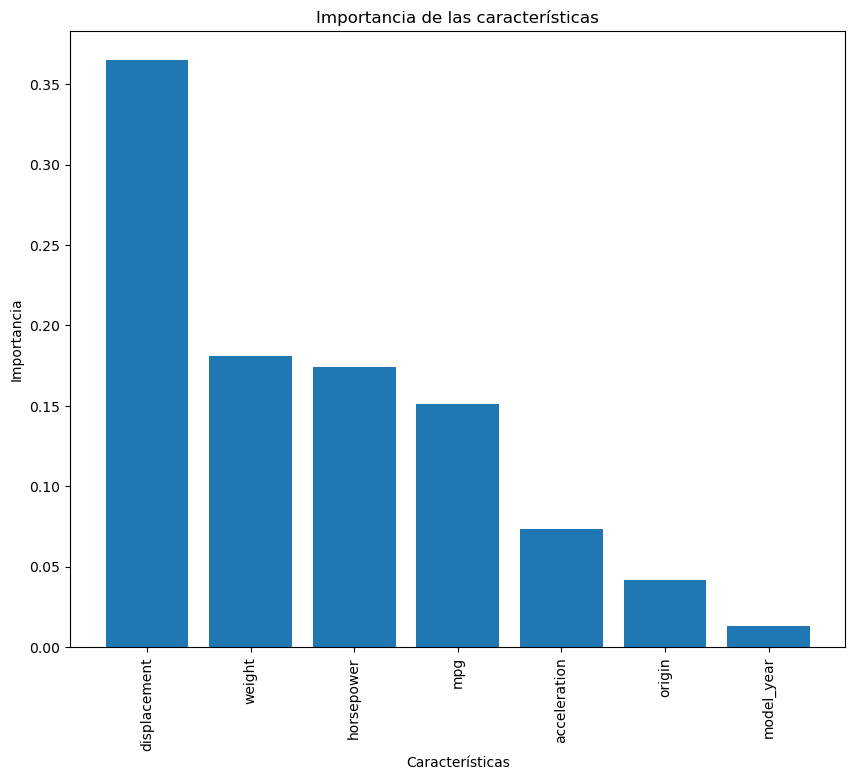

In [38]:
sorted_indices = np.argsort(feature_importances)[::-1]

sorted_features = features[sorted_indices]

sorted_importances = feature_importances[sorted_indices]

# Gráfico de la importancia de las características

plt.figure(figsize=(10, 8))

plt.title('Importancia de las características')

plt.bar(range(len(sorted_features)), sorted_importances, align='center')

plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)

plt.xlabel('Características')

plt.ylabel('Importancia')

plt.show()

La evaluación de la importancia de las características mediante Random Forest revela que **displacement** y **weight** son las más influyentes en la predicción del número de cilindros, mientras que **model_year** y **origin** tienen una influencia mucho menor. Esto sugiere que **model_year** y **origin** podrían ser consideradas para su eliminación en futuras iteraciones del modelo, con el objetivo de simplificar el modelo sin comprometer significativamente la precisión de las predicciones. Esta información es clave para entender qué factores están más estrechamente relacionados con la cantidad de cilindros en un automóvil.

**Resumen**

Mediante la aplicación de diversas técnicas de selección de variables, se determinaron las variables a eliminar según los criterios específicos de cada método:

- **Low Variance Filter**: Se eliminó la variable **acceleration**.

- **Reducción de Variables Altamente Correlacionadas**: Se eliminaron las variables **displacement**, **horsepower** y **weight**.

- **PCA**: En lugar de eliminar, las variables altamente correlacionadas se transformaron en componentes principales.

- **Chi-cuadrado**: Se eliminó la variable **model_year**.

- **Random Forest**: Se eliminaron las variables **model_year** y origin**.


<center> <font color='black'> <b>Punto dos</b> </font> </center>    

**a. Cargue y explore el dataset explicando en qué consiste y las características que posee el mismo.**

In [41]:
# Lectura de la base de datos dos.

covid_db = pd.read_csv("covid19.csv")

In [42]:
# Dimensión de la base.

print(covid_db.shape)

(215, 13)


Nuestro conjunto de datos se centra en los casos de COVID-19, una enfermedad infecciosa causada por el coronavirus SARS-CoV-2 que se convirtió en una pandemia global en 2020. La base de datos contiene información detallada sobre 215 casos individuales, cada uno caracterizado por 13 variables diferentes.

In [43]:
# Visualizando  las primeras filas.

covid_db.head(n=5)

,rank,country,cases,deaths,recovered,active,critical,cases_1Mpop,deaths_1Mpop,tests,tests_1Mpop,population,continent
0,1,USA,"1,696,547","99,561","456,595","1,140,391","17,065","5,129",301,"15,029,393","45,433","330,806,424",North America
1,2,Brazil,"367,906","22,965","149,911","195,030","8,318","1,732",108,"735,224","3,461","212,405,664",South America
2,3,Russia,"353,427","3,633","118,798","230,996","2,300","2,422",25,"8,945,384","61,300","145,928,315",Europe
3,4,Spain,"282,852","28,752","196,958","57,142",854,"6,050",615,"3,556,567","76,071","46,752,999",Europe
4,5,UK,"261,184","36,914",NaN,NaN,"1,559","3,849",544,"3,532,634","52,065","67,850,075",Europe


La base de datos que estamos analizando proviene de Worldometer, una fuente reconocida de información estadística global. Esta recopilación abarca un extenso registro de la pandemia de COVID-19, iniciando el 29 de enero de 2020 y extendiéndose hasta el 13 de abril de 2024, fecha en que se detuvo su actualización. El conjunto de datos ofrece una visión detallada de la evolución de la pandemia en diferentes países, conteniendo 13 variables clave:

1. **rank**: Posición del país según el número total de casos.

2. **country**: Nombre del país.

3. **cases**: Total de casos confirmados de COVID-19.

4. **deaths**: Número total de fallecimientos.

5. **recovered**: Cantidad de personas recuperadas.

6. **active**: Casos activos actuales.

7. **critical**: Número de casos en estado crítico.
8. **cases_1Mpop**: Casos por millón de habitantes.
9. **deaths_1Mpop**: Muertes por millón de habitantes.
10. **tests**: Total de pruebas de COVID-19 realizadas.
11. **tests_1Mpop**: Pruebas realizadas por millón de habitantes.
12. **population**: Población total del país.
13. **continent**: Continente al que pertenece el país.

Esta estructura comprehensiva permite un análisis profundo de la pandemia, facilitando comparaciones entre países, evaluación de estrategias de salud pública y comprensión de los impactos demográficos del COVID-19 a nivel global.

In [44]:
buffer = io.StringIO()

covid_db.info(buf=buffer)

info = buffer.getvalue()

info_list = [line.split(maxsplit=3) for line in info.split('\n')[5:-3]]

print(tabulate(info_list, headers=["#", "Varible", "Cantidad no nulos", "Tipo"]))

  #  Varible         Cantidad no nulos  Tipo
---  ------------  -------------------  ------------------
  0  rank                          215  non-null    int64
  1  country                       215  non-null    object
  2  cases                         215  non-null    object
  3  deaths                        183  non-null    object
  4  recovered                     211  non-null    object
  5  active                        213  non-null    object
  6  critical                      129  non-null    object
  7  cases_1Mpop                   213  non-null    object
  8  deaths_1Mpop                  181  non-null    object
  9  tests                         189  non-null    object
 10  tests_1Mpop                   189  non-null    object
 11  population                    215  non-null    object
 12  continent                     213  non-null    object


Es fundamental ajustar el tipo de datos de las variables para reflejar con precisión su naturaleza y optimizar el análisis. Este proceso de organización es crucial por varias razones. Primero, asegura que los cálculos y operaciones estadísticas se realicen correctamente, evitando errores de interpretación. Segundo, permite un manejo más eficiente de la memoria y mejora el rendimiento computacional. Además, facilita la aplicación de técnicas de análisis específicas para cada tipo de dato, como métodos categóricos para variables nominales o técnicas numéricas para variables continuas. Por último, una correcta tipificación de datos mejora la legibilidad y comprensión del conjunto de datos, facilitando su manipulación y análisis posterior.

In [45]:
covid_db['country'] = covid_db['country'].astype('category')

covid_db['cases'] = covid_db['cases'].str.replace(',', '').astype('int')

covid_db['deaths'] = covid_db['deaths'].str.replace(',', '').astype('float')

covid_db['recovered'] = covid_db['recovered'].str.replace(',', '').astype('float')

covid_db['active'] = covid_db['active'].str.replace(',', '').astype('float')

covid_db['critical'] = covid_db['critical'].str.replace(',', '').astype('float')

covid_db['cases_1Mpop'] = covid_db['cases_1Mpop'].str.replace(',', '').astype('float')

covid_db['deaths_1Mpop'] = covid_db['deaths_1Mpop'].str.replace(',', '').astype('float')

covid_db['tests'] = covid_db['tests'].str.replace(',', '').astype('float')

covid_db['tests_1Mpop'] = covid_db['tests_1Mpop'].str.replace(',', '').astype('float')

covid_db['population'] = covid_db['population'].str.replace(',', '').astype('int')

covid_db['continent'] = covid_db['continent'].astype('category')

In [46]:
buffer = io.StringIO()

covid_db.info(buf=buffer)

info = buffer.getvalue()

info_list = [line.split(maxsplit=3) for line in info.split('\n')[5:-3]]

print(tabulate(info_list, headers=["#", "Varible", "Cantidad no nulos", "Tipo"]))

  #  Varible         Cantidad no nulos  Tipo
---  ------------  -------------------  --------------------
  0  rank                          215  non-null    int64
  1  country                       215  non-null    category
  2  cases                         215  non-null    int32
  3  deaths                        183  non-null    float64
  4  recovered                     211  non-null    float64
  5  active                        213  non-null    float64
  6  critical                      129  non-null    float64
  7  cases_1Mpop                   213  non-null    float64
  8  deaths_1Mpop                  181  non-null    float64
  9  tests                         189  non-null    float64
 10  tests_1Mpop                   189  non-null    float64
 11  population                    215  non-null    int32
 12  continent                     213  non-null    category


La tabla resume las características del conjunto de datos, especificando la cantidad de valores no nulos y los tipos de datos asociados a cada variable. Destacan variables como **rank**, **country**, **cases**, y **population**, que no presentan valores nulos, mientras que **critical**, **deaths**, y tests tienen menos datos disponibles, lo que podría requerir un tratamiento especial de los valores faltantes. Los tipos de datos incluyen enteros, flotantes y categóricos, siendo predominantes los valores flotantes, lo cual es adecuado para análisis estadísticos. Este resumen proporciona una visión clara de la estructura del conjunto de datos, facilitando la planificación del preprocesamiento necesario para análisis posteriores.

Procedemos a verificar los datos faltantes en nuestra base de datos.

In [47]:
faltantes = covid_db.isna().sum()

resultados = pd.DataFrame({
    'Variable': faltantes.index,
    'Cantidad': faltantes.values
})

print(resultados)

sum(covid_db.isna().sum())

        Variable  Cantidad
0           rank         0
1        country         0
2          cases         0
3         deaths        32
4      recovered         4
5         active         2
6       critical        86
7    cases_1Mpop         2
8   deaths_1Mpop        34
9          tests        26
10   tests_1Mpop        26
11    population         0
12     continent         2


214

El análisis del conjunto de datos, compuesto por un total de 214 registros, revela la existencia de valores faltantes en varias variables clave. La variable critical es la más afectada, con 86 registros incompletos, seguida de **deaths** y **deaths_1Mpop**, que presentan 32 y 34 valores faltantes, respectivamente. Asimismo, las variables **tests** y **tests_1Mpop** muestran 26 datos ausentes cada una, lo que podría impactar en la precisión de los análisis relacionados con la capacidad de testeo. Se identificaron también faltantes menores en recovered, **active**, **cases_1Mpop**, y continent, con entre 2 y 4 datos faltantes. Por otro lado, las variables **rank**, **country**, **cases**, y **population** no presentan datos faltantes, lo que refuerza su fiabilidad en el análisis. Este diagnóstico pone de manifiesto la necesidad de implementar estrategias adecuadas para manejar los valores faltantes, con el fin de preservar la integridad y robustez del análisis subsiguiente.

Detección de las variables con valor cero en nuestra base de datos.

In [48]:
cols = covid_db[covid_db == 0].count(axis=0)

cols[cols > 0]

active          20
deaths_1Mpop    12
population       2
dtype: int64

En la revisión de nuestra base de datos, se identificaron variables con valores cero que podrían afectar la precisión del análisis. La variable active presenta 20 valores cero, lo que sugiere posibles errores o falta de datos. De manera similar, **deaths_1Mpop** tiene 12 valores cero, lo que podría reflejar la ausencia de reportes en ciertas regiones. Finalmente, population cuenta con 2 valores cero, lo cual es especialmente preocupante y requiere atención para corregir posibles errores en los datos.

Procedemos a eliminar estas dos observaciones, dado que es improbable que la población de un país sea cero.

In [49]:
# Dejamos en la base de datos de estudio las observaciones donde population sea diferente de cero

covid_db = covid_db.loc[covid_db['population'] != 0]

# Verificamos

cols = covid_db[covid_db == 0].count(axis=0)

cols[cols > 0]

active          20
deaths_1Mpop    12
dtype: int64

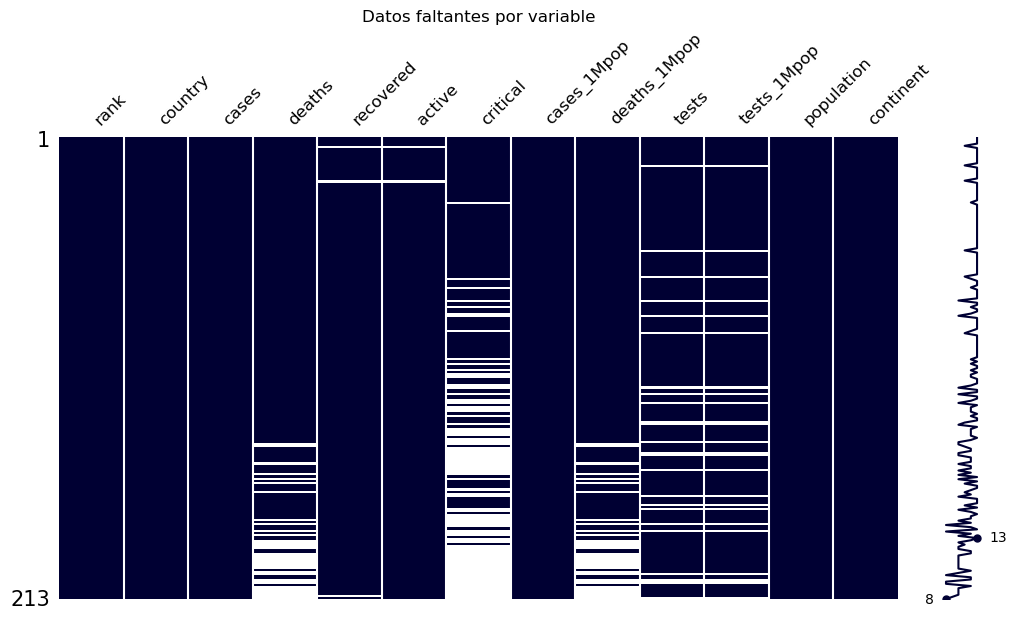

In [50]:
ax = msno.matrix(covid_db,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

plt.title('Datos faltantes por variable')

plt.show()

In [51]:
print(f'''Proporción de datos faltantes: {round(sum(covid_db.isna().sum())/213*100, 2)}%

Proporción en variable critical: {round(covid_db.isna().sum().critical/213*100, 2)}%

Proporción en variable deaths: {round(covid_db.isna().sum().deaths/213*100, 2)}%

Proporción en variable deaths_1Mpop: {round(covid_db.isna().sum().deaths_1Mpop/213*100, 2)}%

Proporción en variable tests: {round(covid_db.isna().sum().tests/213*100, 2)}%

Proporción en variable tests_1Mpop: {round(covid_db.isna().sum().tests_1Mpop/213*100, 2)}%

Proporción en variable recovered: {round(covid_db.isna().sum().recovered/213*100, 2)}%

Proporción en variable active: {round(covid_db.isna().sum().active/213*100, 2)}%''')

Proporción de datos faltantes: 94.84%

Proporción en variable critical: 39.91%

Proporción en variable deaths: 15.02%

Proporción en variable deaths_1Mpop: 15.02%

Proporción en variable tests: 11.27%

Proporción en variable tests_1Mpop: 11.27%

Proporción en variable recovered: 1.41%

Proporción en variable active: 0.94%


El análisis de la base de datos del coronavirus revela una significativa proporción de datos faltantes, alcanzando un 94.84%, lo que podría comprometer la validez y fiabilidad de los análisis subsecuentes. Específicamente, la variable critical presenta un 39.91 % de datos faltantes, lo que indica una considerable ausencia de información en este aspecto crucial del monitoreo de la pandemia. Las variables **deaths** y **deaths_1Mpop** también muestran proporciones notables de datos faltantes, con 15.02 % y 15.02%, respectivamente, lo que podría afectar la precisión de las estadísticas de mortalidad. Asimismo, las variables **tests** y **tests_1Mpop** tienen un 11.27% de datos faltantes, lo que podría limitar la capacidad de evaluar adecuadamente la capacidad de prueba en diferentes regiones. Por otro lado, las variables **recovered** y **active** presentan proporciones menores de datos faltantes, con 1.41% y 0.94%, respectivamente, aunque estas cifras aún podrían impactar el análisis de recuperación y casos activos. Estos niveles de datos faltantes subrayan la necesidad de estrategias robustas para la imputación o tratamiento de estos vacíos antes de proceder con análisis detallados.

Dado que se ha observado que varias filas en la base de datos presentan una cantidad significativa de datos faltantes, se ha tomado la decisión de eliminarlas. Esta acción se justifica en la necesidad de mantener la integridad y calidad del análisis, ya que un exceso de datos incompletos puede comprometer la fiabilidad de los resultados y dificultar la interpretación precisa de la información. Al eliminar estas filas, se busca garantizar que el conjunto de datos restante sea más consistente y representativo, permitiendo realizar análisis más robustos y concluyentes.

In [52]:
# Seleccionar filas con tres o más valores faltantes

filas_con_3_faltantes = covid_db[covid_db.isna().sum(axis=1) >= 3]

# Eliminar filas con tres o más valores faltantes

covid_db = covid_db.dropna(thresh=covid_db.shape[1] - 3)

In [53]:
print(covid_db.shape)

print(f'''Proporción de datos faltantes: {round(sum(covid_db.isna().sum())/206*100, 2)}%

Proporción en variable critical: {round(covid_db.isna().sum().critical/206*100, 2)}%

Proporción en variable deaths: {round(covid_db.isna().sum().deaths/206*100, 2)}%

Proporción en variable deaths_1Mpop: {round(covid_db.isna().sum().deaths_1Mpop/206*100, 2)}%

Proporción en variable tests: {round(covid_db.isna().sum().tests/206*100, 2)}%

Proporción en variable tests_1Mpop: {round(covid_db.isna().sum().tests_1Mpop/206*100, 2)}%

Proporción en variable recovered: {round(covid_db.isna().sum().recovered/206*100, 2)}%

Proporción en variable active: {round(covid_db.isna().sum().active/206*100, 2)}%''')

(206, 13)
Proporción de datos faltantes: 81.55%

Proporción en variable critical: 37.86%

Proporción en variable deaths: 12.14%

Proporción en variable deaths_1Mpop: 12.14%

Proporción en variable tests: 8.74%

Proporción en variable tests_1Mpop: 8.74%

Proporción en variable recovered: 0.97%

Proporción en variable active: 0.97%


Veamos el resultado gráfico después de realizar la eliminación.

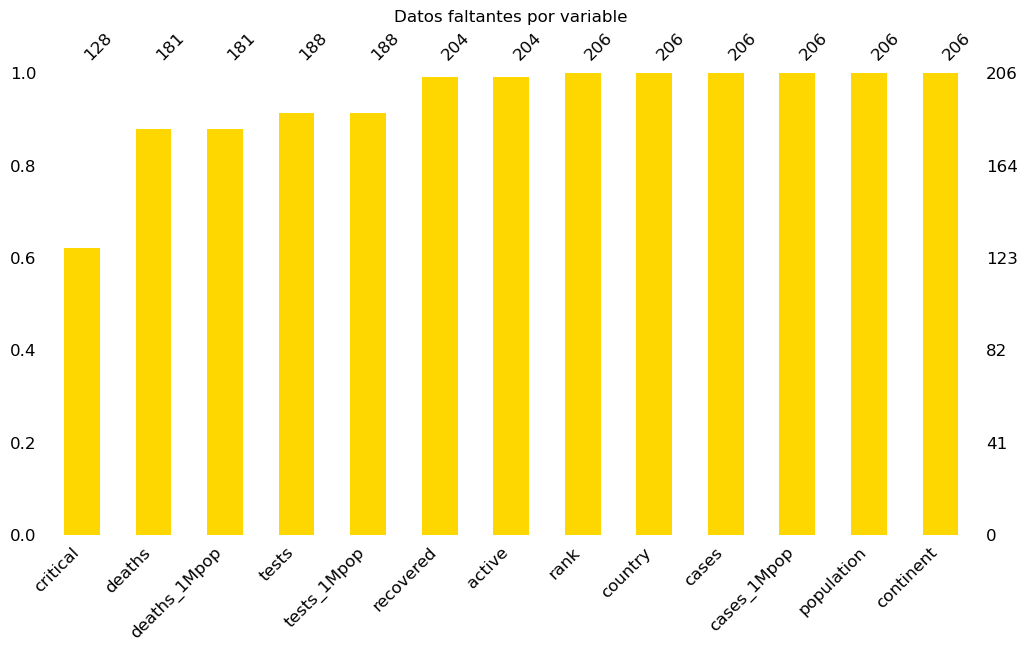

In [54]:
ax = msno.bar(covid_db, figsize=(12, 6), sort="ascending", fontsize=12, color='gold')

plt.title('Datos faltantes por variable')

plt.show()

Considerando que la variable critical aún presenta un número excesivo de datos faltantes, y dado que existen otras variables como **deaths**, **tests**, active y recovered que proporcionan una visión más completa de la situación del país, se ha decidido eliminar esta variable. Esta acción se justifica por la necesidad de preservar la integridad y fiabilidad del análisis, enfocándonos en variables que cuentan con datos más robustos. Además, se procederá a imputar los valores faltantes en las demás variables para asegurar la coherencia y calidad del conjunto de datos, permitiendo así un análisis más preciso y representativo.

In [55]:
# Eliminar la variable critical

covid_db = covid_db.drop(columns=['critical'])

In [56]:
print(covid_db.shape)

print(f'''Proporción de datos faltantes: {round(sum(covid_db.isna().sum())/206*100, 2)}%

Proporción en variable deaths: {round(covid_db.isna().sum().deaths/206*100, 2)}%

Proporción en variable deaths_1Mpop: {round(covid_db.isna().sum().deaths_1Mpop/206*100, 2)}%

Proporción en variable tests: {round(covid_db.isna().sum().tests/206*100, 2)}%

Proporción en variable tests_1Mpop: {round(covid_db.isna().sum().tests_1Mpop/206*100, 2)}%

Proporción en variable recovered: {round(covid_db.isna().sum().recovered/206*100, 2)}%

Proporción en variable active: {round(covid_db.isna().sum().active/206*100, 2)}%''')

(206, 12)
Proporción de datos faltantes: 43.69%

Proporción en variable deaths: 12.14%

Proporción en variable deaths_1Mpop: 12.14%

Proporción en variable tests: 8.74%

Proporción en variable tests_1Mpop: 8.74%

Proporción en variable recovered: 0.97%

Proporción en variable active: 0.97%


In [57]:
faltantes = covid_db.isna().sum()

resultados = pd.DataFrame({

    'Variable': faltantes.index,

    'Cantidad': faltantes.values
})

print(resultados)

sum(covid_db.isna().sum())

        Variable  Cantidad
0           rank         0
1        country         0
2          cases         0
3         deaths        25
4      recovered         2
5         active         2
6    cases_1Mpop         0
7   deaths_1Mpop        25
8          tests        18
9    tests_1Mpop        18
10    population         0
11     continent         0


90

Tras la depuración de la base de datos del coronavirus, la proporción de datos faltantes se redujo significativamente, alcanzando un 43.69%. A este punto, se identificaron seis variables con datos incompletos, de las cuales cuatro son fundamentales para el estudio. Para minimizar sesgos y preservar la calidad del análisis, se decidió eliminar las observaciones con valores faltantes en las variables active y recovered, ya que eran escasas solo 2 registros. Para las variables **deaths** y **tests**, se implementó una imputación utilizando la mediana de la variable respectiva por continente, asegurando que los datos faltantes se completaran de manera coherente según la región geográfica. En cuanto a las variables **deaths_1Mpop** y **tests_1Mpop**, se utilizó la variable population para calcular los valores faltantes, dividiendo el número de muertes o tests por la población total y luego multiplicando el resultado por un millón. Este enfoque garantiza una imputación precisa y mantiene la integridad del análisis, evitando alteraciones innecesarias en los datos originales.

In [58]:
# Calcular la mediana de 'deaths' y 'tests' para cada continente

mediana_por_continente = covid_db.groupby('continent')['deaths'].median()

mediana_por_continentet = covid_db.groupby('continent')['tests'].median()

# Imputar los valores faltantes de 'deaths' y 'tests' con la mediana correspondiente al continente

covid_db['deaths'] = covid_db.apply(
    lambda row: mediana_por_continente[row['continent']] if pd.isna(row['deaths']) else row['deaths'], axis=1
)

covid_db['tests'] = covid_db.apply(

    lambda row: mediana_por_continentet[row['continent']] if pd.isna(row['tests']) else row['tests'], axis=1

)

# Mostrar las primeras filas del DataFrame actualizado

# print(covid_db[['country', 'continent', 'deaths', 'tests']].head())

In [59]:
# Identificar filas con valores faltantes en 'deaths_1Mpop' y 'tests_1Mpop'

filtro_faltantes = covid_db['deaths_1Mpop'].isna()

filtro_faltantest = covid_db['tests_1Mpop'].isna()

# Calcular las muertes por millón solo para las filas con valores faltantes

muertes_por_millon_calculadas = (covid_db.loc[filtro_faltantes, 'deaths'] / covid_db.loc[filtro_faltantes, 'population']) * 1_000_000

tests_por_millon_calculados = (covid_db.loc[filtro_faltantest, 'tests'] / covid_db.loc[filtro_faltantest, 'population']) * 1_000_000

# Rellenar los valores faltantes en 'deaths_1Mpop' y 'tests_1Mpop' con los cálculos realizados

covid_db.loc[filtro_faltantes, 'deaths_1Mpop'] = muertes_por_millon_calculadas

covid_db.loc[filtro_faltantest, 'tests_1Mpop'] = tests_por_millon_calculados

# Mostrar las primeras filas del DataFrame actualizado
# print(covid_db[['country', 'deaths', 'population', 'deaths_1Mpop', 'tests', 'tests_1Mpop']].head())


In [60]:
# Eliminar filas donde la columna 'active' y 'recovered' tiene valores faltantes

covid_db = covid_db.dropna(subset=['active', 'recovered'])

<Axes: >

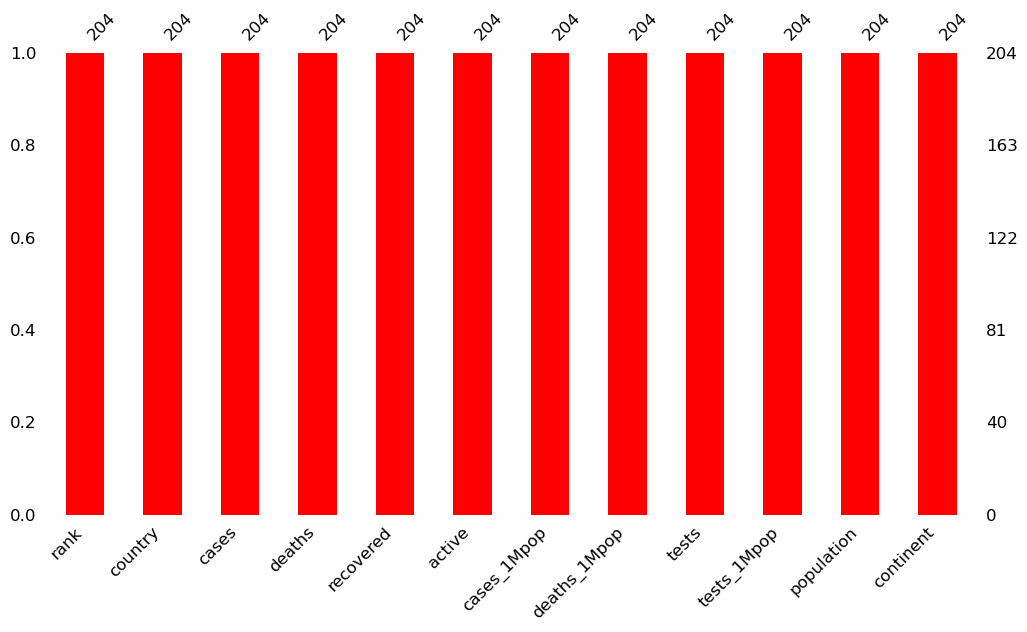

In [61]:
msno.bar(covid_db,figsize=(12, 6), sort="ascending",fontsize=12, color='red')

In [62]:
covid_db.isnull().sum().sum()

0

Tras el proceso de depuración y tratamiento de los datos faltantes, hemos logrado obtener una base de datos completa, sin valores faltantes, que ahora cuenta con 12 variables y 204 observaciones. Esta depuración asegura la integridad y coherencia de los datos, permitiendo realizar análisis más precisos y confiables. Al eliminar los valores nulos y ajustar las variables según metodologías robustas, hemos optimizado la calidad del conjunto de datos, lo que resulta fundamental para obtener conclusiones válidas y evitar sesgos en los resultados posteriores. Este enfoque garantiza que la base de datos esté en condiciones óptimas para su uso en análisis estadísticos y modelado predictivo.

**b. Aplicar distintos métodos de normalización y analizar las distribuciones resultantes. (Gráficos hist, qqplot, density, boxplot).**

Se realizan copias de la base de datos para aplicar distintos métodos y preservar la integridad de la base original.

In [63]:
# Se generan copias de la base de datos para aplicar los diferentes metodos.

covid_db1 = covid_db.copy()

covid_db2 = covid_db.copy()

covid_db3 = covid_db.copy()

covid_db4 = covid_db.copy()

**Normalización usando Z-score**

La normalización Z-score es una técnica que ajusta los datos para que tengan una media de cero y una desviación estándar de uno. Esto permite comparar variables con diferentes escalas de manera uniforme, mejorando la precisión de los modelos estadísticos y de aprendizaje automático. Al estandarizar los valores, se facilita la detección de valores atípicos y se elimina el sesgo que podrían introducir las diferencias de escala.

In [64]:
# Normalización usando Z-score

zscore_scaler = StandardScaler()

covid_db1['cases_zscore'] = zscore_scaler.fit_transform(covid_db1[['cases']])

covid_db1['deaths_zscore'] = zscore_scaler.fit_transform(covid_db1[['deaths']])

covid_db1['cases_1Mpop_zscore'] = zscore_scaler.fit_transform(covid_db1[['cases_1Mpop']])

covid_db1['deaths_1Mpop_zscore'] = zscore_scaler.fit_transform(covid_db1[['deaths_1Mpop']])


**Ventajas y desventajas**

La normalización mediante **z-score** ofrece varias ventajas clave en el procesamiento de datos. Al transformar las variables en una escala común, con una media de cero y una desviación estándar de uno, facilita la comparación entre características que tienen diferentes unidades o magnitudes. Esta técnica es especialmente valiosa en algoritmos que dependen de la medida de distancias, como k-Nearest Neighbors y la regresión lineal, donde un escalado uniforme de los datos puede mejorar significativamente el rendimiento. Además, al centrar los datos en torno a la media, la normalización z-score reduce la influencia de los valores extremos, mejorando la robustez de los modelos.

Sin embargo, la normalización z-score también tiene desventajas importantes. Puede no ser adecuada cuando los datos no siguen una distribución normal, ya que en tales casos la transformación puede no ser efectiva e incluso perjudicar el rendimiento del modelo. Además, la técnica es sensible a la presencia de valores atípicos; si estos no se gestionan adecuadamente antes de aplicar la normalización, pueden distorsionar el escalado de los datos, llevándolos a un análisis erróneo o a modelos menos precisos. Por lo tanto, es fundamental considerar la naturaleza y distribución de los datos antes de optar por esta técnica.

**Normalización usando Min-Max**

La normalización Min-Max ajusta los datos para que todos los valores se encuentren dentro de un rango específico, generalmente entre 0 y 1. Este método preserva las relaciones proporcionales entre los datos, evitando que variables con diferentes escalas dominen en los modelos de aprendizaje automático, lo que mejora su rendimiento y eficiencia.

In [65]:
# Normalización usando Min-Max

minmax_scaler = MinMaxScaler()

covid_db2['cases_minmax'] = minmax_scaler.fit_transform(covid_db2[['cases']])

covid_db2['deaths_minmax'] = minmax_scaler.fit_transform(covid_db2[['deaths']])

covid_db2['cases_1Mpop_minmax'] = minmax_scaler.fit_transform(covid_db2[['cases_1Mpop']])

covid_db2['deaths_1Mpop_minmax'] = minmax_scaler.fit_transform(covid_db2[['deaths_1Mpop']])


**Ventajas y desventajas**

La normalización Min-Max es eficaz para modelos que dependen de la linealidad de los datos, ya que mantiene las relaciones existentes entre características al escalarlos en un rango específico, generalmente entre 0 y 1. Esta técnica es útil en algoritmos que requieren un rango definido, como las redes neuronales con funciones de activación sigmoidal. Facilita la convergencia rápida en métodos de optimización y mejora la equidad en la contribución de atributos en algoritmos que dependen de medidas de distancia, como el clustering y los vecinos más cercanos.

Una de las principales desventajas de la normalización Min-Max es su vulnerabilidad a los valores atípicos, que pueden comprimir la mayoría de los datos en un rango estrecho, distorsionando la representación real de las características. No es adecuada para datos sin distribución definida o donde se anticipan valores futuros fuera del rango actual, lo que podría requerir reajustes frecuentes. Además, puede ser inapropiada para datos donde los ceros tienen un significado especial, como en matrices dispersas, porque altera su interpretación original.

**Escalado robusto usando la mediana y el rango intercuartil**

El escalado robusto utiliza la mediana y el rango intercuartil para normalizar los datos, minimizando el impacto de los valores atípicos. Este método centra los datos en la mediana y los ajusta según el rango entre los cuartiles primero y tercero, lo que lo hace menos sensible a los extremos. Es ideal para mejorar la estabilidad y precisión en modelos de aprendizaje automático cuando los datos contienen outliers significativos.

In [66]:
# Escalado robusto usando la mediana y el rango intercuartil

robust_iqr_scaler = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0))

covid_db3['cases_robust_iqr'] = robust_iqr_scaler.fit_transform(covid_db3[['cases']])

covid_db3['deaths_robust_iqr'] = robust_iqr_scaler.fit_transform(covid_db3[['deaths']])

covid_db3['cases_1Mpop_robust_iqr'] = robust_iqr_scaler.fit_transform(covid_db3[['cases_1Mpop']])

covid_db3['deaths_1Mpop_robust_iqr'] = robust_iqr_scaler.fit_transform(covid_db3[['deaths_1Mpop']])


**Ventajas y desventajas**

El escalado robusto usando la mediana y el rango intercuartil (IQR) minimiza el efecto de los valores atípicos en los datos, proporcionando una medida más fiable de la escala central cuando las distribuciones son asimétricas o contienen anomalías. Este método es especialmente útil en datasets con variaciones extremas, donde métodos estándar como la media y la desviación estándar podrían ser sesgados por los outliers.

Aunque eficaz contra los outliers, el escalado robusto puede no ser adecuado cuando los valores extremos son informativos para el análisis, ya que reduce su influencia. Además, puede ocultar diferencias sutiles entre los valores normales, crucial en ciertos análisis. El cálculo del IQR también implica un mayor costo computacional, lo que puede ser problemático en grandes datasets.

**Normalización decimal scaling**

La normalización Decimal Scaling ajusta los datos moviendo el punto decimal para que todos los valores queden dentro de un rango estándar. Esto se logra dividiendo cada valor por una potencia de 10, según el valor máximo absoluto del conjunto. Es útil para mantener la proporcionalidad entre los datos cuando sus magnitudes son similares pero tienen diferentes órdenes de magnitud.

In [67]:
# Decimal scaling

def decimal_scaling(column):

    d = np.floor(np.log10(np.max(column))) + 1

    return column / (10 ** d)

covid_db4['cases_decimal_scaling'] = decimal_scaling(covid_db4['cases'])

covid_db4['deaths_decimal_scaling'] = decimal_scaling(covid_db4['deaths'])

covid_db4['cases_1Mpop_decimal_scaling'] = decimal_scaling(covid_db4['cases_1Mpop'])

covid_db4['deaths_1Mpop_decimal_scaling'] = decimal_scaling(covid_db4['deaths_1Mpop'])

**Ventajas y desventajas**

La normalización por escalado decimal es un método simple y eficaz para ajustar datos numéricos, manteniendo su distribución y proporciones originales. Es especialmente útil cuando es importante preservar las relaciones relativas entre los valores, como en análisis financieros, ya que se realiza dividiendo los datos por una potencia de 10, sin alterar significativamente su rango.

Una desventaja del escalado decimal es que puede no ser lo suficientemente flexible para datos con rangos muy diversos o con valores atípicos. A diferencia de otros métodos como Min-Max Scaling o Z-score, no adapta la escala de los datos según su variabilidad, lo que puede afectar el rendimiento en algoritmos sensibles a la escala, como los que se basan en distancias.

A continuación, se presentan tres gráficos: histograma, boxplot y qqplot, generados tras aplicar distintos métodos para analizar la distribución de los datos.

**Histogramas**

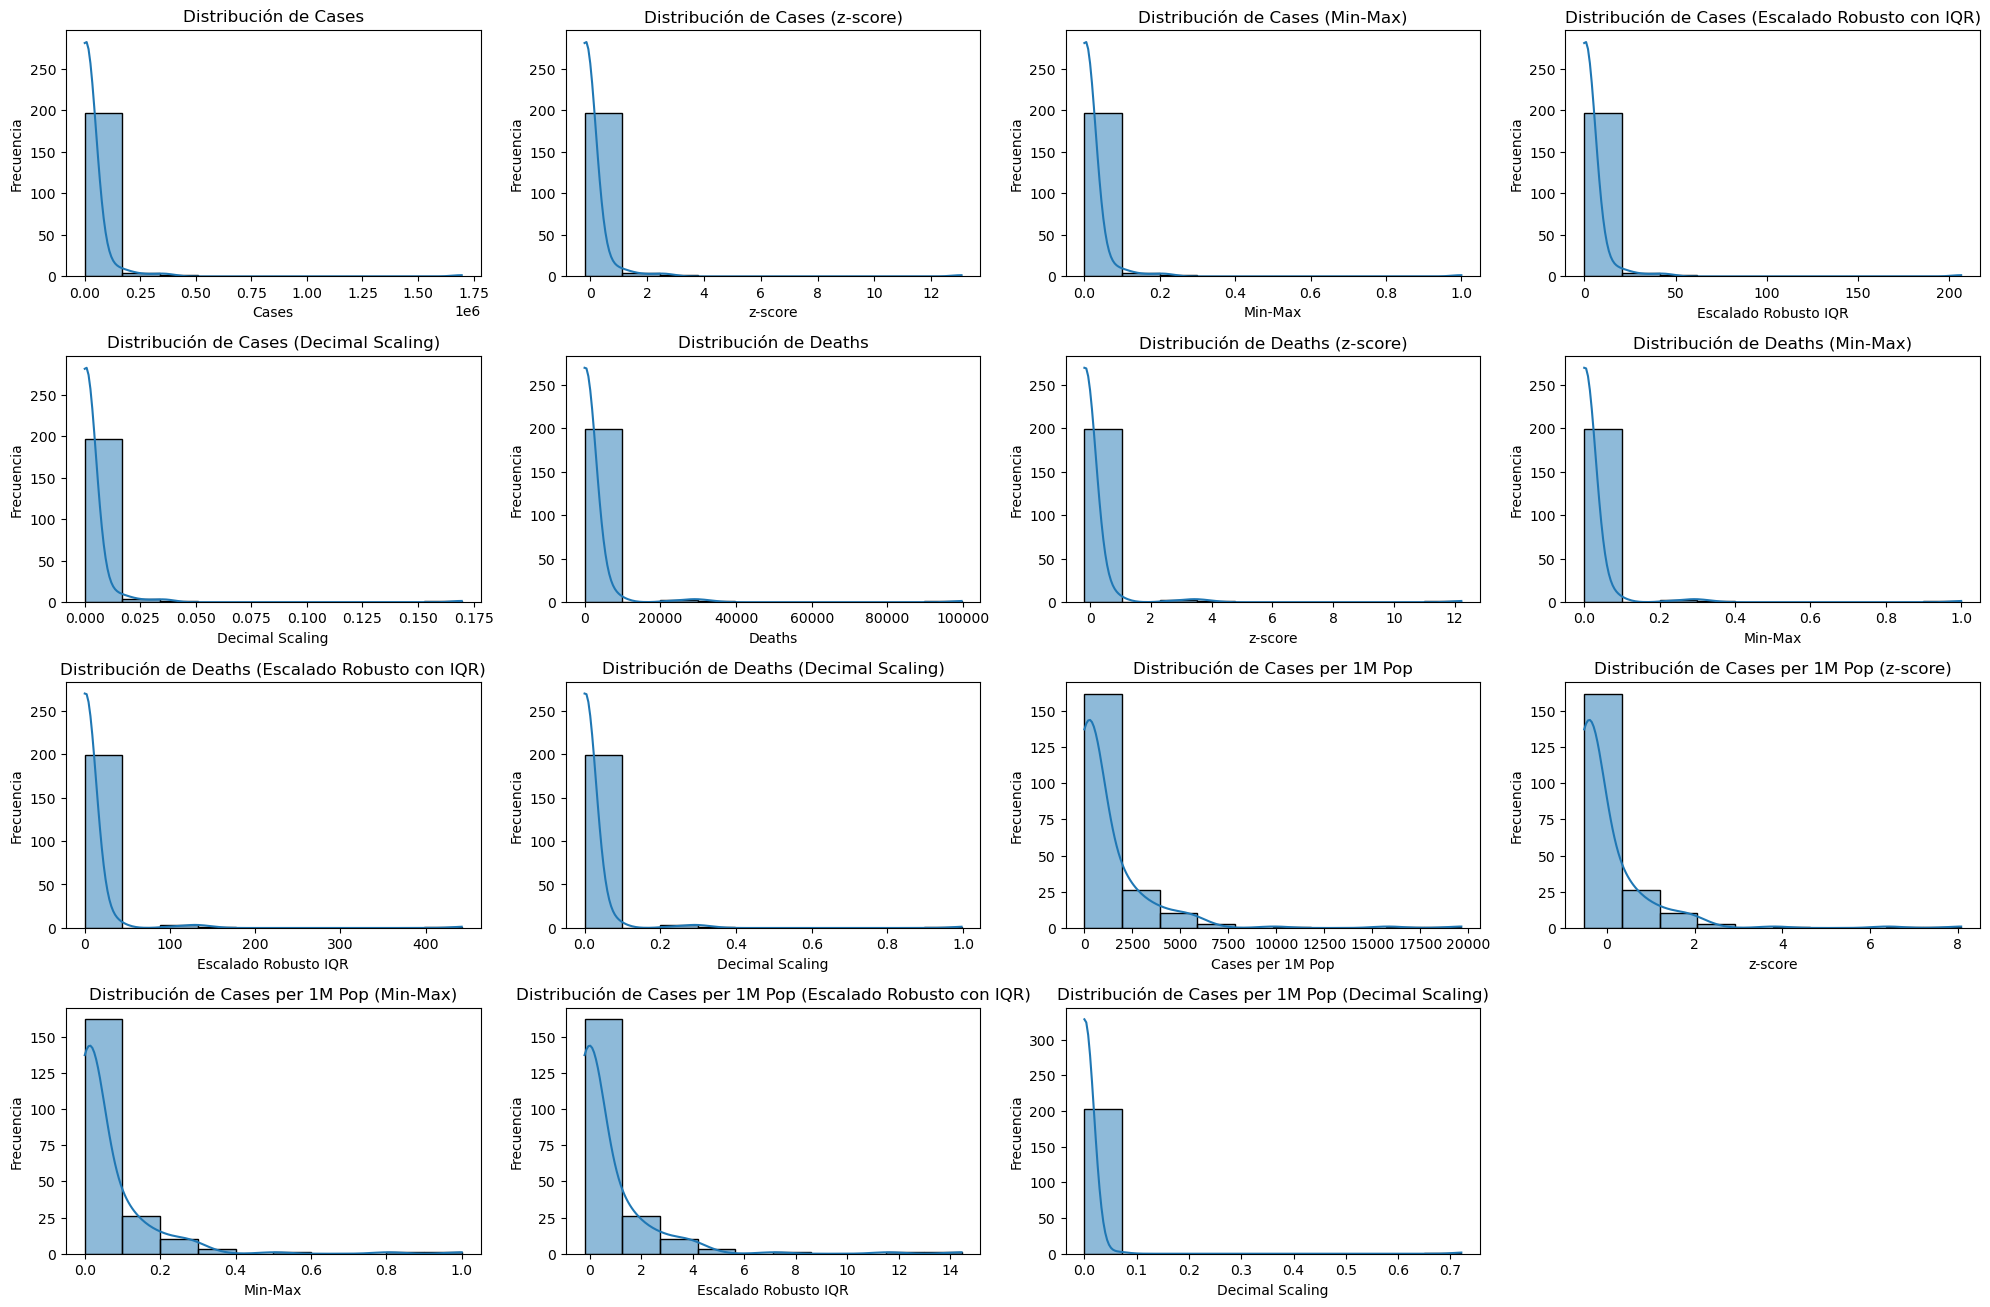

In [68]:
plt.figure(figsize=(20, 16))

# Gráfico para la variable original 'cases'

plt.subplot(5, 4, 1)

sns.histplot(covid_db['cases'], bins=10, kde=True)

plt.title('Distribución de Cases')

plt.xlabel('Cases')

plt.ylabel('Frecuencia')

# Gráfico para z-score de 'cases'

plt.subplot(5, 4, 2)

sns.histplot(covid_db1['cases_zscore'], bins=10, kde=True)

plt.title('Distribución de Cases (z-score)')

plt.xlabel('z-score')

plt.ylabel('Frecuencia')

# Gráfico para min-max de 'cases'

plt.subplot(5, 4, 3)

sns.histplot(covid_db2['cases_minmax'], bins=10, kde=True)

plt.title('Distribución de Cases (Min-Max)')

plt.xlabel('Min-Max')

plt.ylabel('Frecuencia')

# Gráfico para escalado robusto de 'cases'

plt.subplot(5, 4, 4)

sns.histplot(covid_db3['cases_robust_iqr'], bins=10, kde=True)

plt.title('Distribución de Cases (Escalado Robusto con IQR)')

plt.xlabel('Escalado Robusto IQR')

plt.ylabel('Frecuencia')

# Gráfico para decimal scaling de 'cases'

plt.subplot(5, 4, 5)

sns.histplot(covid_db4['cases_decimal_scaling'], bins=10, kde=True)

plt.title('Distribución de Cases (Decimal Scaling)')

plt.xlabel('Decimal Scaling')

plt.ylabel('Frecuencia')

# Repetir el proceso para 'deaths'

plt.subplot(5, 4, 6)

sns.histplot(covid_db['deaths'], bins=10, kde=True)

plt.title('Distribución de Deaths')

plt.xlabel('Deaths')

plt.ylabel('Frecuencia')

plt.subplot(5, 4, 7)

sns.histplot(covid_db1['deaths_zscore'], bins=10, kde=True)

plt.title('Distribución de Deaths (z-score)')

plt.xlabel('z-score')

plt.ylabel('Frecuencia')

plt.subplot(5, 4, 8)

sns.histplot(covid_db2['deaths_minmax'], bins=10, kde=True)

plt.title('Distribución de Deaths (Min-Max)')

plt.xlabel('Min-Max')

plt.ylabel('Frecuencia')

plt.subplot(5, 4, 9)

sns.histplot(covid_db3['deaths_robust_iqr'], bins=10, kde=True)

plt.title('Distribución de Deaths (Escalado Robusto con IQR)')

plt.xlabel('Escalado Robusto IQR')

plt.ylabel('Frecuencia')

plt.subplot(5, 4, 10)

sns.histplot(covid_db4['deaths_decimal_scaling'], bins=10, kde=True)

plt.title('Distribución de Deaths (Decimal Scaling)')

plt.xlabel('Decimal Scaling')

plt.ylabel('Frecuencia')

# Repetir el proceso para 'cases_1Mpop'

plt.subplot(5, 4, 11)

sns.histplot(covid_db['cases_1Mpop'], bins=10, kde=True)

plt.title('Distribución de Cases per 1M Pop')

plt.xlabel('Cases per 1M Pop')

plt.ylabel('Frecuencia')

plt.subplot(5, 4, 12)

sns.histplot(covid_db1['cases_1Mpop_zscore'], bins=10, kde=True)

plt.title('Distribución de Cases per 1M Pop (z-score)')

plt.xlabel('z-score')

plt.ylabel('Frecuencia')

plt.subplot(5, 4, 13)

sns.histplot(covid_db2['cases_1Mpop_minmax'], bins=10, kde=True)

plt.title('Distribución de Cases per 1M Pop (Min-Max)')

plt.xlabel('Min-Max')

plt.ylabel('Frecuencia')

plt.subplot(5, 4, 14)

sns.histplot(covid_db3['cases_1Mpop_robust_iqr'], bins=10, kde=True)

plt.title('Distribución de Cases per 1M Pop (Escalado Robusto con IQR)')

plt.xlabel('Escalado Robusto IQR')

plt.ylabel('Frecuencia')

plt.subplot(5, 4, 15)

sns.histplot(covid_db4['deaths_1Mpop_decimal_scaling'], bins=10, kde=True)

plt.title('Distribución de Cases per 1M Pop (Decimal Scaling)')

plt.xlabel('Decimal Scaling')

plt.ylabel('Frecuencia')

plt.tight_layout()

**Distribución de Cases**: Observamos una fuerte asimetría positiva, donde la mayoría de los valores están concentrados hacia el extremo inferior del rango. Este comportamiento se mantiene incluso después de aplicar diversas técnicas de normalización.

**Distribución de Cases (z-score)**: Al normalizar con el método z-score, la distribución se centra alrededor de cero con una mayoría de los valores ubicados dentro de un rango de -2 a 4. Sin embargo, la asimetría sigue siendo evidente, lo que indica que aunque la normalización ha estandarizado los valores, la distribución original aún conserva su forma sesgada.

**Distribución de Cases (Min-Max)**: Al aplicar Min-Max Scaling, la distribución se ajusta entre 0 y 1, pero la concentración de valores en el extremo inferior sigue siendo notable. Este método de escalado es útil para normalizar los datos dentro de un rango específico, pero no cambia la forma de la distribución subyacente.

**Distribución de Cases (Escalado Robusto con IQR)**: Este método busca reducir el impacto de los valores atípicos utilizando la mediana y el rango intercuartílico. No obstante, la distribución sigue siendo altamente asimétrica, lo que indica que los valores extremos aún afectan la forma de la distribución.

**Distribución de Cases (Decimal Scaling)**: Aquí, la normalización se realiza desplazando el punto decimal. Aunque la escala ha cambiado, la distribución conserva su forma altamente sesgada hacia la izquierda.

**Distribución de Deaths**: La distribución de los casos de muertes también muestra una fuerte asimetría positiva, similar a la distribución de los casos.

**Distribución de Deaths (z-score, Min-Max, Escalado Robusto con IQR, Decimal Scaling)**: En cada uno de estos métodos de normalización, se observan patrones similares a los descritos para los casos. Aunque cada método ajusta los datos de manera diferente, la distribución sigue mostrando una concentración significativa de valores en los rangos más bajos.

**Distribución de Cases per 1M Pop**: Esta variable parece mostrar un comportamiento similar, con una concentración de valores en el rango inferior de la escala.

**Distribución de Cases per 1M Pop (Min-Max, z-score, Escalado Robusto con IQR, Decimal Scaling)**: Al igual que en las otras variables, la distribución se mantiene asimétrica, con una alta concentración de valores en los rangos bajos después de la normalización.

En general, las distribuciones de los datos presentan una alta asimetría positiva en todos los casos. Los métodos de normalización aplicados (z-score, Min-Max Scaling, Escalado Robusto con IQR y Decimal Scaling) ajustan los valores a diferentes escalas, pero no alteran la forma básica de las distribuciones. Esto sugiere que, aunque la normalización es efectiva para reescalar los datos, la distribución subyacente de los valores sigue siendo un factor crítico que puede influir en el análisis posterior. Para datos altamente asimétricos como estos, es importante considerar tanto la distribución original como la distribución normalizada en el contexto de cualquier modelo o análisis que se realice posteriormente.

**Box plot**

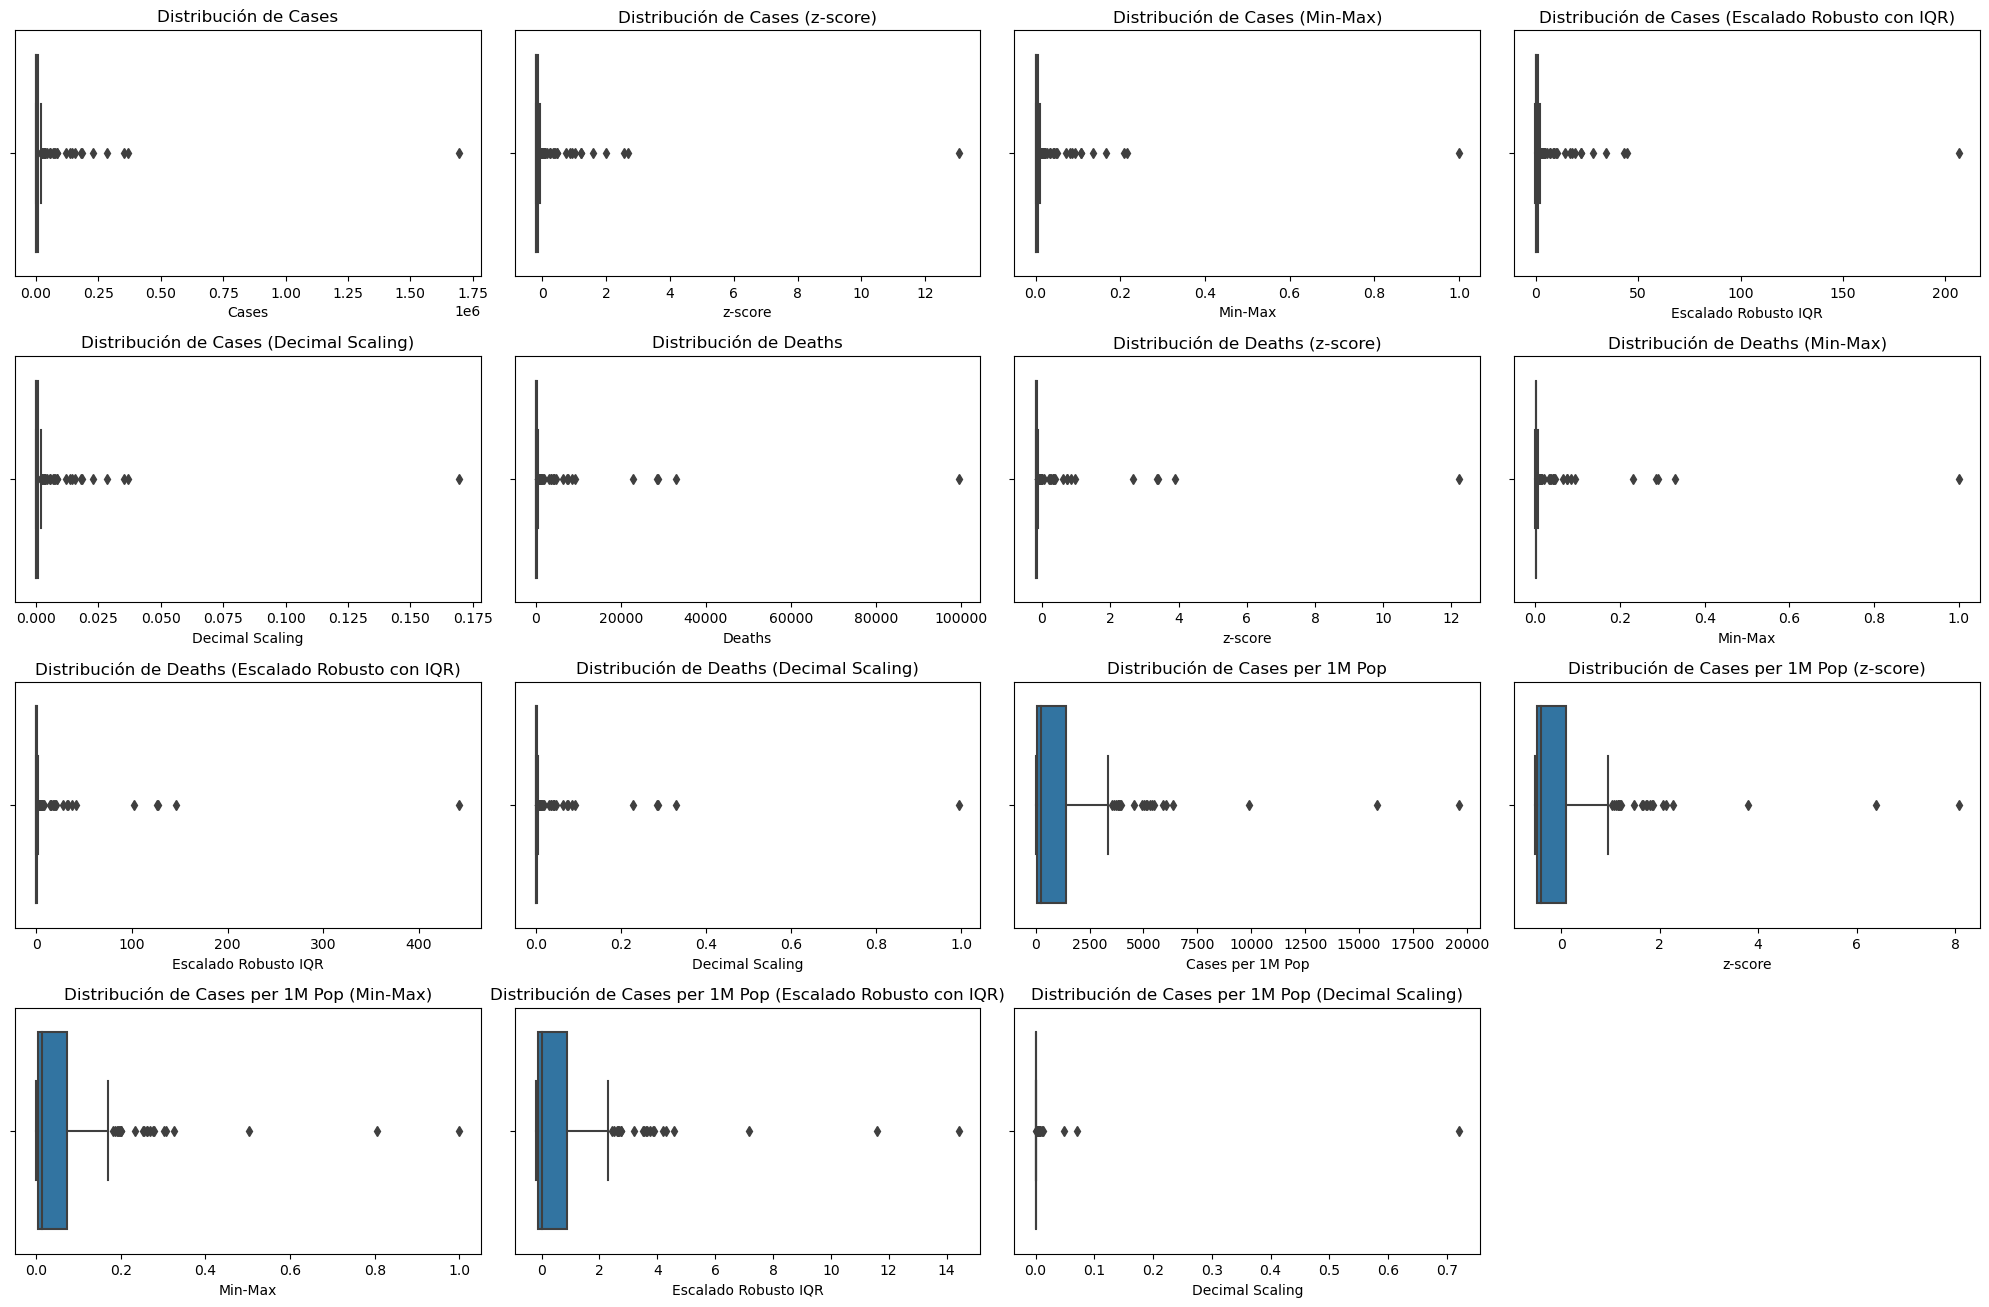

In [73]:
plt.figure(figsize=(20, 16))

# Boxplot para la variable original 'cases'

plt.subplot(5, 4, 1)

sns.boxplot(x=covid_db['cases'])

plt.title('Distribución de Cases')

plt.xlabel('Cases')

# Boxplot para z-score de 'cases'

plt.subplot(5, 4, 2)

sns.boxplot(x=covid_db1['cases_zscore'])

plt.title('Distribución de Cases (z-score)')

plt.xlabel('z-score')

# Boxplot para min-max de 'cases'

plt.subplot(5, 4, 3)

sns.boxplot(x=covid_db2['cases_minmax'])

plt.title('Distribución de Cases (Min-Max)')

plt.xlabel('Min-Max')

# Boxplot para escalado robusto de 'cases'

plt.subplot(5, 4, 4)

sns.boxplot(x=covid_db3['cases_robust_iqr'])

plt.title('Distribución de Cases (Escalado Robusto con IQR)')

plt.xlabel('Escalado Robusto IQR')

# Boxplot para decimal scaling de 'cases'

plt.subplot(5, 4, 5)

sns.boxplot(x=covid_db4['cases_decimal_scaling'])

plt.title('Distribución de Cases (Decimal Scaling)')

plt.xlabel('Decimal Scaling')

# Repetir el proceso para 'deaths'

plt.subplot(5, 4, 6)

sns.boxplot(x=covid_db['deaths'])

plt.title('Distribución de Deaths')

plt.xlabel('Deaths')

plt.subplot(5, 4, 7)

sns.boxplot(x=covid_db1['deaths_zscore'])

plt.title('Distribución de Deaths (z-score)')

plt.xlabel('z-score')

plt.subplot(5, 4, 8)

sns.boxplot(x=covid_db2['deaths_minmax'])

plt.title('Distribución de Deaths (Min-Max)')

plt.xlabel('Min-Max')

plt.subplot(5, 4, 9)

sns.boxplot(x=covid_db3['deaths_robust_iqr'])

plt.title('Distribución de Deaths (Escalado Robusto con IQR)')

plt.xlabel('Escalado Robusto IQR')

plt.subplot(5, 4, 10)

sns.boxplot(x=covid_db4['deaths_decimal_scaling'])

plt.title('Distribución de Deaths (Decimal Scaling)')

plt.xlabel('Decimal Scaling')

# Repetir el proceso para 'cases_1Mpop'

plt.subplot(5, 4, 11)

sns.boxplot(x=covid_db['cases_1Mpop'])

plt.title('Distribución de Cases per 1M Pop')

plt.xlabel('Cases per 1M Pop')

plt.subplot(5, 4, 12)

sns.boxplot(x=covid_db1['cases_1Mpop_zscore'])

plt.title('Distribución de Cases per 1M Pop (z-score)')

plt.xlabel('z-score')

plt.subplot(5, 4, 13)

sns.boxplot(x=covid_db2['cases_1Mpop_minmax'])

plt.title('Distribución de Cases per 1M Pop (Min-Max)')

plt.xlabel('Min-Max')

plt.subplot(5, 4, 14)

sns.boxplot(x=covid_db3['cases_1Mpop_robust_iqr'])

plt.title('Distribución de Cases per 1M Pop (Escalado Robusto con IQR)')

plt.xlabel('Escalado Robusto IQR')

plt.subplot(5, 4, 15)

sns.boxplot(x=covid_db4['deaths_1Mpop_decimal_scaling'])

plt.title('Distribución de Cases per 1M Pop (Decimal Scaling)')

plt.xlabel('Decimal Scaling')

# Ajustar el layout

plt.tight_layout()


En todos los gráficos, se observa una clara asimetría positiva, con una concentración de datos en el primer cuartil y la mediana cercana al límite inferior del rango. Los valores atípicos son prominentes en cada método, reflejando la presencia de datos extremos que persisten a pesar de la normalización.

**z-score**: Los outliers se destacan claramente, alejados de la mediana en varias desviaciones estándar, lo que evidencia la concentración de la mayoría de los datos cerca de la media.

**Min-Max Scaling**: Aunque los datos se ajustan al rango 0-1, la distribución subyacente sigue mostrando la misma concentración en los valores bajos y la presencia de outliers.

**Escalado Robusto con IQR**: Este método reduce el impacto de los outliers, pero estos siguen siendo visibles, lo que sugiere que el método es eficaz pero no elimina la naturaleza dispersa de los datos.

**Decimal Scaling**: Mantiene la estructura general de la distribución, ajustando la escala pero sin alterar la dispersión y la presencia de valores extremos.

La normalización, aunque útil para ajustar escalas, no cambia la naturaleza asimétrica ni reduce significativamente los valores atípicos en estas distribuciones. Esto subraya la importancia de considerar métodos adicionales para manejar la dispersión y los valores extremos en análisis subsecuentes.

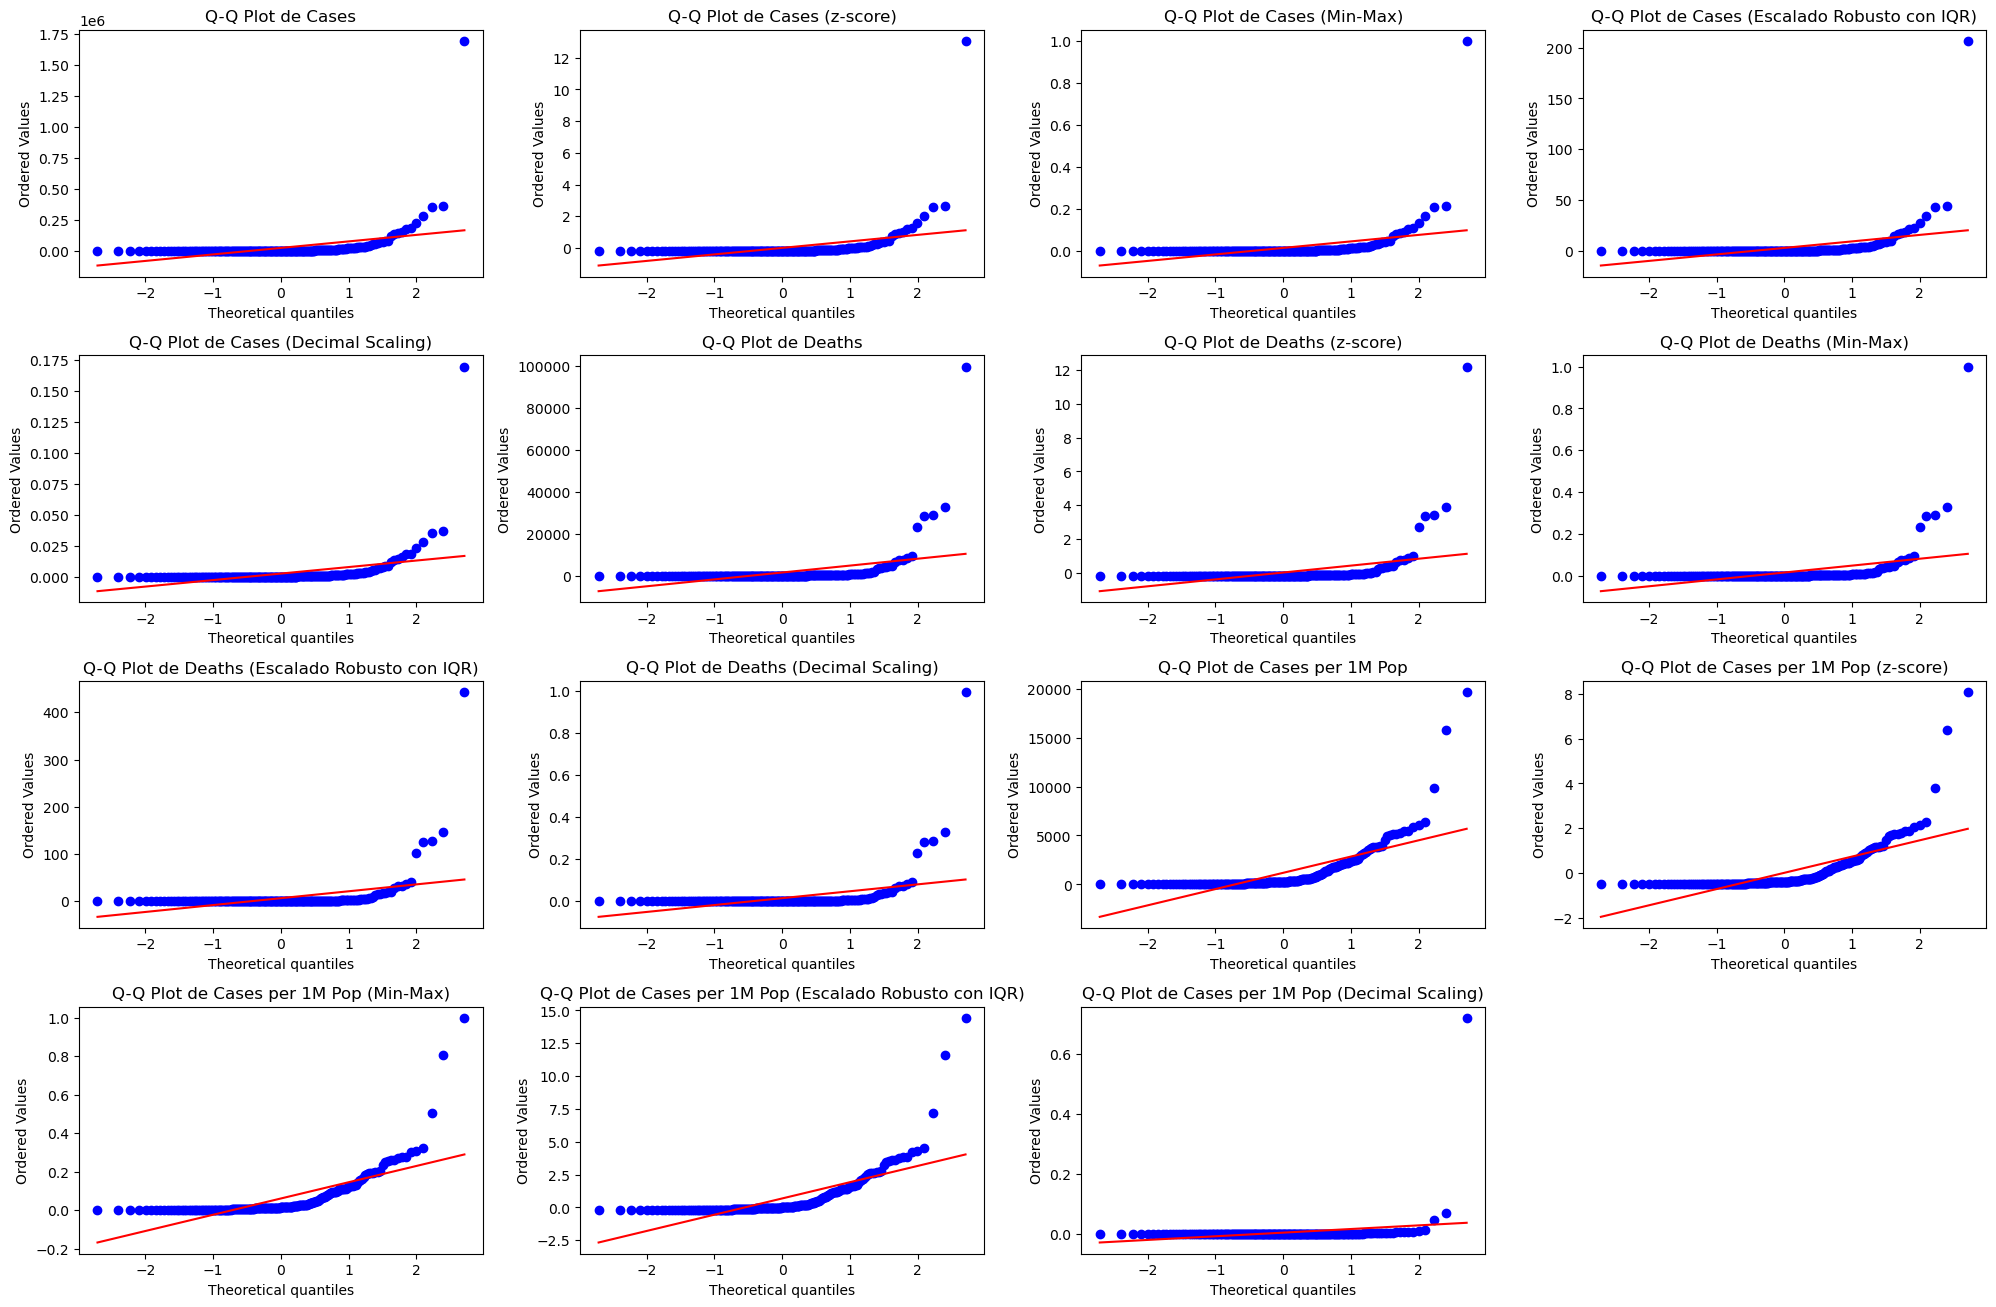

In [74]:
plt.figure(figsize=(20, 16))

# Q-Q plot para la variable original 'cases'

plt.subplot(5, 4, 1)

stats.probplot(covid_db['cases'], dist="norm", plot=plt)

plt.title('Q-Q Plot de Cases')

# Q-Q plot para z-score de 'cases'

plt.subplot(5, 4, 2)

stats.probplot(covid_db1['cases_zscore'], dist="norm", plot=plt)

plt.title('Q-Q Plot de Cases (z-score)')

# Q-Q plot para min-max de 'cases'

plt.subplot(5, 4, 3)

stats.probplot(covid_db2['cases_minmax'], dist="norm", plot=plt)

plt.title('Q-Q Plot de Cases (Min-Max)')

# Q-Q plot para escalado robusto de 'cases'

plt.subplot(5, 4, 4)

stats.probplot(covid_db3['cases_robust_iqr'], dist="norm", plot=plt)

plt.title('Q-Q Plot de Cases (Escalado Robusto con IQR)')

# Q-Q plot para decimal scaling de 'cases'

plt.subplot(5, 4, 5)

stats.probplot(covid_db4['cases_decimal_scaling'], dist="norm", plot=plt)

plt.title('Q-Q Plot de Cases (Decimal Scaling)')

# Repetir el proceso para 'deaths'

plt.subplot(5, 4, 6)

stats.probplot(covid_db['deaths'], dist="norm", plot=plt)

plt.title('Q-Q Plot de Deaths')

plt.subplot(5, 4, 7)

stats.probplot(covid_db1['deaths_zscore'], dist="norm", plot=plt)

plt.title('Q-Q Plot de Deaths (z-score)')

plt.subplot(5, 4, 8)

stats.probplot(covid_db2['deaths_minmax'], dist="norm", plot=plt)

plt.title('Q-Q Plot de Deaths (Min-Max)')

plt.subplot(5, 4, 9)

stats.probplot(covid_db3['deaths_robust_iqr'], dist="norm", plot=plt)

plt.title('Q-Q Plot de Deaths (Escalado Robusto con IQR)')

plt.subplot(5, 4, 10)

stats.probplot(covid_db4['deaths_decimal_scaling'], dist="norm", plot=plt)

plt.title('Q-Q Plot de Deaths (Decimal Scaling)')

# Repetir el proceso para 'cases_1Mpop'

plt.subplot(5, 4, 11)

stats.probplot(covid_db['cases_1Mpop'], dist="norm", plot=plt)

plt.title('Q-Q Plot de Cases per 1M Pop')

plt.subplot(5, 4, 12)

stats.probplot(covid_db1['cases_1Mpop_zscore'], dist="norm", plot=plt)

plt.title('Q-Q Plot de Cases per 1M Pop (z-score)')

plt.subplot(5, 4, 13)

stats.probplot(covid_db2['cases_1Mpop_minmax'], dist="norm", plot=plt)

plt.title('Q-Q Plot de Cases per 1M Pop (Min-Max)')

plt.subplot(5, 4, 14)

stats.probplot(covid_db3['cases_1Mpop_robust_iqr'], dist="norm", plot=plt)

plt.title('Q-Q Plot de Cases per 1M Pop (Escalado Robusto con IQR)')

plt.subplot(5, 4, 15)

stats.probplot(covid_db4['deaths_1Mpop_decimal_scaling'], dist="norm", plot=plt)

plt.title('Q-Q Plot de Cases per 1M Pop (Decimal Scaling)')

plt.tight_layout()


Los gráficos Q-Q presentados comparan los cuantiles teóricos de una distribución normal con los valores ordenados de las variables tras aplicar distintos métodos de normalización. En todos los casos, los puntos se desvían de la línea de referencia, especialmente en las colas, lo que indica que los datos no siguen una distribución normal.

**z-score**: Los puntos se alinean moderadamente en el centro, pero se desvían considerablemente en los extremos, evidenciando la presencia de outliers.

**Min-Max Scaling**: Aunque la centralización es adecuada, las colas muestran una clara desviación, reflejando que la normalización no corrige la asimetría ni los valores extremos.

**Escalado Robusto con IQR**: Este método reduce el impacto de los outliers, pero la desviación en las colas persiste, confirmando una distribución no normal.

**Decimal Scaling**: Los resultados son similares a los anteriores, con una alineación central aceptable, pero una marcada desviación en los extremos.

**Cases per 1M Pop**: Esta variable muestra una mayor dispersión y valores atípicos más pronunciados, incluso después de la normalización.

Los gráficos Q-Q confirman que, pese a la normalización, las variables no siguen una distribución normal y presentan outliers significativos. Esto sugiere la necesidad de aplicar técnicas adicionales para manejar adecuadamente la asimetría y los valores extremos en el análisis posterior.

**c. Aplicar los métodos de discretización vistos en clase. Documente ventajas y desventajas de cada método.**

Se realizan copias de la base de datos para aplicar distintos métodos y preservar la integridad de la base original.

In [75]:
# Se generan copias de la base de datos para aplicar los diferentes metodos.

covid_db5 = covid_db.copy()

covid_db6 = covid_db.copy()

covid_db7 = covid_db.copy()

covid_db8 = covid_db.copy()

covid_db9 = covid_db.copy()

**Discretización de igual ancho**

La discretización de igual ancho es un método que divide el rango de cada variable en intervalos de la misma longitud. Este enfoque es particularmente útil para transformar variables continuas en categorías discretas, facilitando así el análisis y la interpretación de los datos. Al aplicar esta técnica, cada intervalo representa un rango específico de valores, permitiendo agrupar los datos de manera uniforme. Esta uniformidad asegura que el análisis sea más estructurado y que las comparaciones entre categorías sean claras y directas. Además, la discretización de igual ancho puede ayudar a mitigar el impacto de los valores atípicos al distribuir los datos en segmentos predeterminados, lo que resulta en una visualización y un modelado estadístico más efectivos.

In [76]:
# Discretización de igual ancho (intervalos) para cada variable

interval_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

covid_db5['disc_cases_interval'] = interval_discretizer.fit_transform(covid_db5[['cases']])

covid_db5['disc_deaths_interval'] = interval_discretizer.fit_transform(covid_db5[['deaths']])

covid_db5['disc_cases_1Mpop_interval'] = interval_discretizer.fit_transform(covid_db5[['cases_1Mpop']])

covid_db5['disc_deaths_1Mpop_interval'] = interval_discretizer.fit_transform(covid_db5[['deaths_1Mpop']])


**Ventajas**

**Simplicidad**: Es un método fácil de entender y aplicar, lo que facilita su uso en diversos contextos de análisis de datos.

**Uniformidad en los intervalos**: Al dividir el rango de los datos en intervalos de igual tamaño, asegura una uniformidad que puede simplificar el análisis y la visualización de los datos.}

**Estabilidad frente a valores atípicos**: La estructura fija de los intervalos puede ayudar a reducir la influencia de valores extremos en el análisis, ya que estos se agrupan en los intervalos de los extremos junto con otros valores.

**Desventajas**

**Sensibilidad a los rangos de los datos**: Este método puede resultar ineficaz si los datos no están uniformemente distribuidos. Los intervalos pueden terminar conteniendo muy pocos datos o agrupando de manera inapropiada datos que no deberían estar juntos.

**Pérdida de información**: Al categorizar datos continuos en intervalos discretos, existe una inevitable pérdida de información detallada sobre las diferencias precisas entre valores cercanos.

**Dependencia del ancho del intervalo**: Elegir el tamaño adecuado del intervalo puede ser desafiante y tiene un impacto significativo en los resultados del análisis. Un intervalo demasiado amplio puede ocultar tendencias importantes, mientras que uno demasiado estrecho puede resultar en un exceso de categorías con pocos datos cada una.


**Discretización de igual frecuencia**

La discretización de igual frecuencia divide el rango de cada variable en intervalos que contienen un número similar de observaciones. Este método es efectivo para tratar con datos sesgados, asegurando una distribución equitativa de las observaciones a través de los intervalos y minimizando sesgos en análisis y modelos predictivos. Al implementar esta técnica, es fundamental elegir adecuadamente el número de intervalos para equilibrar precisión y generalización en el análisis de los datos.

In [77]:
# Discretización de igual frecuencia para cada variable

frequency_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

covid_db6['disc_cases_frequency'] = frequency_discretizer.fit_transform(covid_db6[['cases']])

covid_db6['disc_deaths_frequency'] = frequency_discretizer.fit_transform(covid_db6[['deaths']])

covid_db6['disc_cases_1Mpop_frequency'] = frequency_discretizer.fit_transform(covid_db6[['cases_1Mpop']])

covid_db6['disc_deaths_1Mpop_frequency'] = frequency_discretizer.fit_transform(covid_db6[['deaths_1Mpop']])

**Ventajas**

**Reducción de sesgos**: Al asegurar que cada intervalo contenga un número similar de observaciones, este método ayuda a mitigar los sesgos en los datos, especialmente en distribuciones asimétricas o sesgadas.

**Mejora en la representatividad**: Cada intervalo refleja una parte proporcional de la muestra total, lo que puede mejorar la representatividad estadística de los análisis y modelos derivados.

**Facilidad de uso en modelos estadísticos**: Los datos discretizados pueden ser más fáciles de manejar en ciertos modelos estadísticos y de machine learning que prefieren o requieren datos categóricos.

**Desventajas**

**Pérdida de información**: Al agrupar valores continuos en categorías, se pierde información sobre las diferencias específicas entre observaciones dentro del mismo intervalo.

**Sensibilidad a outliers**: Los valores extremos pueden distorsionar la distribución de los intervalos, especialmente si no son tratados previamente, llevando a intervalos desiguales en términos de sus rangos de valores reales.

**Dependencia del número de intervalos**: Elegir el número correcto de intervalos es crucial y puede ser desafiante. Un número incorrecto de intervalos puede resultar en una sobre-simplificación o una excesiva granularidad de los datos, afectando negativamente la utilidad del método.

**Discretización por k-means**

La discretización utilizando el método de k-means divide el rango de valores de cada variable en grupos basados en su similitud, empleando el algoritmo de k-means para determinar los centroides que definen los intervalos. Este enfoque es efectivo para revelar agrupaciones naturales y significativas en los datos, especialmente en distribuciones complejas y no lineales. La adaptabilidad y la robustez de este método lo hacen ideal para categorizar datos continuos de manera que reflejen estructuras intrínsecas para análisis más detallados.

In [78]:
# Discretización por k-means para cada variable

kmeans_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

covid_db7['disc_cases_kmeans'] = kmeans_discretizer.fit_transform(covid_db7[['cases']])

covid_db7['disc_deaths_kmeans'] = kmeans_discretizer.fit_transform(covid_db7[['deaths']])

covid_db7['disc_cases_1Mpop_kmeans'] = kmeans_discretizer.fit_transform(covid_db7[['cases_1Mpop']])

covid_db7['disc_deaths_1Mpop_kmeans'] = kmeans_discretizer.fit_transform(covid_db7[['deaths_1Mpop']])

**Ventajas**

**Agrupaciones naturales**: k-means es eficaz para identificar agrupaciones naturales y patrones ocultos en los datos, lo que puede ser invaluable para entender estructuras complejas dentro de las variables.

**Adaptabilidad**: Este método se ajusta automáticamente a la estructura de los datos, lo que permite una segmentación más precisa y adaptada a las peculiaridades de cada conjunto de datos.

**Optimización de clusters**: Los centroides definidos por k-means optimizan la varianza dentro de cada grupo, lo que resulta en una categorización más coherente y representativa.

**Desventajas**

**Sensibilidad a los valores iniciales**: k-means puede ser sensible a la selección inicial de centroides, lo que puede llevar a resultados inconsistentes si el método de inicialización no es adecuado.

**Dificultad con clusters no esféricos**: El algoritmo tiende a funcionar mejor con clusters de forma esférica; por lo tanto, puede no ser tan efectivo con clusters de formas irregulares o alargadas.

**Número de clusters**: Determinar el número adecuado de clusters (k) puede ser un desafío y requiere métodos como el método del codo o validación cruzada, lo que añade complejidad al proceso de discretización.

**Discretización por función matemática (log10)**

La discretización utilizando la función logarítmica base diez (log10) transforma variables continuas en una escala logarítmica, lo que ayuda a suavizar la dispersión de datos altamente variables y a minimizar el impacto de valores extremos. Este método convierte los datos a una escala que facilita la detección de patrones y la interpretación estadística, especialmente útil en datos con variaciones amplias o que siguen una distribución exponencial. La aplicación de log10 es efectiva para analizar órdenes de magnitud y mejorar la comparabilidad entre observaciones.

In [79]:
# Discretización por función matemática (log10) para cada variable

covid_db8['disc_cases_log10'] = np.floor(np.log10(covid_db8['cases']))

covid_db8['disc_deaths_log10'] = np.floor(np.log10(covid_db8['deaths']))

covid_db8['disc_cases_1Mpop_log10'] = np.floor(np.log10(covid_db8['cases_1Mpop']))

covid_db8['disc_deaths_1Mpop_log10'] = np.floor(np.log10(covid_db8['deaths_1Mpop']))

**Ventajas**

**Reducción de asimetría**: Transforma datos con distribuciones asimétricas, haciéndolos más simétricos y facilitando su análisis estadístico.

**Atenuación de valores extremos**: Los valores extremadamente altos se reducen más significativamente que los bajos, lo que disminuye su influencia en el análisis general y evita que dominen el modelo.

**Mejora de la interpretación**: Al aplicar log10, las diferencias en las escalas de datos se vuelven más interpretables, especialmente útil en datos financieros, científicos o cualquier campo donde las órdenes de magnitud son importantes.

**Desventajas**

**Datos cero o negativos**: La función log10 no puede aplicarse directamente a valores negativos o cero sin un ajuste previo, lo que puede complicar su uso en datos que incluyen estos valores.

**Sobre simplificación**: Al transformar los datos a una escala logarítmica, se puede perder información sobre las relaciones lineales originales entre variables y observaciones.

**Elección arbitraria**: El uso de log10 puede ser arbitrario y no siempre es claro cuándo su aplicación mejorará significativamente el análisis, lo que puede llevar a decisiones subjetivas sobre su uso.

A continuación, graficamos los resultados de la discretización para cada una de las variables.

Para la variable case de la base de datos de coronavirus, presentamos los siguientes análisis y resultados de la discretización.

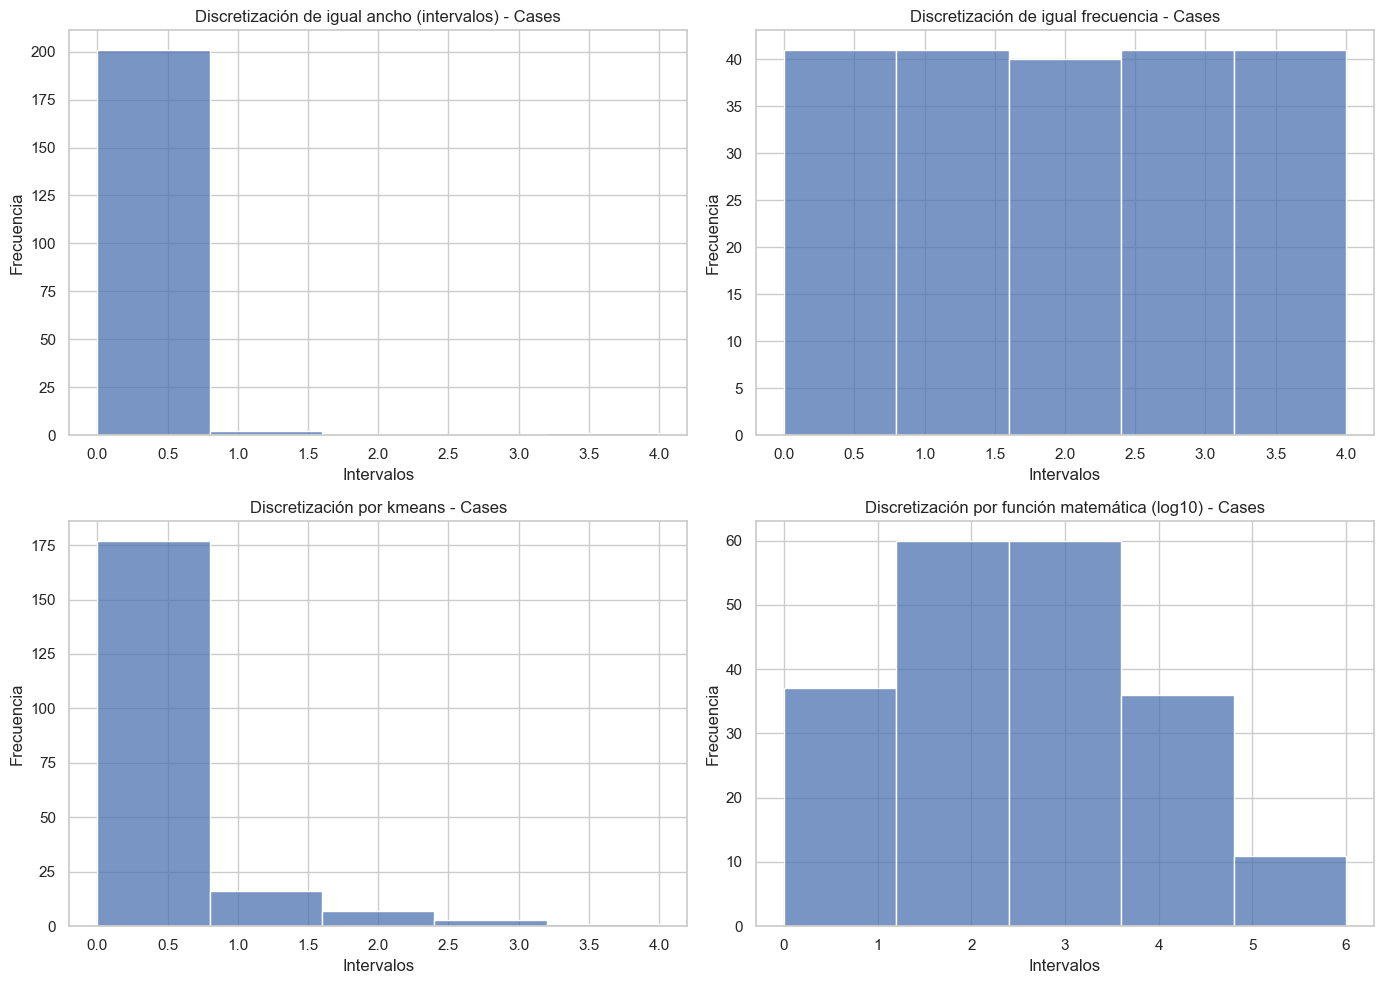

In [80]:
# Configuración de estilo para los gráficos

sns.set(style="whitegrid")

# Crear una figura con subplots

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histograma para la discretización de igual ancho (intervalos)

sns.histplot(covid_db5['disc_cases_interval'], bins=5, ax=axs[0, 0], kde=False)

axs[0, 0].set_title('Discretización de igual ancho (intervalos) - Cases')

axs[0, 0].set_xlabel('Intervalos')

axs[0, 0].set_ylabel('Frecuencia')

# Histograma para la discretización de igual frecuencia

sns.histplot(covid_db6['disc_cases_frequency'], bins=5, ax=axs[0, 1], kde=False)

axs[0, 1].set_title('Discretización de igual frecuencia - Cases')

axs[0, 1].set_xlabel('Intervalos')

axs[0, 1].set_ylabel('Frecuencia')

# Histograma para la discretización por Kmens

sns.histplot(covid_db7['disc_cases_kmeans'], bins=5, ax=axs[1, 0], kde=False)

axs[1, 0].set_title('Discretización por kmeans - Cases')

axs[1, 0].set_xlabel('Intervalos')

axs[1, 0].set_ylabel('Frecuencia')



# Histograma para la discretización por función matemática (log10)

sns.histplot(covid_db8['disc_cases_log10'], bins=5, ax=axs[1, 1], kde=False)

axs[1, 1].set_title('Discretización por función matemática (log10) - Cases')

axs[1, 1].set_xlabel('Intervalos')

axs[1, 1].set_ylabel('Frecuencia')

# Ajustar el layout

plt.tight_layout()

# Mostrar la gráfica

plt.show()

**Discretización de igual ancho**: Muestra una gran concentración de valores en el primer intervalo, lo que indica una alta frecuencia de casos bajos, con una caída rápida en los intervalos siguientes.

**Discretización de igual frecuencia**: Distribuye los datos en intervalos que contienen una cantidad similar de casos. Esto resulta en intervalos de diferentes tamaños, pero con frecuencias uniformes, ofreciendo una visión equilibrada de la distribución.

**Discretización por k-means**: Agrupa los datos utilizando k-means, optimizando la variabilidad dentro de los intervalos. Al igual que la discretización de igual ancho, muestra una fuerte concentración en el primer intervalo, pero con una leve dispersión en los intervalos siguientes.

**Discretización logarítmica (log10)**: Aplica una transformación logarítmica para manejar mejor las distribuciones sesgadas, revelando una disminución más gradual de la frecuencia a medida que aumentan los valores, y una mayor diversidad en los intervalos.

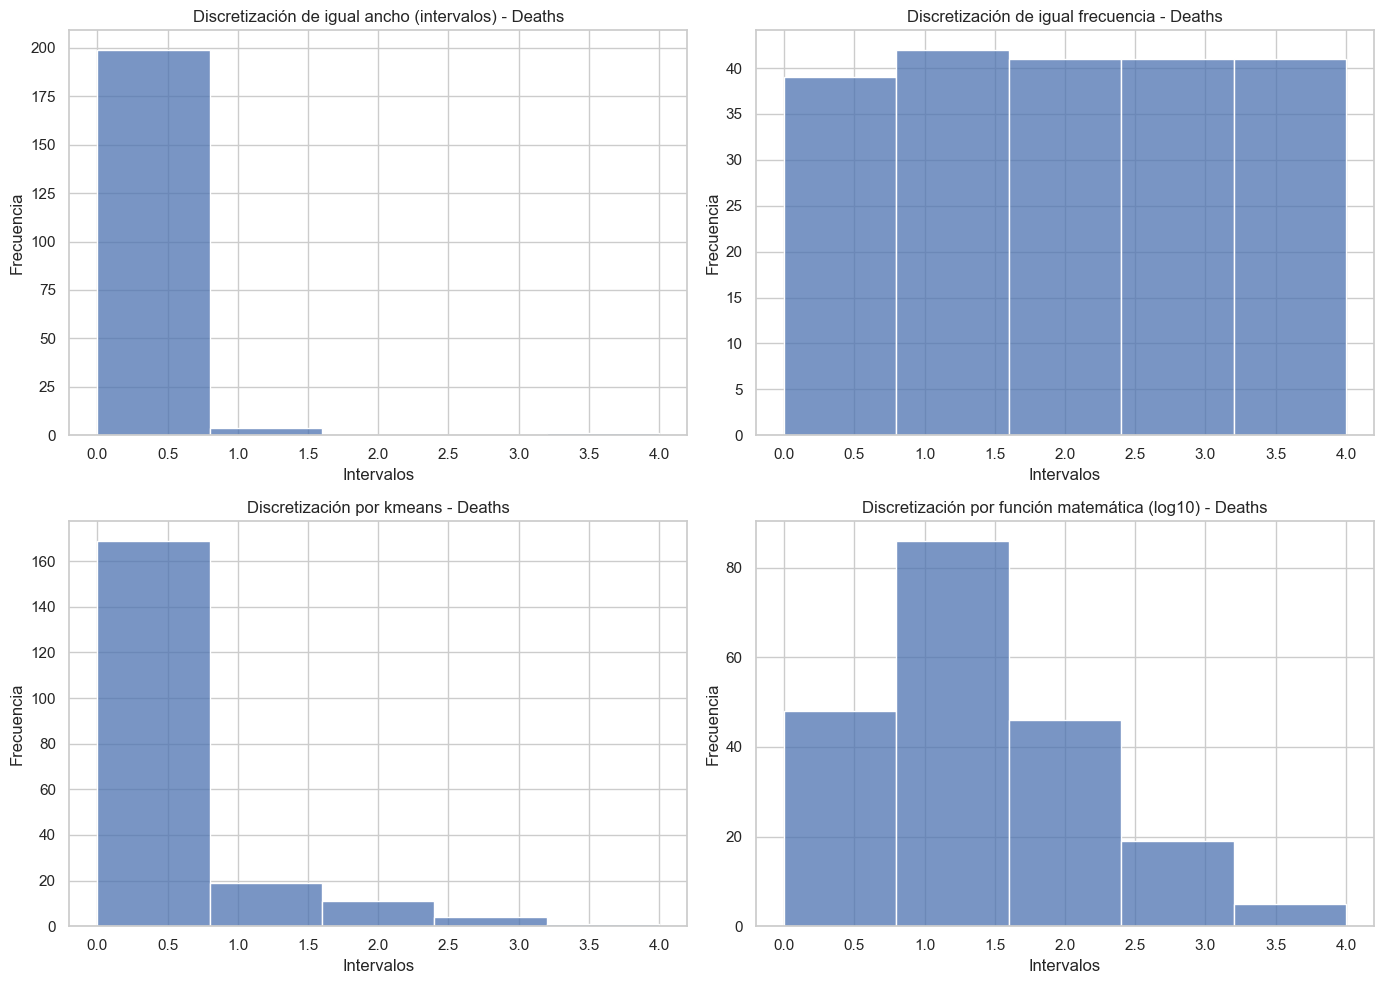

In [81]:
# Configuración de estilo para los gráficos

sns.set(style="whitegrid")

# Crear una figura con subplots

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histograma para la discretización de igual ancho (intervalos)

sns.histplot(covid_db5['disc_deaths_interval'], bins=5, ax=axs[0, 0], kde=False)

axs[0, 0].set_title('Discretización de igual ancho (intervalos) - Deaths')

axs[0, 0].set_xlabel('Intervalos')

axs[0, 0].set_ylabel('Frecuencia')

# Histograma para la discretización de igual frecuencia

sns.histplot(covid_db6['disc_deaths_frequency'], bins=5, ax=axs[0, 1], kde=False)

axs[0, 1].set_title('Discretización de igual frecuencia - Deaths')

axs[0, 1].set_xlabel('Intervalos')

axs[0, 1].set_ylabel('Frecuencia')

# Histograma para la discretización por kmens

sns.histplot(covid_db7['disc_deaths_kmeans'], bins=5, ax=axs[1, 0], kde=False)

axs[1, 0].set_title('Discretización por kmeans - Deaths')

axs[1, 0].set_xlabel('Intervalos')

axs[1, 0].set_ylabel('Frecuencia')



# Histograma para la discretización por función matemática (log10)

sns.histplot(covid_db8['disc_deaths_log10'], bins=5, ax=axs[1, 1], kde=False)

axs[1, 1].set_title('Discretización por función matemática (log10) - Deaths')

axs[1, 1].set_xlabel('Intervalos')

axs[1, 1].set_ylabel('Frecuencia')

# Ajustar el layout

plt.tight_layout()

# Mostrar la gráfica

plt.show()

**Discretización de igual ancho (intervalos)**: Este método divide el rango de valores de deaths en intervalos de igual tamaño. El gráfico muestra que la mayoría de los casos se concentran en el primer intervalo (0.0-0.5), indicando una alta frecuencia de valores bajos.

**Discretización de igual frecuencia**: Aquí, los valores se dividen de manera que cada intervalo contenga aproximadamente la misma cantidad de observaciones. Se observa que los intervalos son de diferente ancho, pero intentan mantener una frecuencia uniforme.

**Discretización por k-means**: Utiliza el algoritmo k-means para agrupar los datos en intervalos que minimicen la varianza dentro de cada grupo. El resultado muestra una concentración predominante de casos en el intervalo más bajo, con una caída significativa a medida que los intervalos aumentan.

**Discretización por función matemática (log10)**: Aplica la función logarítmica base 10 antes de agrupar los datos, lo que puede ser útil para manejar datos con distribución exponencial o muy sesgada. En este caso, el histograma refleja una disminución gradual de la frecuencia a medida que aumenta el valor logarítmico.

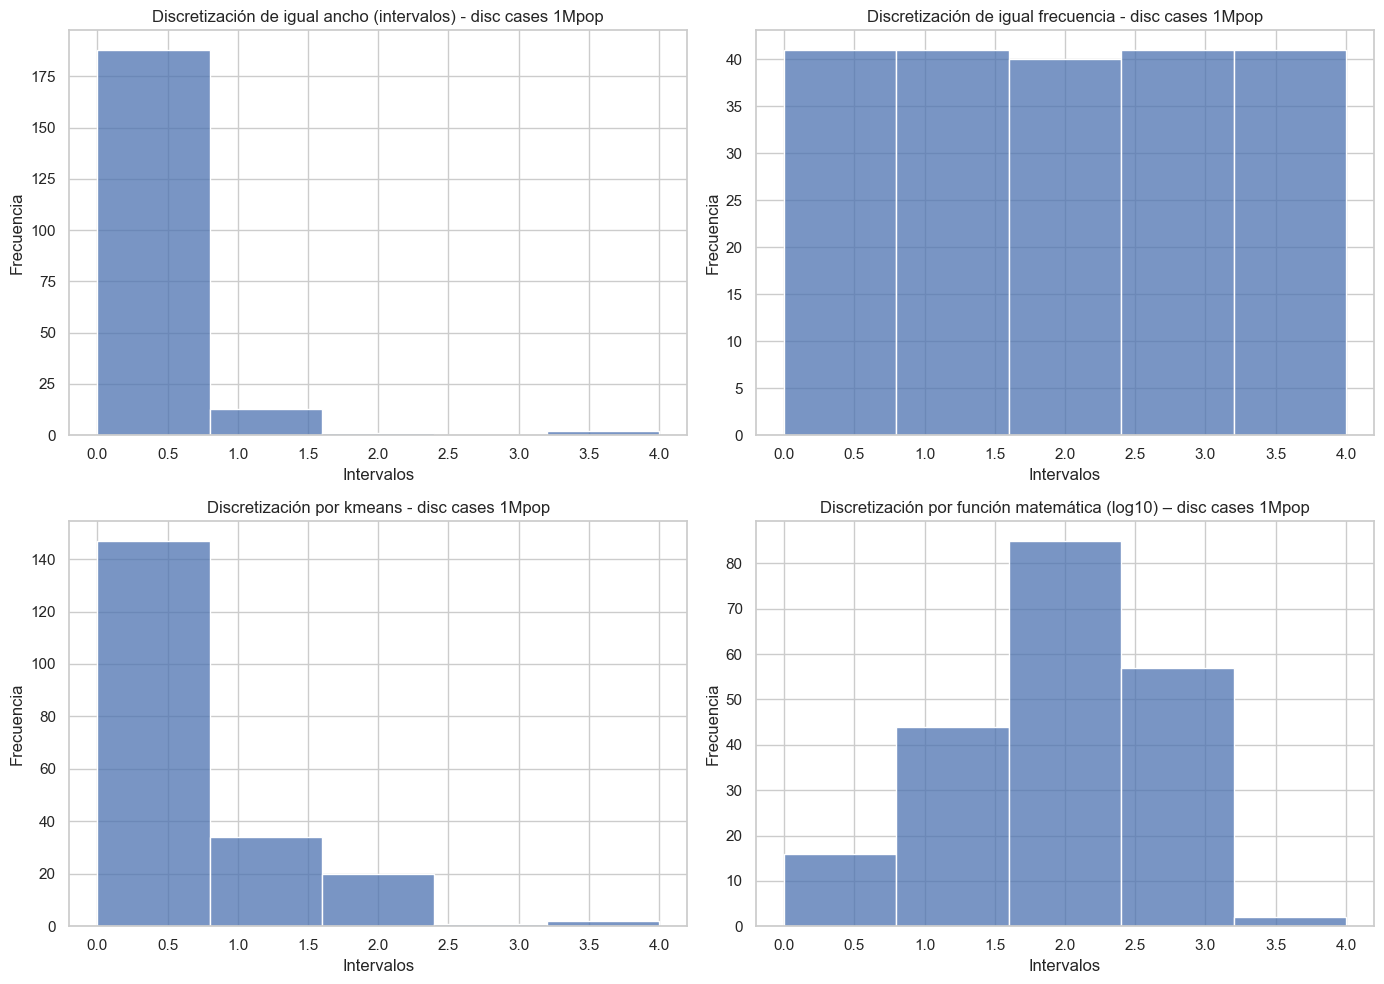

In [82]:
# Configuración de estilo para los gráficos

sns.set(style="whitegrid")

# Crear una figura con subplots

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histograma para la discretización de igual ancho (intervalos)

sns.histplot(covid_db5['disc_cases_1Mpop_interval'], bins=5, ax=axs[0, 0], kde=False)

axs[0, 0].set_title('Discretización de igual ancho (intervalos) - disc cases 1Mpop')

axs[0, 0].set_xlabel('Intervalos')

axs[0, 0].set_ylabel('Frecuencia')

# Histograma para la discretización de igual frecuencia

sns.histplot(covid_db6['disc_cases_1Mpop_frequency'], bins=5, ax=axs[0, 1], kde=False)

axs[0, 1].set_title('Discretización de igual frecuencia - disc cases 1Mpop')

axs[0, 1].set_xlabel('Intervalos')

axs[0, 1].set_ylabel('Frecuencia')

# Histograma para la discretización por kmens

sns.histplot(covid_db7['disc_cases_1Mpop_kmeans'], bins=5, ax=axs[1, 0], kde=False)

axs[1, 0].set_title('Discretización por kmeans - disc cases 1Mpop')

axs[1, 0].set_xlabel('Intervalos')

axs[1, 0].set_ylabel('Frecuencia')



# Histograma para la discretización por función matemática (log10)

sns.histplot(covid_db8['disc_cases_1Mpop_log10'], bins=5, ax=axs[1, 1], kde=False)

axs[1, 1].set_title('Discretización por función matemática (log10) – disc cases 1Mpop')

axs[1, 1].set_xlabel('Intervalos')

axs[1, 1].set_ylabel('Frecuencia')

# Ajustar el layout

plt.tight_layout()

# Mostrar la gráfica

plt.show()


Los gráficos muestran la discretización de la variable "cases 1Mpop" utilizando diferentes métodos. En todos los casos, la mayoría de los datos se concentran en los intervalos más bajos, destacando una alta frecuencia de valores pequeños. La **discretización de igual ancho** y **k-means** reflejan esta concentración de manera similar, mientras que la **discretización de igual frecuencia** distribuye los datos más uniformemente a través de los intervalos. La **discretización logarítmica (log10)**, por su parte, revela una distribución más gradual, lo que sugiere la presencia de algunos valores extremos en la variable original. Estos resultados indican que la variable presenta una alta concentración de casos en valores bajos y una dispersión limitada en los intervalos superiores.

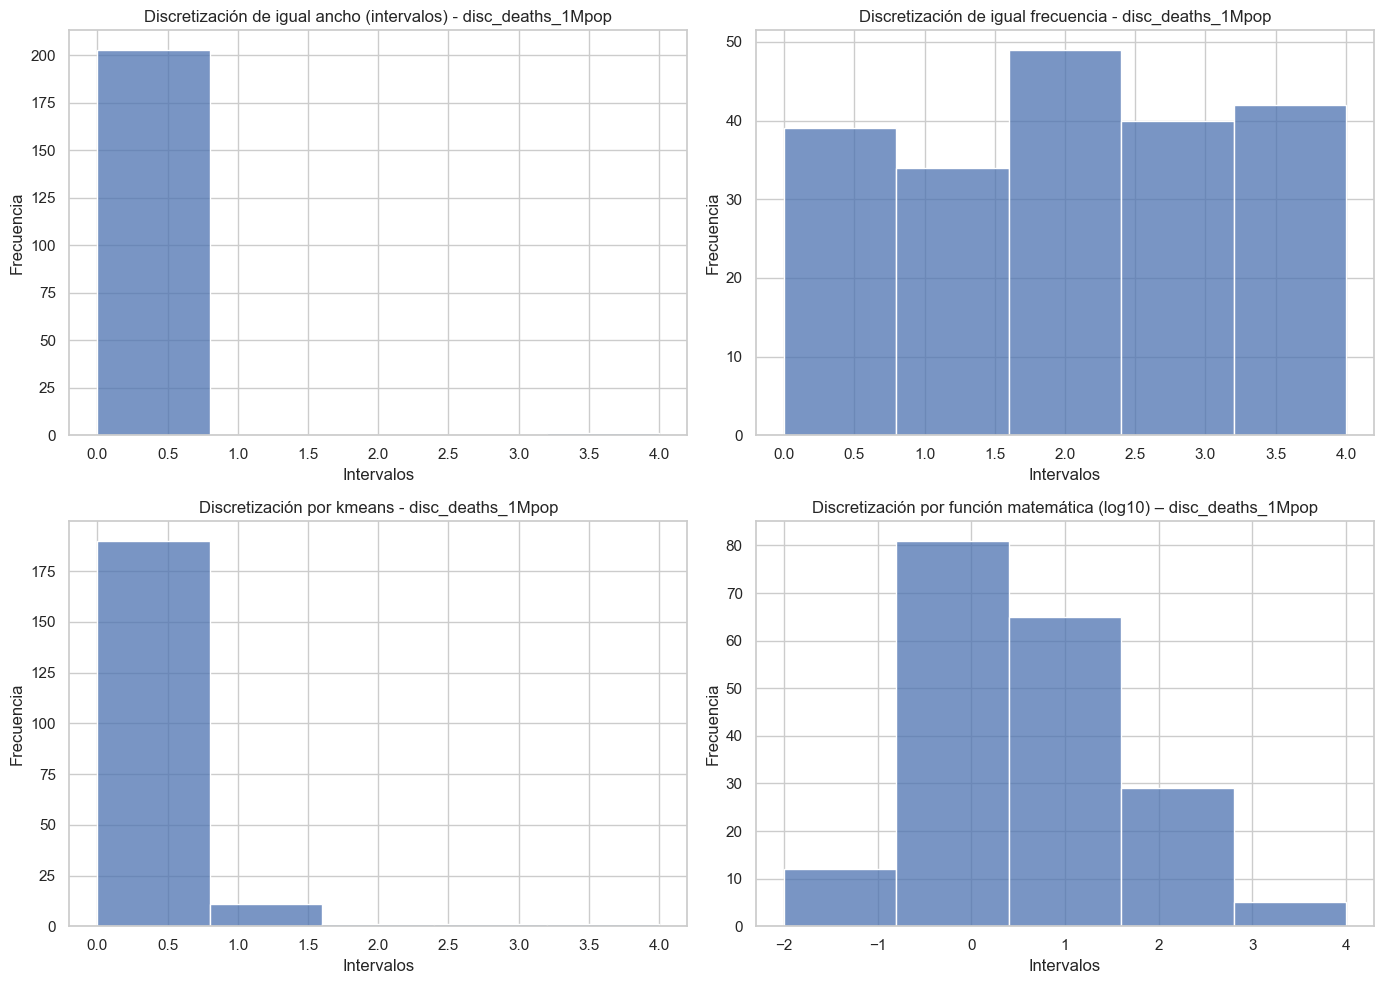

In [83]:
# Configuración de estilo para los gráficos

sns.set(style="whitegrid")

# Crear una figura con subplots

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histograma para la discretización de igual ancho (intervalos)

sns.histplot(covid_db5['disc_deaths_1Mpop_interval'], bins=5, ax=axs[0, 0], kde=False)

axs[0, 0].set_title('Discretización de igual ancho (intervalos) - disc_deaths_1Mpop')

axs[0, 0].set_xlabel('Intervalos')

axs[0, 0].set_ylabel('Frecuencia')

# Histograma para la discretización de igual frecuencia

sns.histplot(covid_db6['disc_deaths_1Mpop_frequency'], bins=5, ax=axs[0, 1], kde=False)

axs[0, 1].set_title('Discretización de igual frecuencia - disc_deaths_1Mpop')

axs[0, 1].set_xlabel('Intervalos')

axs[0, 1].set_ylabel('Frecuencia')

# Histograma para la discretización por kmens

sns.histplot(covid_db7['disc_deaths_1Mpop_kmeans'], bins=5, ax=axs[1, 0], kde=False)

axs[1, 0].set_title('Discretización por kmeans - disc_deaths_1Mpop')

axs[1, 0].set_xlabel('Intervalos')

axs[1, 0].set_ylabel('Frecuencia')



# Histograma para la discretización por función matemática (log10)

sns.histplot(covid_db8['disc_deaths_1Mpop_log10'], bins=5, ax=axs[1, 1], kde=False)

axs[1, 1].set_title('Discretización por función matemática (log10) – disc_deaths_1Mpop')

axs[1, 1].set_xlabel('Intervalos')

axs[1, 1].set_ylabel('Frecuencia')

# Ajustar el layout

plt.tight_layout()

# Mostrar la gráfica

plt.show()


Los gráficos muestran que la variable deaths_1Mpop se concentra principalmente en los intervalos más bajos, especialmente con los métodos de **igual ancho** y **k-means**. El método de **igual frecuencia** distribuye los datos de manera más uniforme, mientras que la **discretización logarítmica (log10)** resalta algunos valores atípicos y muestra una mayor gradación. En general, los datos presentan una fuerte concentración en valores bajos y poca dispersión en los intervalos superiores.

**d. Aplique alguna transformación para reducir el sesgo. Calcule la métrica de sesgo: 3 * (media - mediana) / desvío, antes y después de la transformación. Grafique las distribuciones.**

En el análisis de datos, reducir el sesgo es esencial para mejorar la precisión y fiabilidad de los resultados. El primer paso es realizar una copia de la base de datos original, asegurando la integridad de los datos mientras se implementan las transformaciones necesarias.

In [84]:
covid_db10 = covid_db.copy()

data = pd.DataFrame(covid_db10)

columnas = np.array(data.columns.values)

columnas = list(columnas[[2,3,6,7]])

Graficamos las densidades para visualizar el sesgo en las variables de estudio de nuestra base de datos sobre el coronavirus. Este análisis inicial nos permite identificar la asimetría en las distribuciones antes de aplicar cualquier transformación. Observar estas gráficas es fundamental para comprender la forma de los datos y establecer una línea base que nos guíe en la elección de las transformaciones necesarias para lograr una distribución más equilibrada en etapas posteriores del análisis.

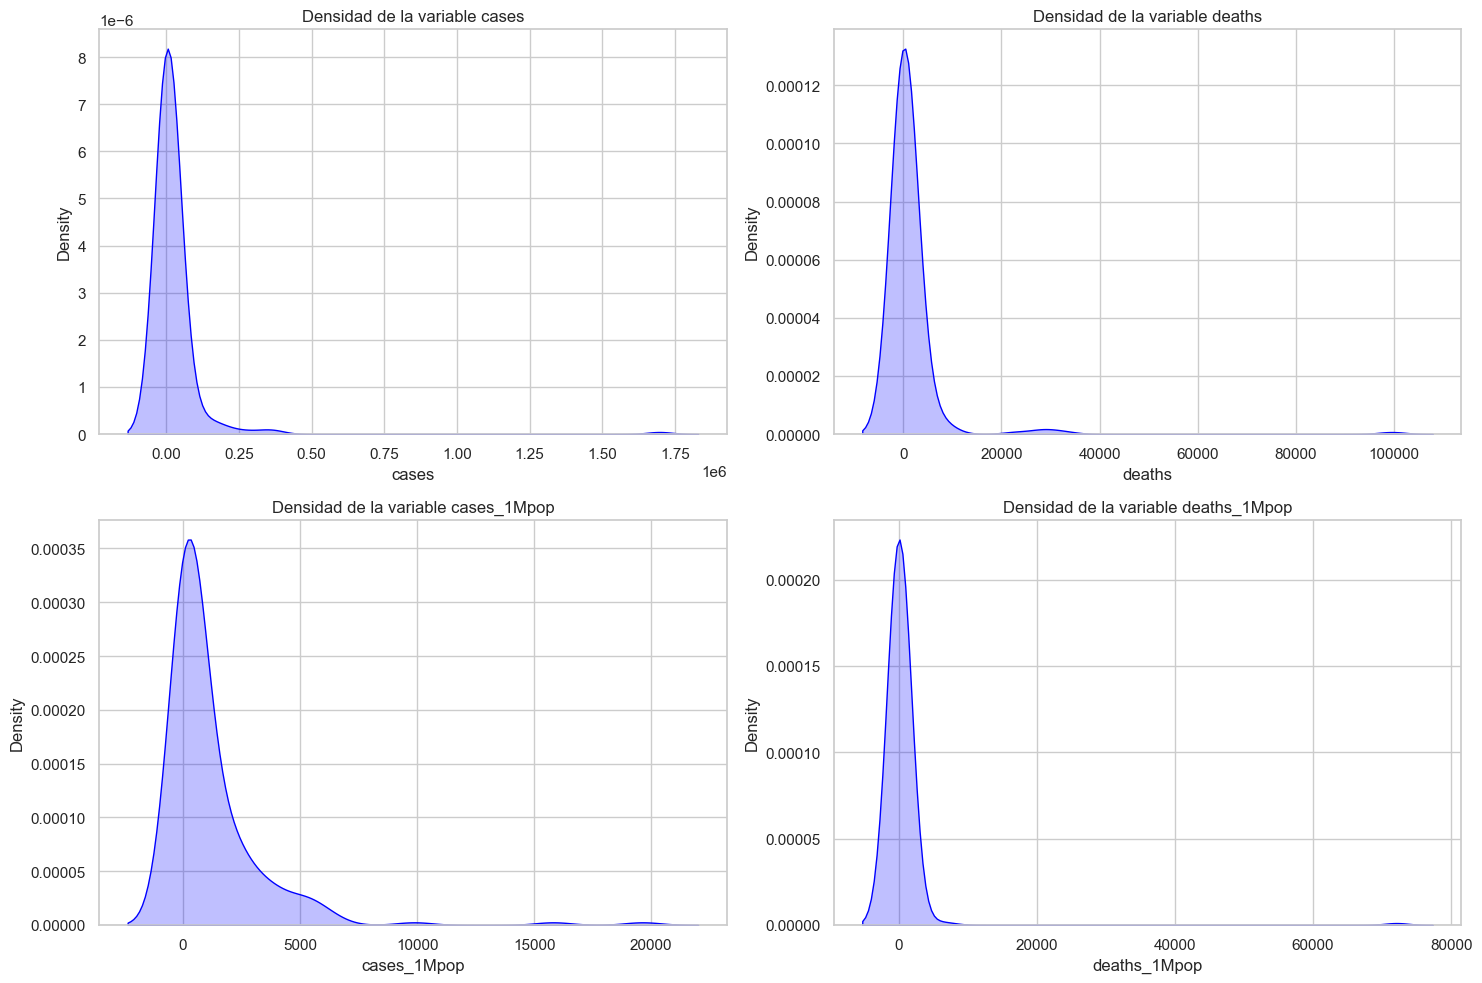

In [85]:
num_rows = 2

num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))  # Ajusta el tamaño de la figura

for i, ax in enumerate(axs.flat):
    if i < len(columnas):  # Asegurarse de no exceder el número de columnas
        sns.kdeplot(data=data, x=columnas[i], ax=ax, fill = True, color='blue')  # Solo curva de densidad
        ax.set_title("Densidad de la variable " + columnas[i])


plt.tight_layout()

plt.show()

Las gráficas de densidad para las variables **cases**, **deaths**, **cases_1Mpop**, y **deaths_1Mpop** evidencian un sesgo significativo hacia la derecha, con una marcada concentración de valores bajos y una cola extendida hacia la derecha. Esto sugiere que la mayoría de los países reportan un número reducido de casos y muertes, mientras que unos pocos presentan cifras considerablemente más altas. Este sesgo es característico en situaciones de distribución desigual, como en una pandemia, donde los valores extremos pueden distorsionar el análisis. Identificar y entender este sesgo es fundamental para aplicar transformaciones que normalicen las distribuciones, permitiendo un análisis más preciso y fiable de los datos.

Para corregir el sesgo en distribuciones de datos, ya sea un sesgo positivo (a la derecha) o un sesgo negativo (a la izquierda), es común aplicar transformaciones matemáticas como la raíz cuadrada, la raíz cúbica o el logaritmo de los valores de la variable. Estas transformaciones ayudan a reducir la asimetría, acercando la distribución a una forma más normal y mejorando la interpretabilidad de los datos. Es importante tener en cuenta que el logaritmo de cero no está definido, por lo que es necesario agregar una constante, generalmente 1, a todos los valores de la variable antes de aplicar la transformación logarítmica. Esto asegura que todos los valores sean positivos y permite realizar la transformación de manera efectiva, evitando errores matemáticos y preservando la integridad de los datos.

Hemos elegido la transformación logarítmica para corregir el sesgo en los datos, dado que es una de las técnicas más efectivas para normalizar distribuciones que presentan asimetría. La transformación logarítmica reduce la amplitud de los valores más grandes, comprimiendo la escala de los datos y mitigando el impacto de los valores extremos. Entre sus ventajas, se destaca su capacidad para estabilizar la varianza y hacer que los datos se ajusten mejor a los supuestos de normalidad en modelos estadísticos.

Sin embargo, una desventaja clave es que no se puede aplicar directamente a valores cero o negativos, lo que requiere agregar una constante a los datos para evitar errores matemáticos. Además, la interpretación de los resultados transformados puede volverse menos intuitiva, ya que los valores originales no se reflejan directamente, sino que representan el logaritmo de los mismos.

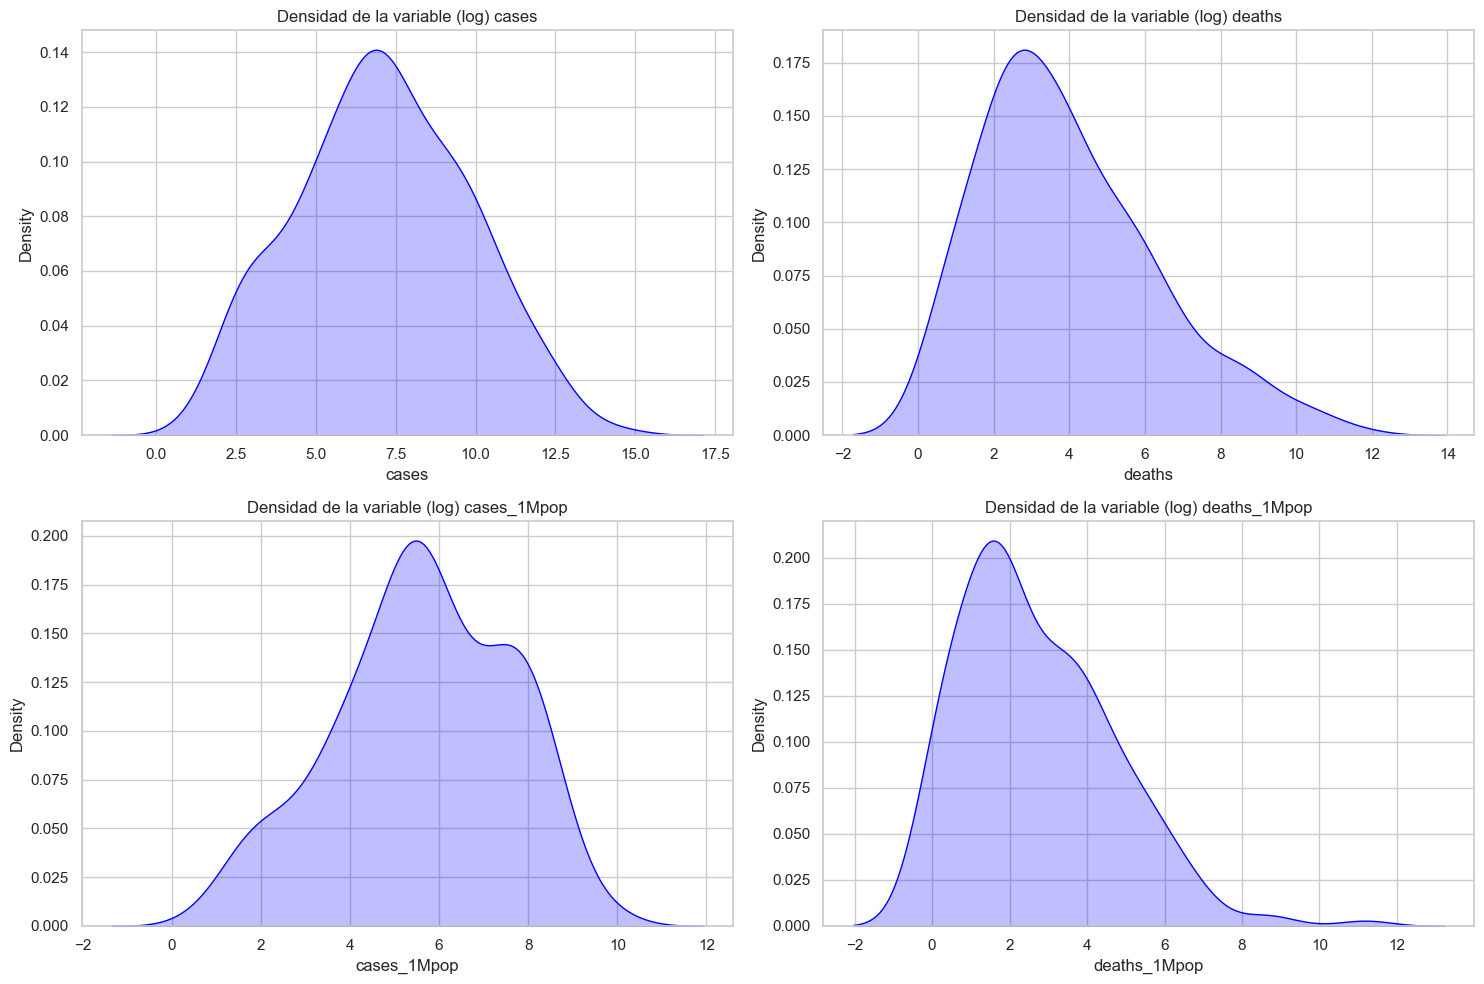

In [86]:
num_rows = 2

num_cols = 2

data_log_transformed = data.copy()

for col in columnas:
    data_log_transformed[col] = np.log1p(data[col])  # np.log1p maneja valores >= 0, usando log(1 + x) para evitar problemas con log(0)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, ax in enumerate(axs.flat):
    if i < len(columnas):
        sns.kdeplot(data=data_log_transformed, x=columnas[i], ax=ax, fill=True, color='blue')  # Solo curva de densidad
        ax.set_title("Densidad de la variable (log) " + columnas[i])


plt.tight_layout()

plt.show()

Las gráficas de densidad obtenidas tras aplicar la transformación logarítmica a las variables **cases**, **deaths**, **cases_1Mpop**, y **deaths_1Mpop** muestran una notable reducción del sesgo presente en los datos originales. Las distribuciones ahora presentan una forma más simétrica, lo que sugiere que la transformación logarítmica ha sido efectiva para mitigar la influencia de los valores extremos. Esta normalización de las distribuciones facilita la aplicación de métodos estadísticos que asumen normalidad, mejorando la validez de los análisis y las conclusiones derivadas. Sin embargo, es importante observar que algunas de las distribuciones, aunque más centradas, aún presentan ligeras asimetrías que podrían requerir consideraciones adicionales dependiendo del contexto del análisis. En conjunto, la transformación aplicada ha logrado un avance significativo hacia la estabilización de la varianza y la mejora de la interpretación de los datos.

Procedemos a calcular el sesgo tanto en las variables originales como en las variables transformadas mediante logaritmo. El cálculo del sesgo en las variables originales nos permite cuantificar la asimetría inicial presente en los datos, revelando la magnitud y dirección del sesgo (positivo o negativo). Posteriormente, al calcular el sesgo en las variables transformadas, podemos evaluar la efectividad de la transformación logarítmica para reducir dicha asimetría. Comparar ambos valores de sesgo nos proporciona una medida clara de cómo la transformación ha influido en la distribución de los datos, permitiéndonos confirmar si se ha logrado una distribución más equilibrada y cercana a la normalidad.

In [88]:
resultados = []

resultados_log = []

for i in columnas:
    
  media = np.mean(data[i])

  mediana = np.median(data[i])
    
  desviacion = np.std(data[i])

  media_log = np.mean(np.log(data[i]+1))
    
  mediana_log = np.median(np.log(data[i]+1))

  desviacion_log = np.std(np.log(data[i]+1))

  resultado = (3*(media-mediana))/desviacion

  resultado_log = (3*(media_log-mediana_log))/desviacion_log

  resultados.append(resultado)

  resultados_log.append(resultado_log)

df_resultados = pd.DataFrame({
    
    'Sesgo sin tranformar': resultados,
    
    'Sesgo de Tranformados (log)': resultados_log
    
}, index = columnas)

In [89]:
df_resultados

,Sesgo sin tranformar,Sesgo de Tranformados (log)
cases,0.578767,0.143694
deaths,0.549072,0.473438
cases_1Mpop,1.210681,0.048137
deaths_1Mpop,0.279275,0.774862


El análisis de sesgo realizado tanto en las variables originales como en las transformadas mediante logaritmo revela resultados significativos en términos de la reducción de la asimetría. Para la variable cases, el sesgo disminuyó de 0.578767 en su estado original a 0.143694 después de la transformación logarítmica, indicando una considerable mejora en la simetría de la distribución. En la variable deaths, aunque la reducción fue menos pronunciada, el sesgo pasó de 0.549072 a 0.473438, sugiriendo una moderada corrección en la asimetría. La variable **cases_1Mpop** experimentó una notable reducción en el sesgo, bajando de 1.210681 a 0.048137, lo que evidencia que la transformación logarítmica fue particularmente efectiva en este caso. Sin embargo, en la variable **deaths_1Mpop**, se observó un incremento en el sesgo de 0.279275 a 0.774862 después de la transformación, lo que indica que, en este caso particular, la aplicación del logaritmo no solo no corrigió la asimetría, sino que la exacerbó.

**e. Volver aplicar binnings por frecuencia, ancho y kmeans sobre la transformación realizada en 3. ¿Cuáles métodos resultaron más y menos sensibles al sesgo?**

In [90]:
data_trans = pd.DataFrame(np.log1p(data[columnas]))

Comparación de Distribuciones de Bins para la columna cases
     Uniform  Quantile  K-means
0.0       28        41       28
1.0       58        41       46
2.0       71        40       66
3.0       37        41       46
4.0       10        41       18


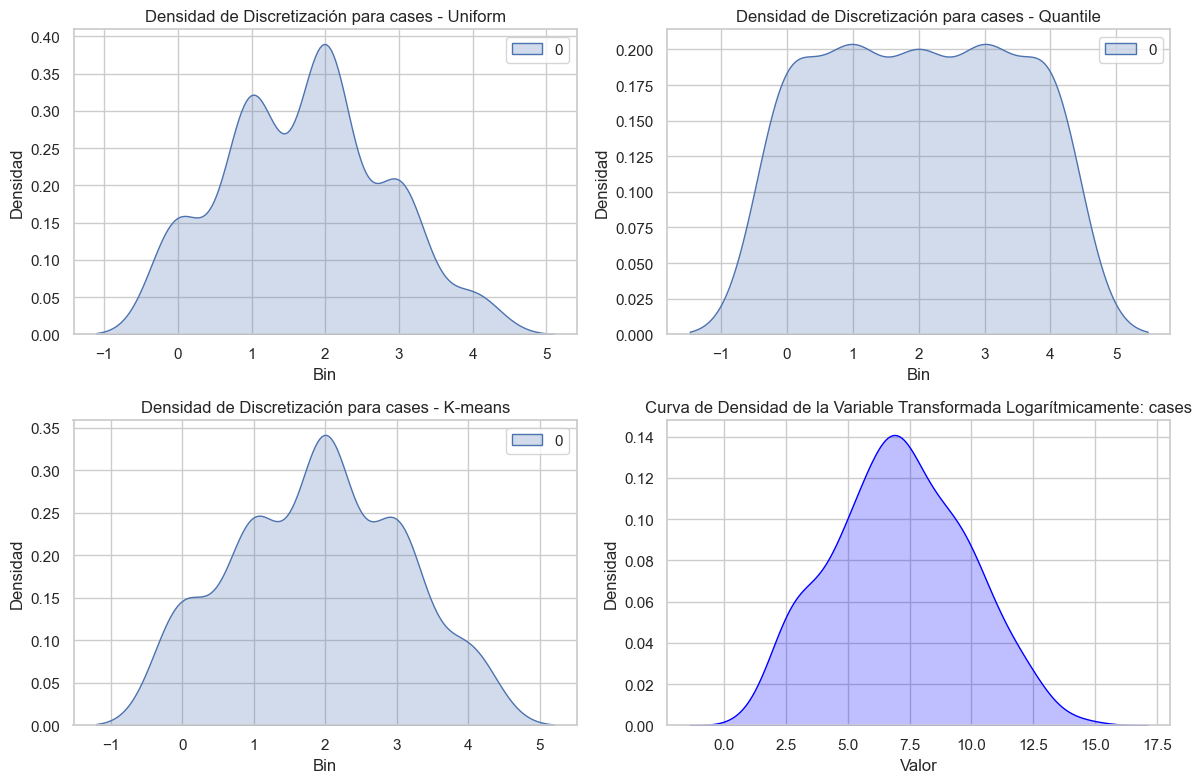

Comparación de Distribuciones de Bins para la columna deaths
     Uniform  Quantile  K-means
0.0       81        39       81
1.0       61        42       59
2.0       41        41       41
3.0       16        41       18
4.0        5        41        5


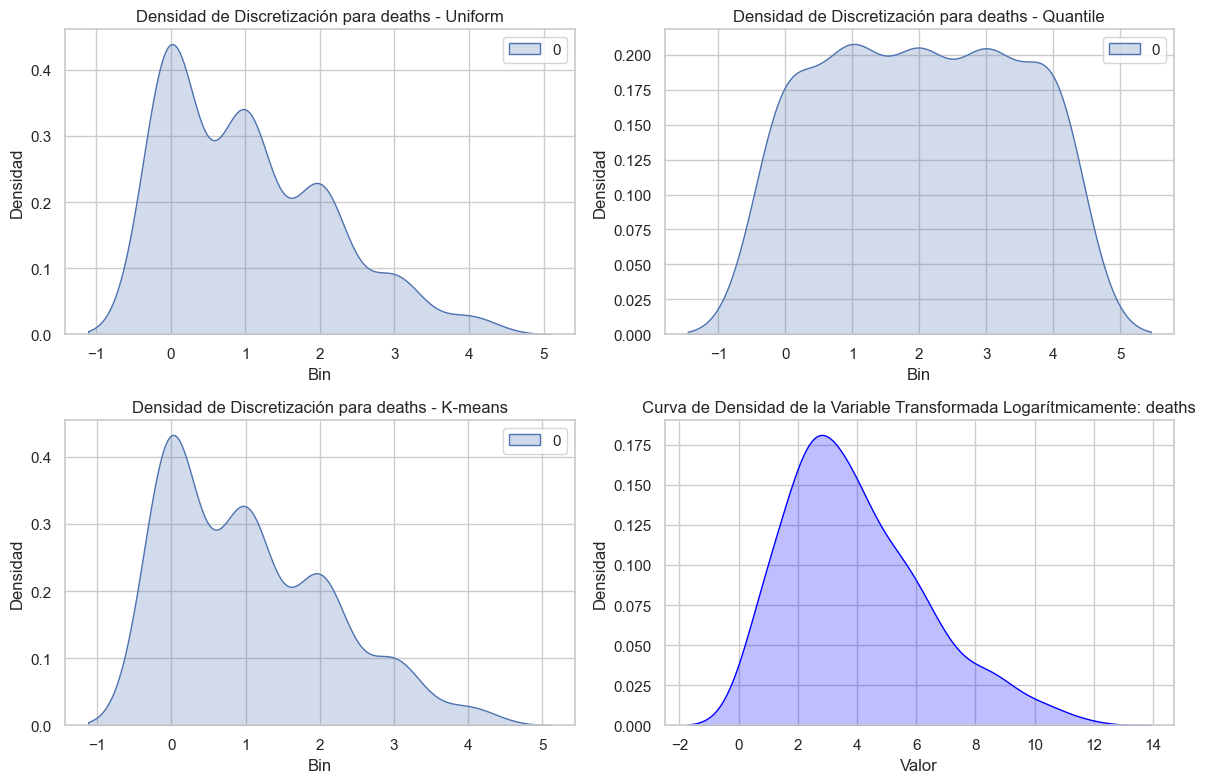

Comparación de Distribuciones de Bins para la columna cases_1Mpop
     Uniform  Quantile  K-means
0.0       18        41       20
1.0       31        41       41
2.0       75        40       61
3.0       56        41       34
4.0       24        41       48


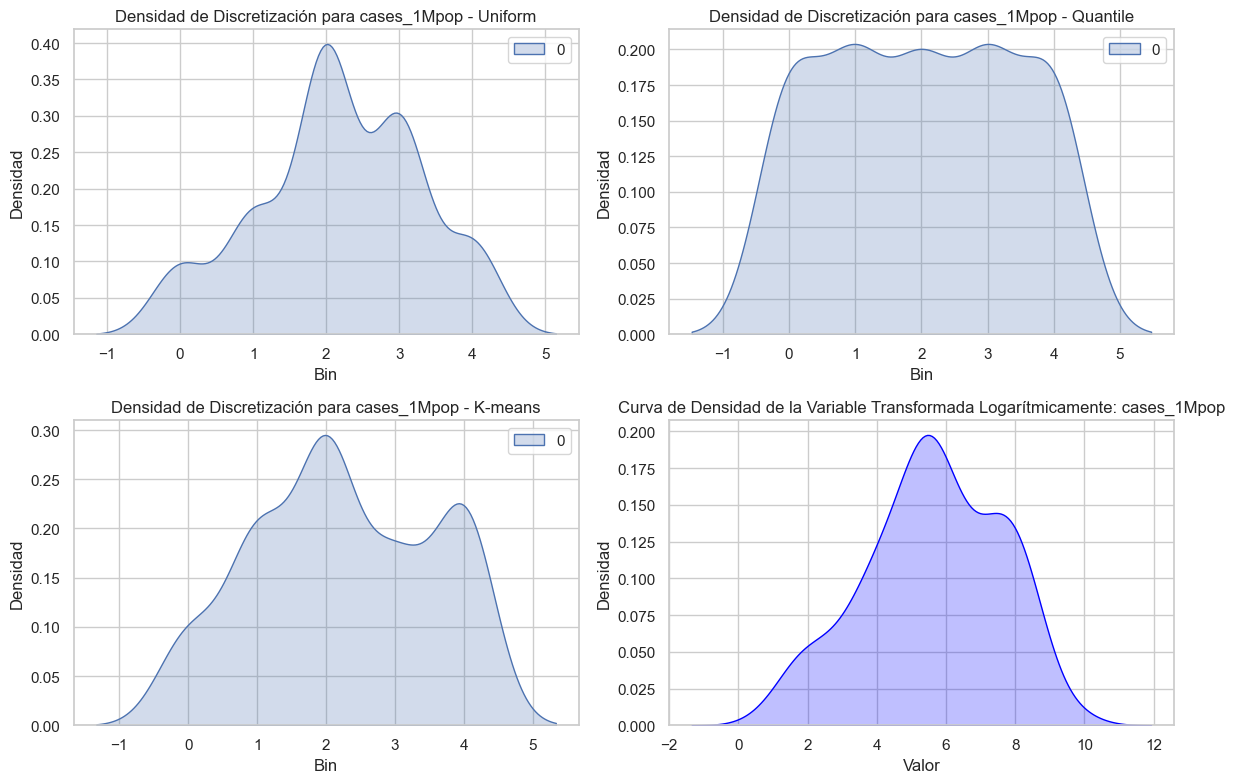

Comparación de Distribuciones de Bins para la columna deaths_1Mpop
     Uniform  Quantile  K-means
0.0      103        39      103
1.0       63        34       57
2.0       33        49       34
3.0        4        40        9
4.0        1        42        1


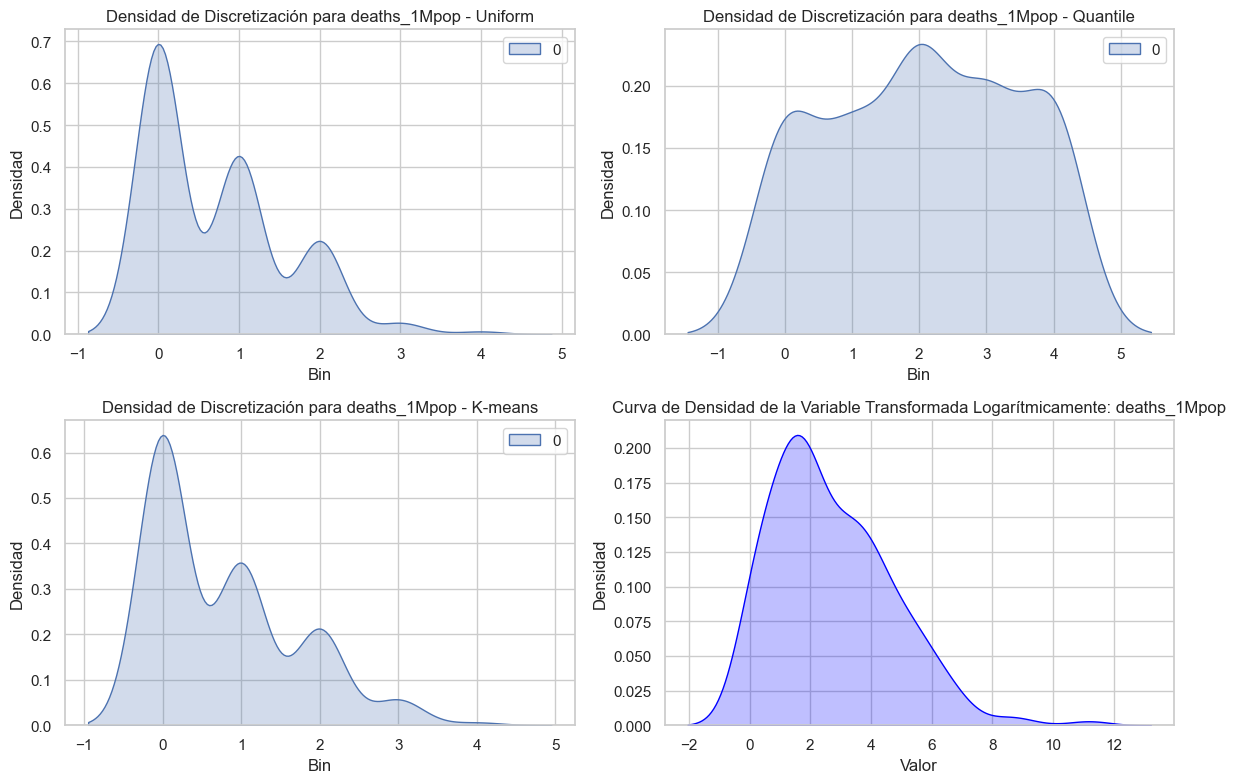

In [91]:
n_bins = 5

for i in columnas:
  
    data_array = data_trans[i].values.reshape(-1, 1)

    
    uniform_discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    
    uniform_bins = uniform_discretizer.fit_transform(data_array)

    # Binning por cuantiles
    quantile_discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
    
    quantile_bins = quantile_discretizer.fit_transform(data_array)

    # Binning por k-means
    
    kmeans_discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='kmeans')
    
    kmeans_bins = kmeans_discretizer.fit_transform(data_array)

   
    
    df = pd.DataFrame({
        
        'uniform_bins': uniform_bins.flatten(),
        
        'quantile_bins': quantile_bins.flatten(),
        
        'kmeans_bins': kmeans_bins.flatten()
    
    })

    # Contar la cantidad de datos en cada bin
    
    uniform_counts = df['uniform_bins'].value_counts().sort_index()
    
    quantile_counts = df['quantile_bins'].value_counts().sort_index()
    
    kmeans_counts = df['kmeans_bins'].value_counts().sort_index()

    # Crear un DataFrame para comparar
    
    comparison_df = pd.DataFrame({
        
        'Uniform': uniform_counts,
       
        'Quantile': quantile_counts,
        
        'K-means': kmeans_counts
    
    })

    print(f"Comparación de Distribuciones de Bins para la columna {i}")
    
    print(comparison_df)

  
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    
    sns.kdeplot(uniform_bins, fill=True, common_norm=False)
    
    plt.title(f'Densidad de Discretización para {i} - Uniform')
    
    plt.xlabel('Bin')
    
    plt.ylabel('Densidad')

    plt.subplot(2, 2, 2)
    
    sns.kdeplot(quantile_bins, fill=True, common_norm=False)
    
    plt.title(f'Densidad de Discretización para {i} - Quantile')
    
    plt.xlabel('Bin')
    
    plt.ylabel('Densidad')

    plt.subplot(2, 2, 3)
    
    sns.kdeplot(kmeans_bins, fill=True, common_norm=False)
    
    plt.title(f'Densidad de Discretización para {i} - K-means')
    
    plt.xlabel('Bin')
    
    plt.ylabel('Densidad')
    
    plt.subplot(2, 2, 4)
    
    sns.kdeplot(data=data_log_transformed, x=i, fill=True, color='blue', label=f'Densidad de {i} (log)')
 
    plt.title(f'Curva de Densidad de la Variable Transformada Logarítmicamente: {i}')
    
    plt.xlabel('Valor')
    
    plt.ylabel('Densidad')

    plt.tight_layout()
    
    plt.show()
    
    

- **Variable 'cases':**

Primero partamos de que los datos transformados tienen un ligero sesgo a derecha, teniendo esto en cuenta el metodo que fue mas influenciado por el sesgo fue el **uniform**, despues de este estaria el K-means y el menos influenciado seria el **Quantile** el cual se ve totalmente uniforme.

- **Variable 'deaths':**

Al igual que el caso anterior tiene un sesgo a derecha, en este caso el metodo **uniform** y el metodo **k-means** dan resultados muy similares, sin envargo si vemos y = 3, podemos ver como **K-means** tiene una densidad ligeramente mas alta en comparacion con el otro metodo, lo que nos puede indicar que hay mas datos hacia la izquierda en el **K-means**, y para terminar, el metodo **Quantile** muestra una distribucion bastante uniforme de los datos.

- **Variable 'cases_1Mpop':**

Para este caso los datos tranformados tienen un sesgo a izquierda (visualmente, porque si tomamos en cuenta la medida de sesgo calculada anteriormente tiene un ligero sesgo a derecha), en esta variable el metodo menos influenciado por el sesgo (al igual que en las ocasiones anteriores) es **Quantile**, por otro lado el mas influenciado es el **Uniform** y el que queda en un punto medio seria **K-means**

- **Variable 'deaths_1Mpop':**

El claro ganador de la menor influencia del sesgo, es el metodo **Quantile**, el mas influenciado seria el metodo **Uniform** y el segundo menos influenciado seria **K-means**

**f. Qué transformaciones considera más adecuadas para comparar la dispersión entre las variables de cantidad de casos, y cantidad de casos cada 1 millón de
habitantes (cases_1Mpop).**

Para abordar este aspecto, partimos de la transformación logarítmica que ya se ha realizado previamente. Además, incorporaremos dos nuevas transformaciones: la raíz cuadrada y la inversa de la raíz cuadrada. Estas transformaciones adicionales contribuirán a estabilizar la varianza y a reducir la influencia de valores extremos, facilitando una comparación más equitativa de la dispersión entre la **cantidad de casos** y la "cantidad de casos por millón de habitantes" **cases_1Mpop**. De este modo, podremos observar las diferencias en las distribuciones de las variables y determinar cuál de las transformaciones resulta más adecuada para el análisis.

In [167]:
# Verificar que los índices existen en la lista 'columnas'

indices = [2, 3, 6, 7]

columnas_seleccionadas = [columnas[i] for i in indices if i < len(columnas)]

# Copia del DataFrame original para aplicar la transformación de raíz cuadrada

raiz = covid_db.copy()

# Aplicar la transformación de raíz cuadrada a las columnas especificadas

for col in columnas_seleccionadas:
    
    raiz[col] = np.sqrt(raiz[col])

# Copia del DataFrame original para aplicar la transformación inversa de la raíz cuadrada

iraiz = covid_db.copy()

# Aplicar la transformación inversa de la raíz cuadrada a las columnas especificadas
for col in columnas_seleccionadas:
    
    iraiz[col] = 1 / np.sqrt(iraiz[col] + 1)  # Añadimos 1 para evitar división por cero

# Copia de la base de datos con la transformación logarítmica ya aplicada

log1 = data_log_transformed.copy()

# - 'raiz' como la base con la transformación de raíz cuadrada aplicada.

# - 'iraiz' como la base con la transformación inversa de la raíz cuadrada aplicada.

# - 'log1' como la base con la transformación logarítmica aplicada.


**Coeficiente de variación**

El coeficiente de variación es una medida que indica la dispersión relativa de un conjunto de datos, expresada como la relación entre la desviación estándar y la media. Es útil para comparar la variabilidad de dos o más conjuntos de datos que tienen diferentes unidades o escalas. En este caso, el CV nos sirve para evaluar y comparar la estabilidad o dispersión de las variables **cantidad de casos** y **cantidad de casos por millón de habitantes** antes y después de aplicar diferentes transformaciones, ayudándonos a identificar cuál transformación logra una variabilidad más controlada y comparable entre las variables.

In [171]:
def coeficiente_variacion(serie):
    
    return serie.std() / serie.mean()

variables = ['cases', 'cases_1Mpop']

# Calcular el CV para las variables sin transformar

cv_original = {var: coeficiente_variacion(covid_db[var]) for var in variables}

# Calcular el CV para las variables transformadas en la base 'raiz'

cv_raiz = {var: coeficiente_variacion(raiz[var]) for var in variables}

# Calcular el CV para las variables transformadas en la base 'iraiz'

cv_iraiz = {var: coeficiente_variacion(iraiz[var]) for var in variables}

# Calcular el CV para las variables transformadas en la base 'log1'

cv_log1 = {var: coeficiente_variacion(log1[var]) for var in variables}

# Mostrar los resultados

print("Coeficiente de Variación - Original (Sin transformar):")

print(cv_original)

print("\nCoeficiente de Variación - Raíz Cuadrada:")

print(cv_raiz)

print("\nCoeficiente de Variación - Inversa de Raíz Cuadrada:")

print(cv_iraiz)

print("\nCoeficiente de Variación - Logarítmica:")

print(cv_log1)

Coeficiente de Variación - Original (Sin transformar):
{'cases': 4.981654445273543, 'cases_1Mpop': 1.927627168944165}

Coeficiente de Variación - Raíz Cuadrada:
{'cases': 4.981654445273543, 'cases_1Mpop': 0.9230177551020107}

Coeficiente de Variación - Inversa de Raíz Cuadrada:
{'cases': 4.981654445273543, 'cases_1Mpop': 1.1679534803984464}

Coeficiente de Variación - Logarítmica:
{'cases': 0.37717429803217883, 'cases_1Mpop': 0.3501953096387684}


**Sin transformar**:

- La cantidad de casos tiene un coeficiente de variación (CV) de 4.98, lo que indica una alta variabilidad en relación con su media.
La cantidad de casos por millón de habitantes **cases_1Mpop** tiene un CV de 1.93, mostrando también una dispersión considerable, aunque menor que la de "cantidad de casos".

**Transformación de raíz cuadrada:**

- El CV para la cantidad de casos se mantiene en 4.98, lo que significa que la transformación no cambió su variabilidad relativa.
Para **cases_1Mpop**, el CV se reduce a 0.92, lo que indica que la transformación de raíz cuadrada logra reducir significativamente la dispersión en esta variable.

**Transformación inversa de la raíz cuadrada**:

- El CV de la cantidad de casos sigue sin cambios en 4.98.
Para **cases_1Mpop**, el CV es 1.17, mostrando una reducción en la dispersión, aunque no tan efectiva como la raíz cuadrada.

**Transformación logarítmica**:

- El CV de la cantidad de casos baja drásticamente a 0.38, lo que sugiere una variabilidad mucho más controlada.
Para **cases_1Mpop**, el CV también baja a 0.35, indicando que la transformación logarítmica es muy eficaz en estabilizar la dispersión de esta variable.

**¿Cuál es mejor?**


La transformación logarítmica es particularmente adecuada para comparar la dispersión entre las variables **cantidad de casos** y **cantidad de casos por millón de habitantes**. Al aplicar esta transformación, se logra una reducción significativa en la dispersión relativa de ambas variables, lo que permite que sus valores sean más consistentes y comparables. Esto es especialmente importante cuando el objetivo es estabilizar la variabilidad y facilitar una comparación justa entre las dos variables. Por lo tanto, la transformación logarítmica se presenta como la opción más efectiva para alcanzar estos fines.

<center> <font color='black'> <b>Bibliografía</b> </font> </center>   

Quinlan,R. (1993). Auto MPG. UCI Machine Learning Repository. https://doi.org/10.24432/C5859H.

Worldometer. (2020). COVID-19 dataset. https://www.worldometers.info/coronavirus/ (Archived: January 2020 - February 2020).